In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import matplotlib
import warnings
warnings.filterwarnings(action="ignore")

### Setting base directory

In [ ]:
!gdown --id 1gyL8hrKcCqUIosC4dgkiuirFnev5ZWF8

In [ ]:
!unzip archive.zip

In [ ]:
!mkdir data
!mv Test* data/
!mv Train* data/

In [2]:
base_dir=os.path.abspath(os.path.curdir)
base_dir

'E:\\Applied_AI_course_Enrolled\\Self Case Studies\\Healthcare Fraud Detection'

### Loading datasets

In [3]:
#Loading datasets
inp_df=pd.read_csv("data/Train_Inpatientdata-1542865627584.csv")
out_df=pd.read_csv("data/Train_Outpatientdata-1542865627584.csv")
ben_df=pd.read_csv("data/Train_Beneficiarydata-1542865627584.csv")
target=pd.read_csv("data/Train-1542865627584.csv")


In [4]:
#converting object to datetime datatype to date columns
inp_df["ClaimStartDt"]=pd.to_datetime(inp_df["ClaimStartDt"])
inp_df["ClaimEndDt"]=pd.to_datetime(inp_df["ClaimEndDt"])
inp_df["AdmissionDt"]=pd.to_datetime(inp_df["AdmissionDt"])
inp_df["DischargeDt"]=pd.to_datetime(inp_df["DischargeDt"])
out_df["ClaimStartDt"]=pd.to_datetime(out_df["ClaimStartDt"])
out_df["ClaimEndDt"]=pd.to_datetime(out_df["ClaimEndDt"])



### shape and top 5 head data

In [5]:
# Load Inpatient data
print("*"*20,"Inpatient data","*"*20)
print("Shape of dataset::", inp_df.shape)
print("*"*56)

inp_df.head()

******************** Inpatient data ********************
Shape of dataset:: (40474, 30)
********************************************************


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [6]:
#Load outpatient dataset
print("*"*20,"Outpatient data","*"*20)
print("Shape of dataset::", out_df.shape)
print("*"*57)
out_df.head()

******************** Outpatient data ********************
Shape of dataset:: (517737, 27)
*********************************************************


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [7]:
#Loading Benificiary dataset
print("*"*20,"Beneficiary data","*"*20)
print("Shape of dataset::", ben_df.shape)
print("*"*58)
ben_df.head()

******************** Beneficiary data ********************
Shape of dataset:: (138556, 25)
**********************************************************


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [8]:
#Loading Target dataset
print("*"*20,"Target dataset","*"*20)
print("Shape of dataset::", target.shape)
print("*"*58)
target.head()

******************** Target dataset ********************
Shape of dataset:: (5410, 2)
**********************************************************


,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


**Observation**
* Shape of Inpatient dataset:: (40474, 30)
* Shape of Outpatient dataset:: (517737, 27)
* Shape of Beneficiary dataset:: (138556, 25)
* Shape of Target dataset:: (5410, 2)
* After seeing first 5 datapoints of each dataset,I found that there are many column which contain missing value. we will check missing value in EDA part.

# Explotary Data Analysis

## 1. Missing values in datasets

In [9]:
print("*"*60)
print("Number of columns which contains missing values in Inpatient data :: ",inp_df.isnull().any().sum())
print("Number of columns which contains missing values in Outpatient data:: ",out_df.isnull().any().sum())
print("Number of columns which contains missing values in Benficiary data:: ",ben_df.isnull().any().sum())
print("Number of columns which contains missing values in Target dataset :: ",target.isnull().any().sum())

print("*"*70)

************************************************************
Number of columns which contains missing values in Inpatient data ::  19
Number of columns which contains missing values in Outpatient data::  20
Number of columns which contains missing values in Benficiary data::  1
Number of columns which contains missing values in Target dataset ::  0
**********************************************************************


In [10]:
### function to check missing data in dataFrame
def get_missing_data(df):
    column=df.columns[df.isnull().any()]
    n=len(df)
    print("data length::",n)
    print("*"*25)
    df=df[column]
    return round(df.isnull().sum().sort_values(ascending=False)*100/n,2)

### 1.1. percentage of missing values in Inpatient dataset columns

In [11]:
#checking missing data in Inpatient data
print("*"*30)
print(get_missing_data(inp_df))
print("*"*30)

******************************
data length:: 40474
*************************
ClmProcedureCode_6     100.00
ClmProcedureCode_5      99.98
ClmProcedureCode_4      99.71
ClmProcedureCode_3      97.62
ClmDiagnosisCode_10     90.30
OtherPhysician          88.41
ClmProcedureCode_2      86.52
ClmProcedureCode_1      42.81
OperatingPhysician      41.12
ClmDiagnosisCode_9      33.35
ClmDiagnosisCode_8      24.56
ClmDiagnosisCode_7      17.93
ClmDiagnosisCode_6      11.95
ClmDiagnosisCode_5       7.15
ClmDiagnosisCode_4       3.79
DeductibleAmtPaid        2.22
ClmDiagnosisCode_3       1.67
ClmDiagnosisCode_2       0.56
AttendingPhysician       0.28
dtype: float64
******************************



**Observation**
* There are 19 columns of Inpatient dataset which are containing missing  where 7 of them are containg more that 86% missing points
* ClmProcedureCode_6 column has 100% missing values


### 1.2. percentage of missing values in Outpatient dataset columns

In [12]:
#checking missing data in Outpatient data
print("*"*30)
print(get_missing_data(out_df))
print("*"*30)

******************************
data length:: 517737
*************************
ClmProcedureCode_5       100.00
ClmProcedureCode_6       100.00
ClmProcedureCode_4       100.00
ClmProcedureCode_3       100.00
ClmProcedureCode_2        99.99
ClmProcedureCode_1        99.97
ClmDiagnosisCode_10       99.79
ClmDiagnosisCode_9        97.13
ClmDiagnosisCode_8        95.57
ClmDiagnosisCode_7        93.63
ClmDiagnosisCode_6        90.58
ClmDiagnosisCode_5        85.64
OperatingPhysician        82.50
ClmAdmitDiagnosisCode     79.64
ClmDiagnosisCode_4        75.74
OtherPhysician            62.33
ClmDiagnosisCode_3        60.74
ClmDiagnosisCode_2        37.74
ClmDiagnosisCode_1         2.02
AttendingPhysician         0.27
dtype: float64
******************************


**Observation**
* There are 20 columns of Inpatient dataset which are containing missing  where 14 of them are containg more that 80% missing points
* ClmProcedureCode_5,ClmProcedureCode_6,ClmProcedureCode_4 and ClmProcedureCode_3 columns have 100% missing values


### 1.3. percentage of missing values in Beneficiary dataset columns

In [13]:
#checking missing data in Beneficiary data
print("*"*30)
print(get_missing_data(ben_df))
print("*"*30)

******************************
data length:: 138556
*************************
DOD    98.97
dtype: float64
******************************


### Observation:
* There are a lot of missing data
* DOD column has around 99% missing data points 

## 2. Distribution of Target variable

In [14]:
# distribution of target variable
target["PotentialFraud"].value_counts(normalize=True)

No     0.90647
Yes    0.09353
Name: PotentialFraud, dtype: float64

******************** Distribution of Target Variable ********************


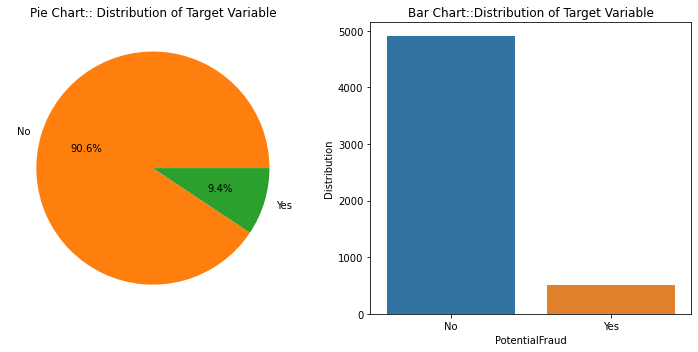

In [15]:
# plot to see how many providers are actually fradulent
data=target["PotentialFraud"].value_counts()
print("*"*20,"Distribution of Target Variable","*"*20)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
#define Seaborn color palette to use
colors = sns.color_palette('tab10')[1:5]
plt.pie(data,autopct="%.1f%%", labels=data.index.values,colors=colors)
plt.title("Pie Chart:: Distribution of Target Variable")
plt.subplot(1,2,2)
sns.countplot(x=target["PotentialFraud"])
plt.ylabel("Distribution")
plt.title("Bar Chart::Distribution of Target Variable")
plt.tight_layout()
plt.show()

### Observation:
* It is imabalanced dataset where majority class contains 90.6% of data and minority class contains only 9.4% of data.
* So before training, Over sampling or undersampling will be required

## 3. Date Analysis 

### 3.1 Date Analysis of Inpatient data

In [16]:
date_data=inp_df[["ClaimStartDt","ClaimEndDt","AdmissionDt","DischargeDt"]]
date_data.head()

,ClaimStartDt,ClaimEndDt,AdmissionDt,DischargeDt
0,2009-04-12,2009-04-18,2009-04-12,2009-04-18
1,2009-08-31,2009-09-02,2009-08-31,2009-09-02
2,2009-09-17,2009-09-20,2009-09-17,2009-09-20
3,2009-02-14,2009-02-22,2009-02-14,2009-02-22
4,2009-08-13,2009-08-30,2009-08-13,2009-08-30


In [17]:
def get_month(dt):
    return dt.strftime("%b")

In [18]:
date_data=date_data.astype("datetime64[ns]")
date_data["diff_day"]=date_data.ClaimEndDt-date_data.ClaimStartDt
date_data["diff_week"]=date_data["diff_day"]/np.timedelta64(1,'W')
date_data["diff_day"]=date_data["diff_day"]/np.timedelta64(1,'D')
date_data['admission_month']=date_data["AdmissionDt"].apply(get_month)
date_data['discharge_month']=date_data["DischargeDt"].apply(get_month)
date_data["admitted_days"]=date_data.DischargeDt-date_data.AdmissionDt
date_data["admitted_days"]=date_data["admitted_days"]/np.timedelta64(1,'D')

date_data.head()

,ClaimStartDt,ClaimEndDt,AdmissionDt,DischargeDt,diff_day,diff_week,admission_month,discharge_month,admitted_days
0,2009-04-12,2009-04-18,2009-04-12,2009-04-18,6.0,0.857143,Apr,Apr,6.0
1,2009-08-31,2009-09-02,2009-08-31,2009-09-02,2.0,0.285714,Aug,Sep,2.0
2,2009-09-17,2009-09-20,2009-09-17,2009-09-20,3.0,0.428571,Sep,Sep,3.0
3,2009-02-14,2009-02-22,2009-02-14,2009-02-22,8.0,1.142857,Feb,Feb,8.0
4,2009-08-13,2009-08-30,2009-08-13,2009-08-30,17.0,2.428571,Aug,Aug,17.0


In [19]:
date_data.tail()

,ClaimStartDt,ClaimEndDt,AdmissionDt,DischargeDt,diff_day,diff_week,admission_month,discharge_month,admitted_days
40469,2009-09-28,2009-10-02,2009-09-28,2009-10-02,4.0,0.571429,Sep,Oct,4.0
40470,2009-11-03,2009-11-06,2009-11-03,2009-11-06,3.0,0.428571,Nov,Nov,3.0
40471,2009-11-18,2009-11-22,2009-11-18,2009-11-22,4.0,0.571429,Nov,Nov,4.0
40472,2009-12-17,2009-12-18,2009-12-17,2009-12-18,1.0,0.142857,Dec,Dec,1.0
40473,2009-09-28,2009-10-06,2009-09-28,2009-10-06,8.0,1.142857,Sep,Oct,8.0


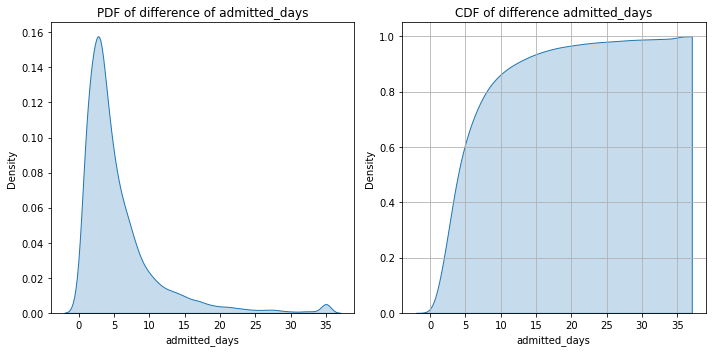

In [23]:
#PDF for difference days in admitted_days
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("PDF of difference of admitted_days")
# sns.histplot(date_data.diff_day,cumulative=False,fill=True)
sns.kdeplot(date_data.admitted_days,cumulative=False,fill=True)
plt.subplot(1,2,2)
plt.title("CDF of difference admitted_days")
sns.kdeplot(date_data.admitted_days,cumulative=True,fill=True)
plt.grid()
plt.tight_layout()
plt.show()

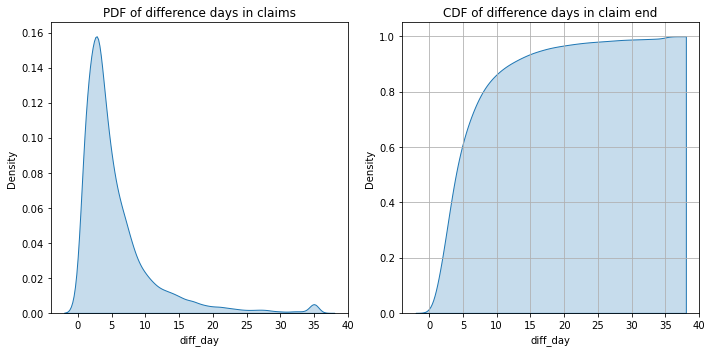

In [22]:
#PDF for difference days in claim dates
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("PDF of difference days in claims")
# sns.histplot(date_data.diff_day,cumulative=False,fill=True)
sns.kdeplot(date_data.diff_day,cumulative=False,fill=True)
plt.subplot(1,2,2)
plt.title("CDF of difference days in claim end")
sns.kdeplot(date_data.diff_day,cumulative=True,fill=True)
plt.tight_layout()
plt.grid()
plt.show()

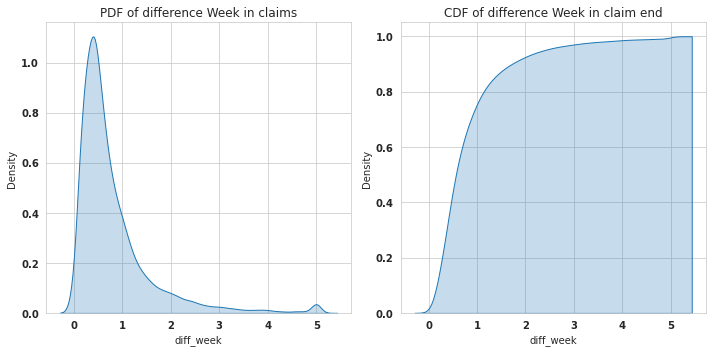

In [188]:
#PDF for difference WEEK in claim dates
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("PDF of difference Week in claims")
# sns.histplot(date_data.diff_day,cumulative=False,fill=True)
sns.kdeplot(date_data.diff_week,cumulative=False,fill=True)
plt.subplot(1,2,2)
# CDF for difference WEEK in claim dates
plt.title("CDF of difference Week in claim end")
sns.kdeplot(date_data.diff_week,cumulative=True,fill=True)
plt.tight_layout()
plt.show()

In [189]:
# Percentine Intution
for i in range(10,101,10):
    print("{}th percentile :: {}".format(i,round(np.percentile(date_data.diff_day.values,i))))

10th percentile :: 1
20th percentile :: 2
30th percentile :: 3
40th percentile :: 3
50th percentile :: 4
60th percentile :: 5
70th percentile :: 6
80th percentile :: 8
90th percentile :: 12
100th percentile :: 36


In [190]:
# Percentine Intution
for i in range(90,101,1):
    print("{}th percentile :: {}".format(i,round(np.percentile(date_data.diff_day.values,i))))

90th percentile :: 12
91th percentile :: 13
92th percentile :: 14
93th percentile :: 14
94th percentile :: 15
95th percentile :: 17
96th percentile :: 18
97th percentile :: 21
98th percentile :: 25
99th percentile :: 32
100th percentile :: 36


In [191]:
# Percentine Intution
for i in range(1,11):
    print("{}th percentile :: {}".format(99+i*0.1,round(np.percentile(date_data.diff_day.values,99+i*0.1))))

99.1th percentile :: 33
99.2th percentile :: 35
99.3th percentile :: 35
99.4th percentile :: 35
99.5th percentile :: 35
99.6th percentile :: 35
99.7th percentile :: 35
99.8th percentile :: 35
99.9th percentile :: 35
100.0th percentile :: 36


******************** Admission Month ********************


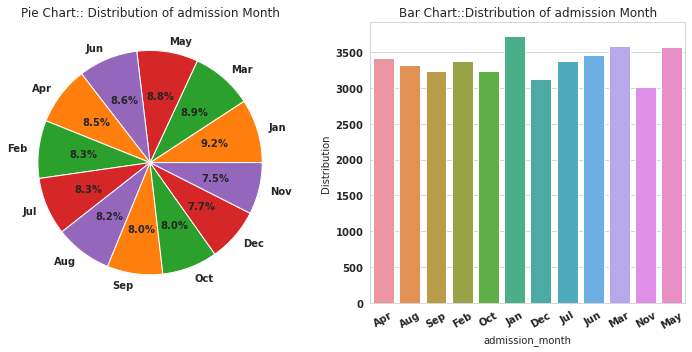

In [198]:
data=date_data["admission_month"].value_counts()
print("*"*20,"Admission Month","*"*20)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
#define Seaborn color palette to use
colors = sns.color_palette('tab10')[1:5]
plt.pie(data,autopct="%.1f%%", labels=data.index.values,colors=colors)
plt.title("Pie Chart:: Distribution of admission Month")
plt.subplot(1,2,2)
sns.countplot(x=date_data["admission_month"])
plt.xticks(rotation=30)
plt.ylabel("Distribution")
plt.title("Bar Chart::Distribution of admission Month")
plt.tight_layout()
plt.show()

**Observation**
* claim start date and admission date are same and both have exact same distribution in inpatient dataset.
* In month of January, No of claims are higher than other months.
* around 90% of claims have 12 days differences between claimStartDt and ClaimEndDt. and admitted_date is telling that 90% of patients were admitted for 12 days.
* 1% of claims have 32-36 days differences between claimStartDt and ClaimEndDt.

### 3.2 Date Analysis of outpatient data

In [161]:
date_data=out_df[["ClaimStartDt","ClaimEndDt"]]
date_data.head()

,ClaimStartDt,ClaimEndDt
0,2009-10-11,2009-10-11
1,2009-02-12,2009-02-12
2,2009-06-27,2009-06-27
3,2009-01-06,2009-01-06
4,2009-01-22,2009-01-22


In [25]:
# date_data=date_data.astype("datetime64[ns]")
date_data["diff_day"]=date_data.ClaimEndDt-date_data.ClaimStartDt
date_data["diff_week"]=date_data["diff_day"]/np.timedelta64(1,'W')
date_data["diff_day"]=date_data["diff_day"]/np.timedelta64(1,'D')
date_data['claim_month']=date_data["ClaimEndDt"].apply(get_month)
date_data.head()

,ClaimStartDt,ClaimEndDt,AdmissionDt,DischargeDt,diff_day,diff_week,admission_month,discharge_month,admitted_days,claim_month
0,2009-04-12,2009-04-18,2009-04-12,2009-04-18,6.0,0.857143,Apr,Apr,6.0,Apr
1,2009-08-31,2009-09-02,2009-08-31,2009-09-02,2.0,0.285714,Aug,Sep,2.0,Sep
2,2009-09-17,2009-09-20,2009-09-17,2009-09-20,3.0,0.428571,Sep,Sep,3.0,Sep
3,2009-02-14,2009-02-22,2009-02-14,2009-02-22,8.0,1.142857,Feb,Feb,8.0,Feb
4,2009-08-13,2009-08-30,2009-08-13,2009-08-30,17.0,2.428571,Aug,Aug,17.0,Aug


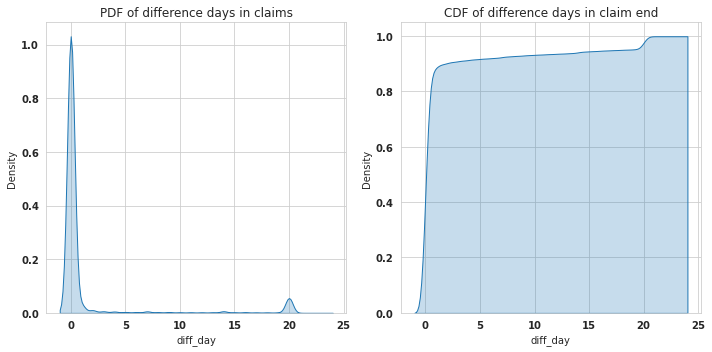

In [163]:
#PDF for difference days in claim dates
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("PDF of difference days in claims")
# sns.histplot(date_data.diff_day,cumulative=False,fill=True)
sns.kdeplot(date_data.diff_day,cumulative=False,fill=True)
plt.subplot(1,2,2)
plt.title("CDF of difference days in claim end")
sns.kdeplot(date_data.diff_day,cumulative=True,fill=True)
plt.tight_layout()
plt.show()

In [164]:
# Percentine Intution
for i in range(10,101,10):
    print("{}th percentile :: {}".format(i,round(np.percentile(date_data.diff_day.values,i))))

10th percentile :: 0
20th percentile :: 0
30th percentile :: 0
40th percentile :: 0
50th percentile :: 0
60th percentile :: 0
70th percentile :: 0
80th percentile :: 0
90th percentile :: 2
100th percentile :: 23


In [165]:
# Percentine Intution
for i in range(90,101,1):
    print("{}th percentile :: {}".format(i,round(np.percentile(date_data.diff_day.values,i))))

90th percentile :: 2
91th percentile :: 3
92th percentile :: 6
93th percentile :: 9
94th percentile :: 14
95th percentile :: 17
96th percentile :: 20
97th percentile :: 20
98th percentile :: 20
99th percentile :: 20
100th percentile :: 23


In [166]:
# Percentine Intution
for i in range(1,11):
    print("{}th percentile :: {}".format(99+i*0.1,round(np.percentile(date_data.diff_day.values,99+i*0.1))))

99.1th percentile :: 20
99.2th percentile :: 20
99.3th percentile :: 20
99.4th percentile :: 20
99.5th percentile :: 20
99.6th percentile :: 20
99.7th percentile :: 20
99.8th percentile :: 20
99.9th percentile :: 20
100.0th percentile :: 23


******************** claim_month  ********************


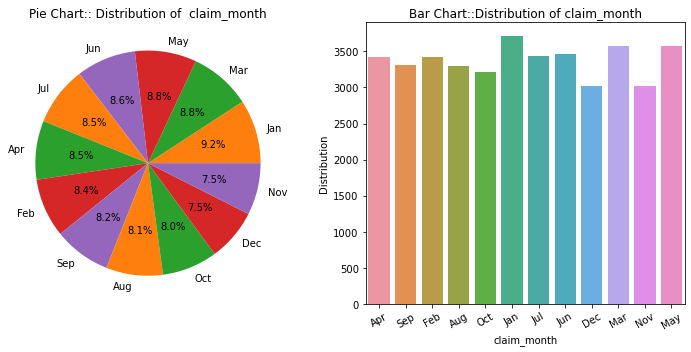

In [26]:
data=date_data["claim_month"].value_counts()
print("*"*20,"claim_month ","*"*20)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
#define Seaborn color palette to use
colors = sns.color_palette('tab10')[1:5]
plt.pie(data,autopct="%.1f%%", labels=data.index.values,colors=colors)
plt.title("Pie Chart:: Distribution of  claim_month")
plt.subplot(1,2,2)
sns.countplot(x=date_data["claim_month"])
plt.xticks(rotation=30)
plt.ylabel("Distribution")
plt.title("Bar Chart::Distribution of claim_month")
plt.tight_layout()
plt.show()

**Observation**
* In outpatient data, 90% of caims have 0 claims day. that means they have visited doc and same day they discharge.
* only 10% of claims are showing that patients have claimed for more than 2 day.
* most of claims is filed in the month of January. it seems because financial year ends in march.

## 4. Numerical variable analysis

### 4.1 Inpetaint InscClaimAmtReimbursed analysis

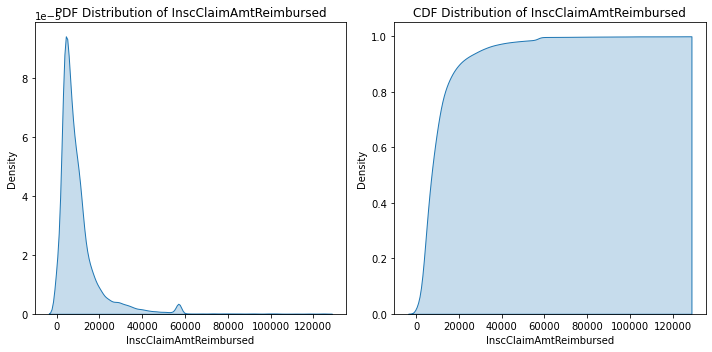

In [28]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("PDF Distribution of InscClaimAmtReimbursed")
sns.kdeplot(inp_df.InscClaimAmtReimbursed,cumulative=False,fill=True)
plt.subplot(1,2,2)
plt.title("CDF Distribution of InscClaimAmtReimbursed")
sns.kdeplot(inp_df.InscClaimAmtReimbursed,cumulative=True,fill=True)
plt.tight_layout()
plt.show()

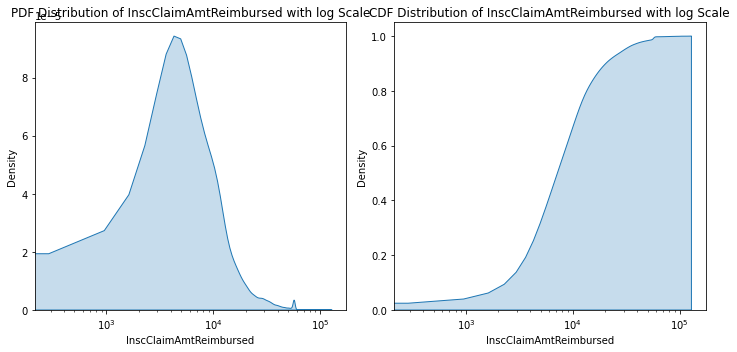

In [29]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("PDF Distribution of InscClaimAmtReimbursed with log Scale")
sns.kdeplot(inp_df.InscClaimAmtReimbursed,cumulative=False,fill=True)
plt.xscale("log")
plt.subplot(1,2,2)
plt.title("CDF Distribution of InscClaimAmtReimbursed with log Scale")
sns.kdeplot(inp_df.InscClaimAmtReimbursed,cumulative=True,fill=True)
plt.xscale("log")
plt.tight_layout()
plt.show()

In [292]:
# Percentine Intution
for i in range(10,101,10):
    print("{}th percentile :: {}".format(i,round(np.percentile(inp_df.InscClaimAmtReimbursed.values,i))))

10th percentile :: 3000
20th percentile :: 4000
30th percentile :: 5000
40th percentile :: 6000
50th percentile :: 7000
60th percentile :: 9000
70th percentile :: 11000
80th percentile :: 13000
90th percentile :: 20000
100th percentile :: 125000


In [293]:
# Percentine Intution
for i in range(90,101,1):
    print("{}th percentile :: {}".format(i,round(np.percentile(inp_df.InscClaimAmtReimbursed,i))))

90th percentile :: 20000
91th percentile :: 21000
92th percentile :: 23000
93th percentile :: 25000
94th percentile :: 28000
95th percentile :: 30000
96th percentile :: 33000
97th percentile :: 38000
98th percentile :: 45540
99th percentile :: 57000
100th percentile :: 125000


In [294]:
# Percentine Intution
for i in range(1,11):
    print("{}th percentile :: {}".format(99+i*0.1,round(np.percentile(inp_df.InscClaimAmtReimbursed.values,99+i*0.1))))

99.1th percentile :: 57000
99.2th percentile :: 57000
99.3th percentile :: 57000
99.4th percentile :: 57000
99.5th percentile :: 57000
99.6th percentile :: 57000
99.7th percentile :: 57000
99.8th percentile :: 72054
99.9th percentile :: 90000
100.0th percentile :: 125000


**Observation**
* 99.9 % reimbursement are less than 90K where 0.01% reimbursement are 1.25 lakh.
* around 70% of claim reimbursement are less that 11K.

### 4.2 Outpetaint InscClaimAmtReimbursed analysis

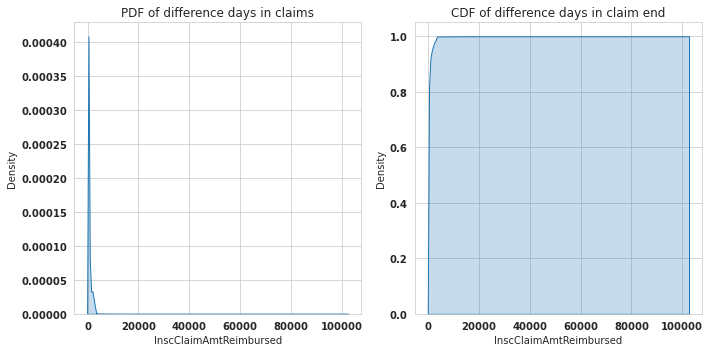

In [206]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("PDF of difference days in claims")
# sns.histplot(date_data.diff_day,cumulative=False,fill=True)
sns.kdeplot(out_df.InscClaimAmtReimbursed,cumulative=False,fill=True)
# plt.xscale("log")
plt.subplot(1,2,2)
plt.title("CDF of difference days in claim end")
sns.kdeplot(out_df.InscClaimAmtReimbursed,cumulative=True,fill=True)
# plt.xscale("log")
plt.tight_layout()
plt.show()

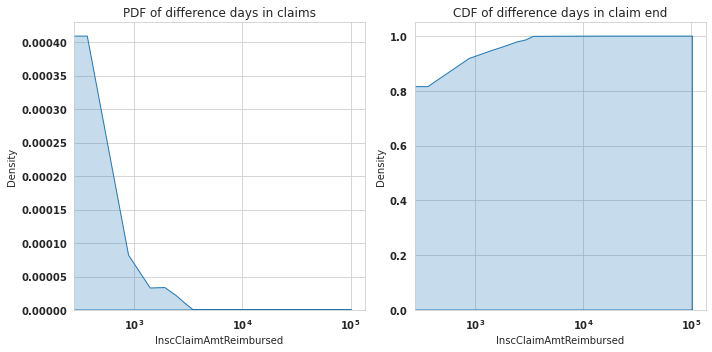

In [295]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("PDF of difference days in claims")
# sns.histplot(date_data.diff_day,cumulative=False,fill=True)
sns.kdeplot(out_df.InscClaimAmtReimbursed,cumulative=False,fill=True)
plt.xscale("log")
plt.subplot(1,2,2)
plt.title("CDF of difference days in claim end")
sns.kdeplot(out_df.InscClaimAmtReimbursed,cumulative=True,fill=True)
plt.xscale("log")
plt.tight_layout()
plt.show()

In [207]:
# Percentine Intution
for i in range(10,101,10):
    print("{}th percentile :: {}".format(i,round(np.percentile(out_df.InscClaimAmtReimbursed.values,i))))

10th percentile :: 10
20th percentile :: 30
30th percentile :: 40
40th percentile :: 60
50th percentile :: 80
60th percentile :: 100
70th percentile :: 200
80th percentile :: 300
90th percentile :: 700
100th percentile :: 102500


In [208]:
# Percentine Intution
for i in range(90,101,1):
    print("{}th percentile :: {}".format(i,round(np.percentile(out_df.InscClaimAmtReimbursed,i))))

90th percentile :: 700
91th percentile :: 800
92th percentile :: 900
93th percentile :: 1000
94th percentile :: 1200
95th percentile :: 1500
96th percentile :: 1800
97th percentile :: 2100
98th percentile :: 2500
99th percentile :: 3300
100th percentile :: 102500


In [209]:
# Percentine Intution
for i in range(1,11):
    print("{}th percentile :: {}".format(99+i*0.1,round(np.percentile(out_df.InscClaimAmtReimbursed.values,99+i*0.1))))

99.1th percentile :: 3300
99.2th percentile :: 3300
99.3th percentile :: 3300
99.4th percentile :: 3300
99.5th percentile :: 3300
99.6th percentile :: 3300
99.7th percentile :: 3300
99.8th percentile :: 3300
99.9th percentile :: 3500
100.0th percentile :: 102500


**Observation**
* 99.9 % reimbursement are less than 3500 only where 0.01% reimbursement are 1.025 lakh which is look like outlier.
* around 93% of claim reimbursement are less that 1K.

### 4.3 Inpetaint DeductibleAmtPaid analysis

In [306]:
print("value count of DeductibleAmtPaid")
inp_df.DeductibleAmtPaid.value_counts()

value count of DeductibleAmtPaid


1068.0    39575
Name: DeductibleAmtPaid, dtype: int64

In [315]:
print("Number of missing data points in DeductibleAmtPaid column:: ",inp_df["DeductibleAmtPaid"].isnull().sum())

Number of missing data points in DeductibleAmtPaid column::  899


**Observation**
* 1068 unit of amount have to pay by policyholder before insurance company starts paying up while hospitalizing .
* Number of missing data points in DeductibleAmtPaid column::  899
* this column will not be useful for model training

### 4.2 Outpetaint DeductibleAmtPaid analysis

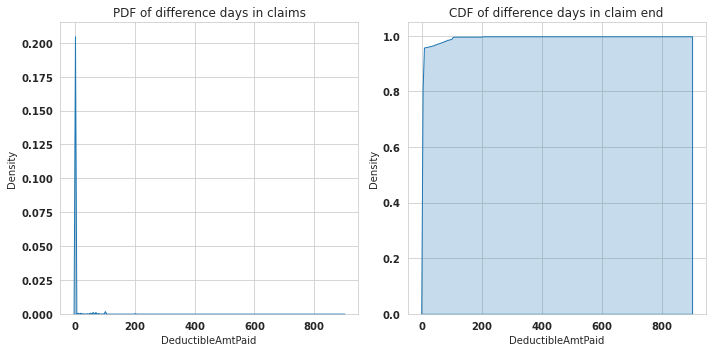

In [308]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("PDF of difference days in claims")
# sns.histplot(date_data.diff_day,cumulative=False,fill=True)
sns.kdeplot(out_df.DeductibleAmtPaid,cumulative=False,fill=True)
# plt.xscale("log")
plt.subplot(1,2,2)
plt.title("CDF of difference days in claim end")
sns.kdeplot(out_df.DeductibleAmtPaid,cumulative=True,fill=True)
# plt.xscale("log")
plt.tight_layout()
plt.show()

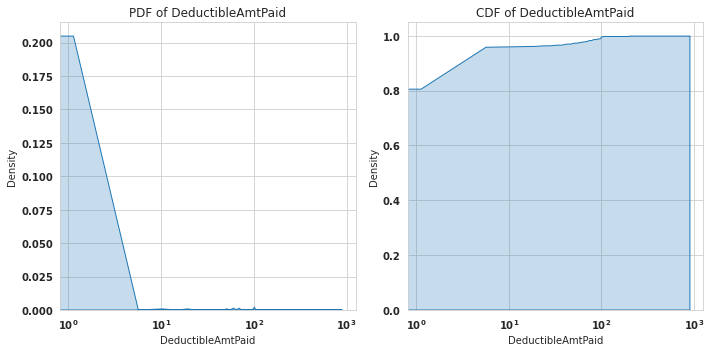

In [309]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("PDF of DeductibleAmtPaid")
# sns.histplot(date_data.diff_day,cumulative=False,fill=True)
sns.kdeplot(out_df.DeductibleAmtPaid,cumulative=False,fill=True)
plt.xscale("log")
plt.subplot(1,2,2)
plt.title("CDF of DeductibleAmtPaid")
sns.kdeplot(out_df.DeductibleAmtPaid,cumulative=True,fill=True)
plt.xscale("log")
plt.tight_layout()
plt.show()

In [310]:
# Percentine Intution
for i in range(10,101,10):
    print("{}th percentile :: {}".format(i,round(np.percentile(out_df.DeductibleAmtPaid.values,i))))

10th percentile :: 0
20th percentile :: 0
30th percentile :: 0
40th percentile :: 0
50th percentile :: 0
60th percentile :: 0
70th percentile :: 0
80th percentile :: 0
90th percentile :: 0
100th percentile :: 897


In [311]:
# Percentine Intution
for i in range(90,101,1):
    print("{}th percentile :: {}".format(i,round(np.percentile(out_df.DeductibleAmtPaid,i))))

90th percentile :: 0
91th percentile :: 0
92th percentile :: 0
93th percentile :: 0
94th percentile :: 0
95th percentile :: 0
96th percentile :: 10
97th percentile :: 40
98th percentile :: 70
99th percentile :: 100
100th percentile :: 897


In [312]:
# Percentine Intution
for i in range(1,11):
    print("{}th percentile :: {}".format(99+i*0.1,round(np.percentile(out_df.DeductibleAmtPaid.values,99+i*0.1))))

99.1th percentile :: 100
99.2th percentile :: 100
99.3th percentile :: 100
99.4th percentile :: 100
99.5th percentile :: 100
99.6th percentile :: 100
99.7th percentile :: 100
99.8th percentile :: 100
99.9th percentile :: 200
100.0th percentile :: 897


In [314]:
print("Number of missing data points in DeductibleAmtPaid column:: ",out_df["DeductibleAmtPaid"].isnull().sum())

Number of missing data points in DeductibleAmtPaid column::  0


**Observation**
* It seems for outpatient data, there is no amount to be paid by policy holder before insurance company starts paying up.
* 95% of claims showing that they haven't paid anything as  Deductible amount.
* only 5% for policy holder paid 10-200 as Deductible amount.
* and 0.01 % has paid 897 as Deductible amount.

## 5. Categorical variable analysis

### 5.1 Inpatient data's provider analysis

In [211]:
print("No of unique provider:: ",len(inp_df.Provider.unique()))

No of unique provider::  2092


In [218]:
provider=inp_df.Provider.value_counts().to_frame().reset_index()
provider.columns=["provider","count"]
provider.head()

,provider,count
0,PRV52019,516
1,PRV55462,386
2,PRV54367,322
3,PRV53706,282
4,PRV55209,275


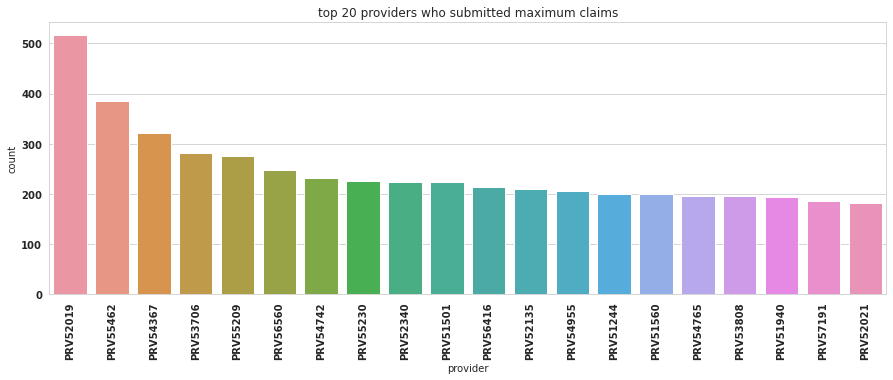

In [228]:
# top 20 providers who submitted maximum claims
plt.figure(figsize=(15,5))
plt.title("top 20 providers who submitted maximum claims")
sns.barplot(x="provider",y="count",data=provider.iloc[:20])
plt.xticks(rotation=90)
plt.show()

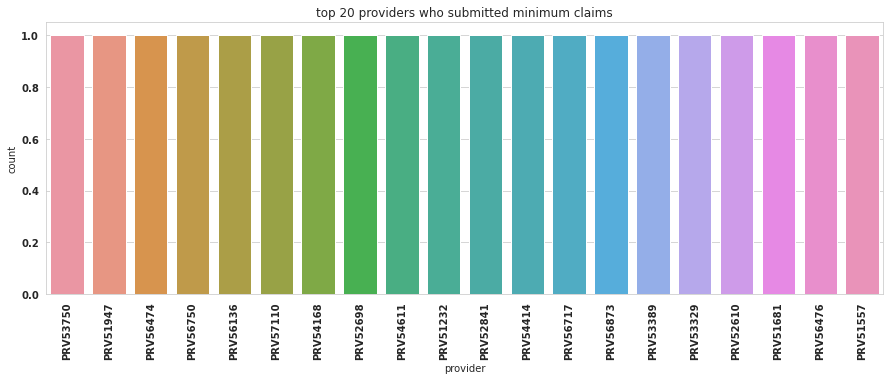

In [229]:
# top 20 providers who submitted minimum claims
plt.figure(figsize=(15,5))
plt.title("top 20 providers who submitted minimum claims")
sns.barplot(x="provider",y="count",data=provider.iloc[-20:])
plt.xticks(rotation=90)
plt.show()

### 5.2 Outpatient data's provider analysis

In [230]:
print("No of unique provider:: ",len(out_df.Provider.unique()))

No of unique provider::  5012


In [232]:
provider=out_df.Provider.value_counts().to_frame().reset_index()
provider.columns=["provider","count"]
provider.head()

,provider,count
0,PRV51459,8240
1,PRV53797,4739
2,PRV51574,4444
3,PRV53918,3588
4,PRV54895,3433


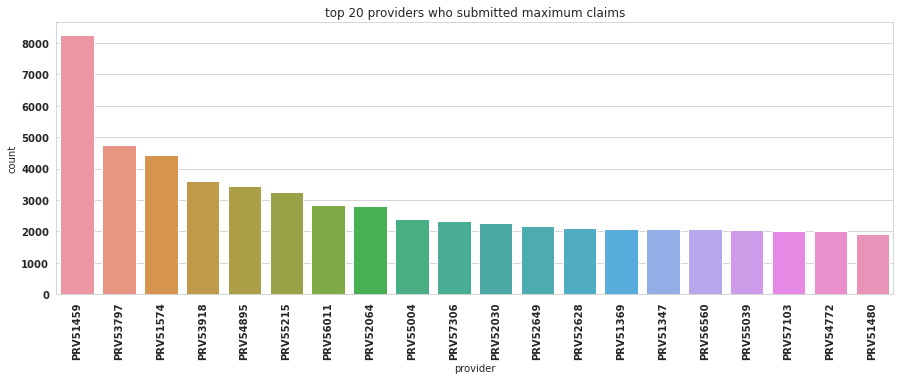

In [233]:
# top 20 providers who submitted maximum claims
plt.figure(figsize=(15,5))
plt.title("top 20 providers who submitted maximum claims")
sns.barplot(x="provider",y="count",data=provider.iloc[:20])
plt.xticks(rotation=90)
plt.show()

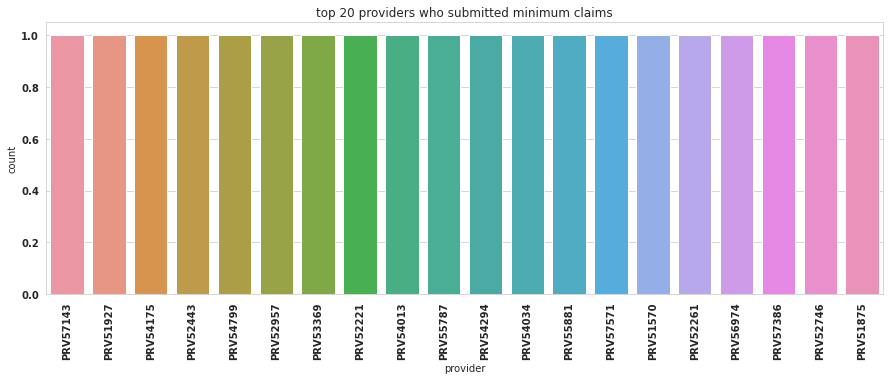

In [234]:
# top 20 providers who submitted minimum claims
plt.figure(figsize=(15,5))
plt.title("top 20 providers who submitted minimum claims")
sns.barplot(x="provider",y="count",data=provider.iloc[-20:])
plt.xticks(rotation=90)
plt.show()

### 5.3 Inpatient data's AttendingPhysician analysis

In [238]:
print("No of unique phydician who atteded patients:: ",len(inp_df.AttendingPhysician.unique()))

No of unique phydician who atteded patients::  11605


In [246]:
AttendingPh=inp_df.AttendingPhysician.value_counts().to_frame().reset_index()
AttendingPh.columns=["AttendingPhysician","count"]
AttendingPh.head()

,AttendingPhysician,count
0,PHY422134,386
1,PHY341560,274
2,PHY315112,208
3,PHY411541,198
4,PHY362864,195


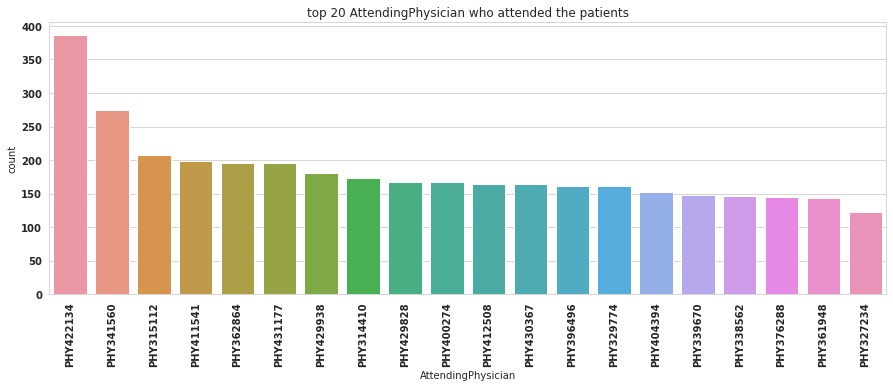

In [247]:
# top 20 AttendingPhysician who submitted maximum claims
plt.figure(figsize=(15,5))
plt.title("top 20 AttendingPhysician who attended the patients")
sns.barplot(x="AttendingPhysician",y="count",data=AttendingPh.iloc[:20])
plt.xticks(rotation=90)
plt.show()

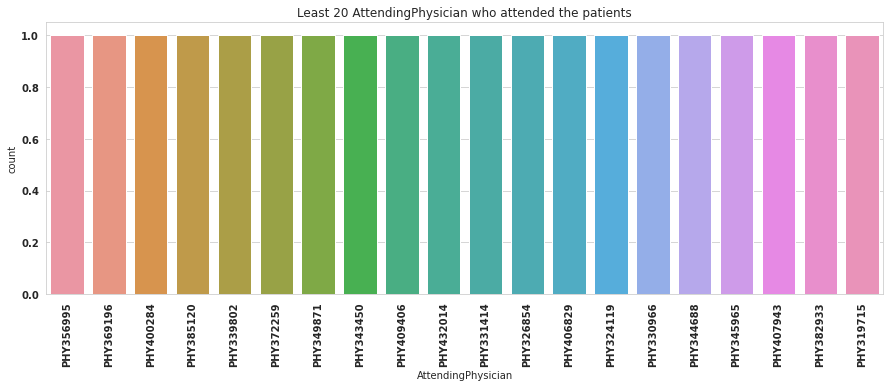

In [248]:
# Least 20 AttendingPhysician who attended mimimum patients
plt.figure(figsize=(15,5))
plt.title("Least 20 AttendingPhysician who attended the patients")
sns.barplot(x="AttendingPhysician",y="count",data=AttendingPh.iloc[-20:])
plt.xticks(rotation=90)
plt.show()

In [254]:
print("Number of missing data points in Attending physician column:: ",inp_df["AttendingPhysician"].isnull().sum())

Number of missing data points in Attending physician column::  112


### 5.4 Outpatient data's AttendingPhysician analysis

In [249]:
print("No of unique physician who atteded patients:: ",len(out_df.AttendingPhysician.unique()))

No of unique physician who atteded patients::  74110


In [250]:
AttendingPh=out_df.AttendingPhysician.value_counts().to_frame().reset_index()
AttendingPh.columns=["AttendingPhysician","count"]
AttendingPh.head()

,AttendingPhysician,count
0,PHY330576,2534
1,PHY350277,1628
2,PHY412132,1321
3,PHY423534,1223
4,PHY314027,1200


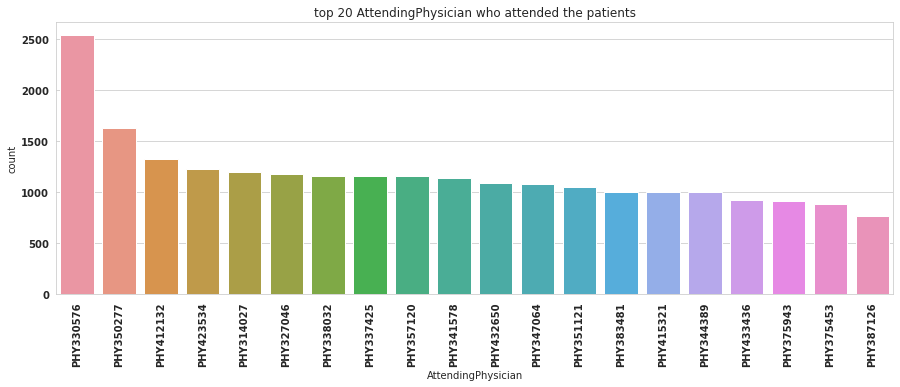

In [251]:
# top 20 AttendingPhysician who submitted maximum claims
plt.figure(figsize=(15,5))
plt.title("top 20 AttendingPhysician who attended the patients")
sns.barplot(x="AttendingPhysician",y="count",data=AttendingPh.iloc[:20])
plt.xticks(rotation=90)
plt.show()

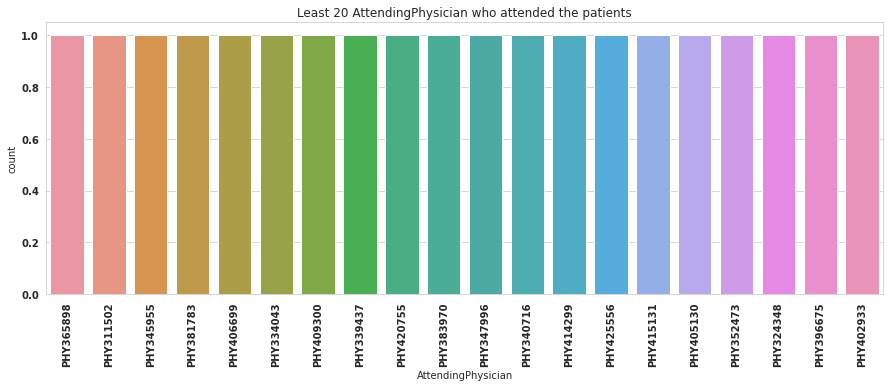

In [252]:
# Least 20 AttendingPhysician who attended mimimum patients
plt.figure(figsize=(15,5))
plt.title("Least 20 AttendingPhysician who attended the patients")
sns.barplot(x="AttendingPhysician",y="count",data=AttendingPh.iloc[-20:])
plt.xticks(rotation=90)
plt.show()

In [255]:
print("Number of missing data points in Attending physician column:: ",out_df["AttendingPhysician"].isnull().sum())

Number of missing data points in Attending physician column::  1396


### 5.5 Inpatient data's OperatingPhysician analysis

In [260]:
print("No of unique OperatingPhysician:: ",len(inp_df.OperatingPhysician.unique()))

No of unique OperatingPhysician::  8288


In [261]:
OperatingPhysician=inp_df.OperatingPhysician.value_counts().to_frame().reset_index()
OperatingPhysician.columns=["OperatingPhysician","count"]
OperatingPhysician.head()

,OperatingPhysician,count
0,PHY429430,225
1,PHY341560,153
2,PHY411541,121
3,PHY352941,110
4,PHY314410,109


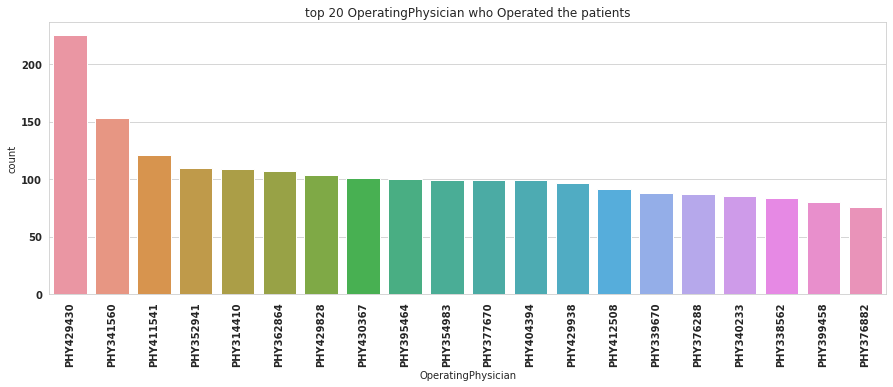

In [262]:
# top 20 OperatingPhysician who submitted maximum claims
plt.figure(figsize=(15,5))
plt.title("top 20 OperatingPhysician who Operated the patients")
sns.barplot(x="OperatingPhysician",y="count",data=OperatingPhysician.iloc[:20])
plt.xticks(rotation=90)
plt.show()

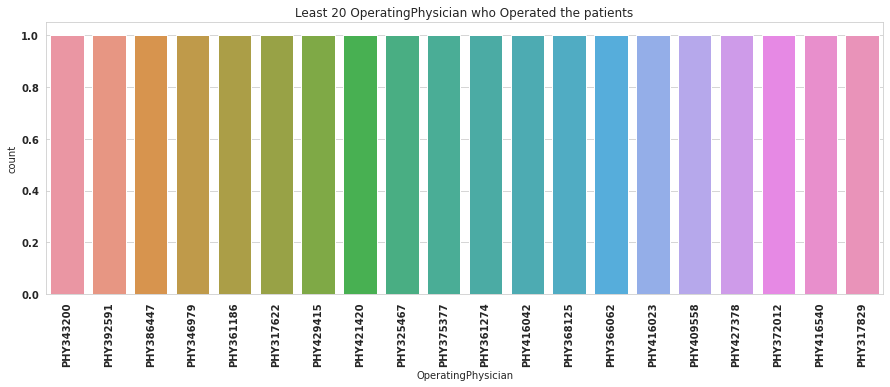

In [263]:
# Least 20 OperatingPhysician who attended mimimum patients
plt.figure(figsize=(15,5))
plt.title("Least 20 OperatingPhysician who Operated the patients")
sns.barplot(x="OperatingPhysician",y="count",data=OperatingPhysician.iloc[-20:])
plt.xticks(rotation=90)
plt.show()

In [271]:
print("Number of missing data points in OperatingPhysician column:: ",inp_df["OperatingPhysician"].isnull().sum())

Number of missing data points in OperatingPhysician column::  16644


### 5.6 Outpatient data's OperatingPhysician analysis

In [265]:
print("No of unique OperatingPhysician:: ",len(out_df.OperatingPhysician.unique()))

No of unique OperatingPhysician::  28533


In [266]:
OperatingPhysician=out_df.OperatingPhysician.value_counts().to_frame().reset_index()
OperatingPhysician.columns=["OperatingPhysician","count"]
OperatingPhysician.head()

,OperatingPhysician,count
0,PHY330576,424
1,PHY424897,293
2,PHY314027,256
3,PHY423534,250
4,PHY357120,249


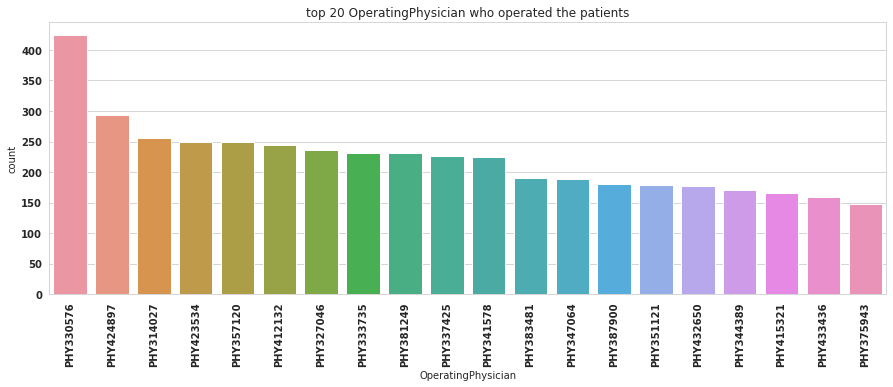

In [268]:
# top 20 OperatingPhysician who submitted maximum claims
plt.figure(figsize=(15,5))
plt.title("top 20 OperatingPhysician who operated the patients")
sns.barplot(x="OperatingPhysician",y="count",data=OperatingPhysician.iloc[:20])
plt.xticks(rotation=90)
plt.show()

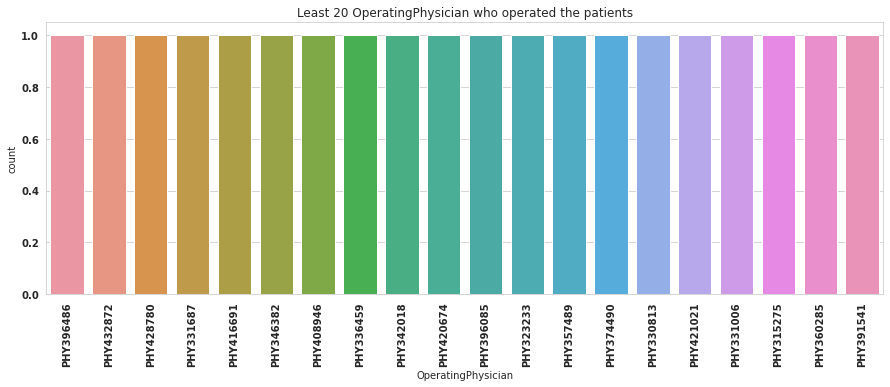

In [269]:
# Least 20 AttendingPhysician who attended mimimum patients
plt.figure(figsize=(15,5))
plt.title("Least 20 OperatingPhysician who operated the patients")
sns.barplot(x="OperatingPhysician",y="count",data=OperatingPhysician.iloc[-20:])
plt.xticks(rotation=90)
plt.show()

In [270]:
print("Number of missing data points in OperatingPhysician column:: ",out_df["OperatingPhysician"].isnull().sum())

Number of missing data points in OperatingPhysician column::  427120


### 5.7 Inpatient data's OtherPhysician analysis

In [273]:
print("No of unique OtherPhysician who was involved in treatment:: ",len(inp_df.OtherPhysician.unique()))

No of unique OtherPhysician who was involved in treatment::  2878


In [274]:
OtherPhysician=inp_df.OtherPhysician.value_counts().to_frame().reset_index()
OtherPhysician.columns=["OtherPhysician","count"]
OtherPhysician.head()

,OtherPhysician,count
0,PHY416093,81
1,PHY333406,38
2,PHY429929,30
3,PHY361563,29
4,PHY423728,29


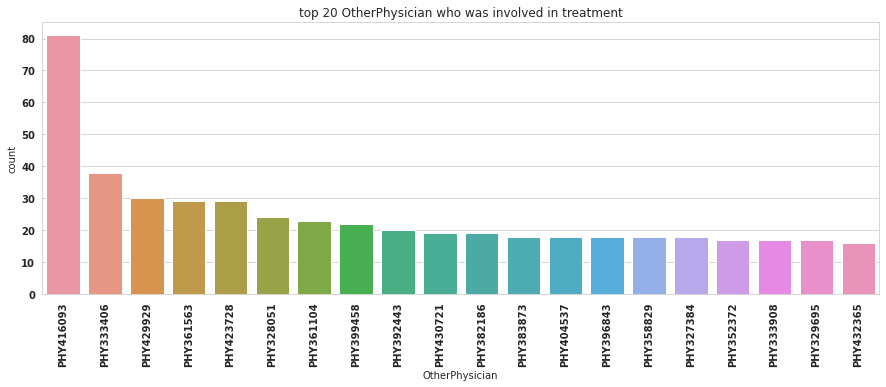

In [275]:
# top 20 OtherPhysician who submitted maximum claims
plt.figure(figsize=(15,5))
plt.title("top 20 OtherPhysician who was involved in treatment")
sns.barplot(x="OtherPhysician",y="count",data=OtherPhysician.iloc[:20])
plt.xticks(rotation=90)
plt.show()

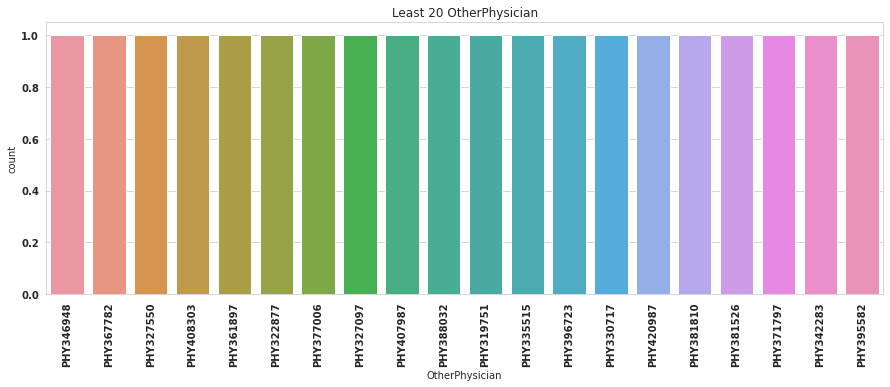

In [276]:
# Least 20 OperatingPhysician
plt.figure(figsize=(15,5))
plt.title("Least 20 OtherPhysician")
sns.barplot(x="OtherPhysician",y="count",data=OtherPhysician.iloc[-20:])
plt.xticks(rotation=90)
plt.show()

In [278]:
print("Number of missing data points in OtherPhysician column:: ",inp_df["OtherPhysician"].isnull().sum())

Number of missing data points in OtherPhysician column::  35784


### 5.8 Outpatient data's OtherPhysician analysis

In [279]:
print("No of unique OtherPhysician:: ",len(out_df.OtherPhysician.unique()))

No of unique OtherPhysician::  44389


In [280]:
OtherPhysician=out_df.OtherPhysician.value_counts().to_frame().reset_index()
OtherPhysician.columns=["OtherPhysician","count"]
OtherPhysician.head()

,OtherPhysician,count
0,PHY412132,1247
1,PHY341578,1098
2,PHY338032,1070
3,PHY337425,1041
4,PHY347064,806


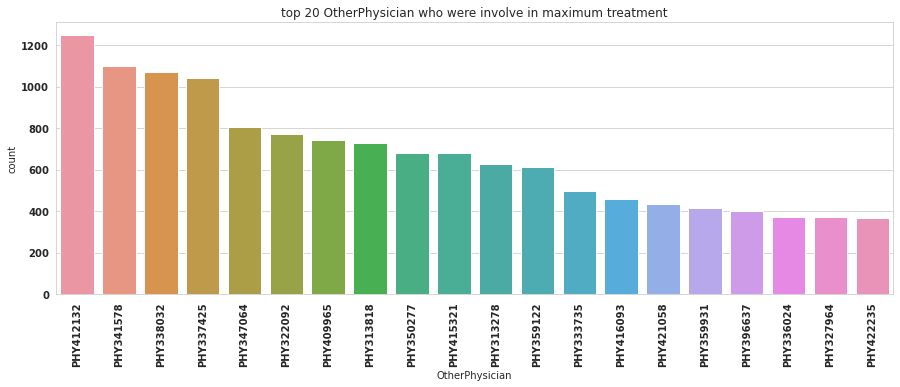

In [281]:
# top 20 OtherPhysician
plt.figure(figsize=(15,5))
plt.title("top 20 OtherPhysician who were involve in maximum treatment")
sns.barplot(x="OtherPhysician",y="count",data=OtherPhysician.iloc[:20])
plt.xticks(rotation=90)
plt.show()

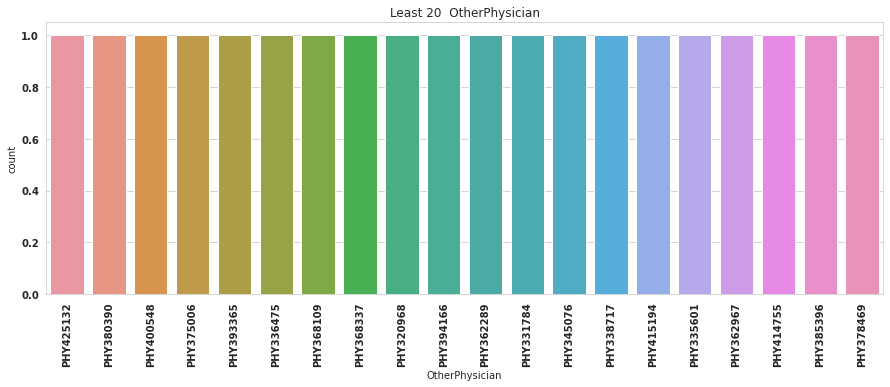

In [282]:
# Least 20 OtherPhysician
plt.figure(figsize=(15,5))
plt.title("Least 20  OtherPhysician")
sns.barplot(x="OtherPhysician",y="count",data=OtherPhysician.iloc[-20:])
plt.xticks(rotation=90)
plt.show()

In [283]:
print("Number of missing data points in OtherPhysician column:: ",out_df["OtherPhysician"].isnull().sum())

Number of missing data points in OtherPhysician column::  322691


### 5.9 Inpatient data's ClmAdmitDiagnosisCode analysis

In [325]:
print("No of unique ClmAdmitDiagnosisCode:: ",len(inp_df.ClmAdmitDiagnosisCode.unique()))

No of unique ClmAdmitDiagnosisCode::  1928


In [326]:
ClmAdmitDiagnosisCode=inp_df.ClmAdmitDiagnosisCode.value_counts().to_frame().reset_index()
ClmAdmitDiagnosisCode.columns=["ClmAdmitDiagnosisCode","count"]
ClmAdmitDiagnosisCode.head()

,ClmAdmitDiagnosisCode,count
0,78650,1731
1,78605,1669
2,486,1438
3,4280,1106
4,7802,1018


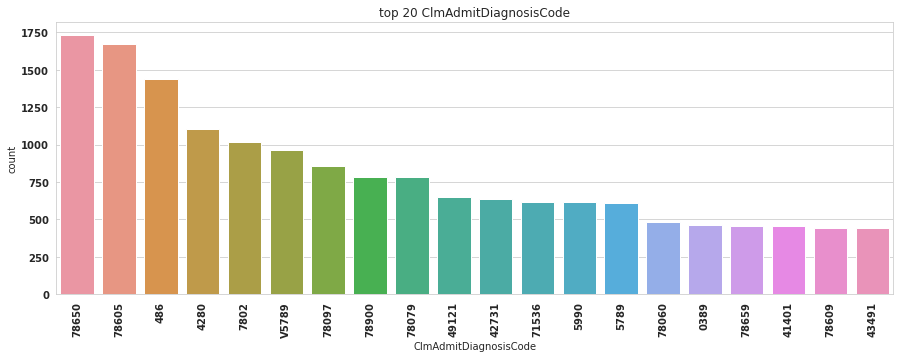

In [327]:
# top 20 ClmAdmitDiagnosisCode
plt.figure(figsize=(15,5))
plt.title("top 20 ClmAdmitDiagnosisCode")
sns.barplot(x="ClmAdmitDiagnosisCode",y="count",data=ClmAdmitDiagnosisCode.iloc[:20])
plt.xticks(rotation=90)
plt.show()

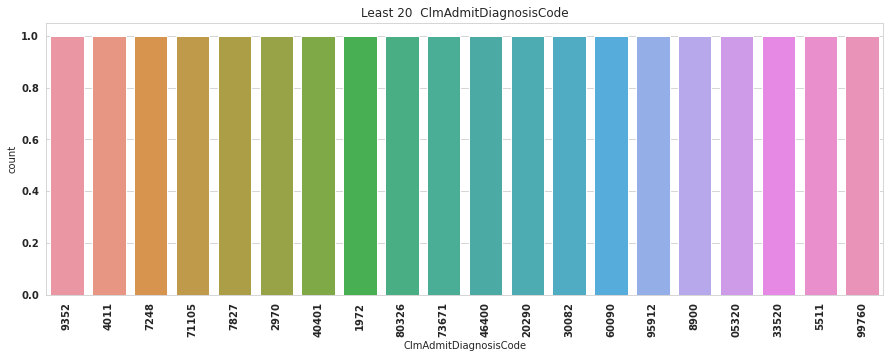

In [328]:
# Least 20 ClmAdmitDiagnosisCode
plt.figure(figsize=(15,5))
plt.title("Least 20  ClmAdmitDiagnosisCode")
sns.barplot(x="ClmAdmitDiagnosisCode",y="count",data=ClmAdmitDiagnosisCode.iloc[-20:])
plt.xticks(rotation=90)
plt.show()

In [331]:
print("Number of missing data points in ClmAdmitDiagnosisCode column:: ",inp_df["ClmAdmitDiagnosisCode"].isnull().sum())
print("Number of missing data points in ClmAdmitDiagnosisCode column in percentage  :: {}%".format(round(inp_df["ClmAdmitDiagnosisCode"].isnull().sum()/len(inp_df)*100,2)))


Number of missing data points in ClmAdmitDiagnosisCode column::  0
Number of missing data points in ClmAdmitDiagnosisCode column in percentage  :: 0.0%


### 5.10 Outpatient data's ClmAdmitDiagnosisCode analysis

In [339]:
print("No of unique OtherPhysician:: ",len(out_df.ClmAdmitDiagnosisCode.unique()))

No of unique OtherPhysician::  3716


In [317]:
ClmAdmitDiagnosisCode=out_df.ClmAdmitDiagnosisCode.value_counts().to_frame().reset_index()
ClmAdmitDiagnosisCode.columns=["ClmAdmitDiagnosisCode","count"]
ClmAdmitDiagnosisCode.head()

,ClmAdmitDiagnosisCode,count
0,V7612,4074
1,42731,3001
2,4019,2627
3,25000,2346
4,V5883,1871


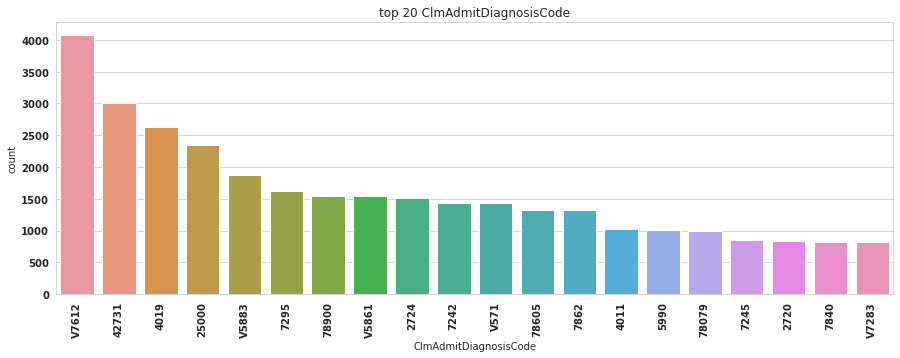

In [318]:
# top 20 ClmAdmitDiagnosisCode
plt.figure(figsize=(15,5))
plt.title("top 20 ClmAdmitDiagnosisCode")
sns.barplot(x="ClmAdmitDiagnosisCode",y="count",data=ClmAdmitDiagnosisCode.iloc[:20])
plt.xticks(rotation=90)
plt.show()

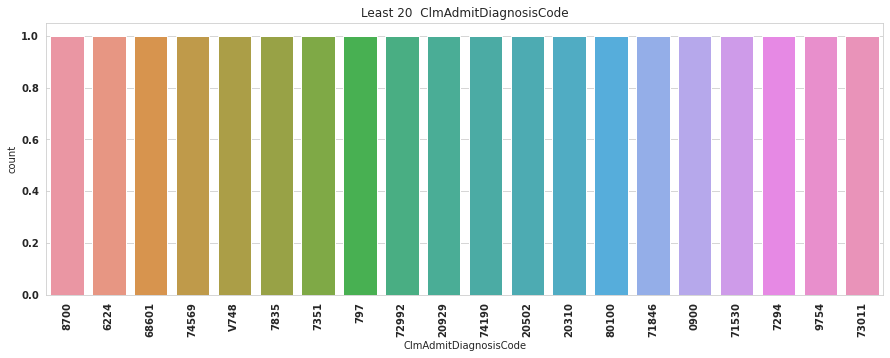

In [319]:
# Least 20 ClmAdmitDiagnosisCode
plt.figure(figsize=(15,5))
plt.title("Least 20  ClmAdmitDiagnosisCode")
sns.barplot(x="ClmAdmitDiagnosisCode",y="count",data=ClmAdmitDiagnosisCode.iloc[-20:])
plt.xticks(rotation=90)
plt.show()

In [337]:
print("Number of missing data points in ClmAdmitDiagnosisCode column:: ",out_df["ClmAdmitDiagnosisCode"].isnull().sum())
print("Number of missing data points in ClmAdmitDiagnosisCode column in percentage  :: {}%".format(round((out_df["ClmAdmitDiagnosisCode"].isnull().sum()*100)/len(out_df),2)))


Number of missing data points in ClmAdmitDiagnosisCode column::  412312
Number of missing data points in ClmAdmitDiagnosisCode column in percentage  :: 79.64%


### 5.11 Inpatient data's DiagnosisGroupCode analysis

In [340]:
print("No of unique DiagnosisGroupCode:: ",len(inp_df.DiagnosisGroupCode.unique()))

No of unique DiagnosisGroupCode::  736


In [345]:
DiagnosisGroupCode=inp_df.DiagnosisGroupCode.value_counts().to_frame().reset_index()
DiagnosisGroupCode.columns=["DiagnosisGroupCode","count"]
DiagnosisGroupCode.head()

,DiagnosisGroupCode,count
0,882,179
1,884,174
2,166,168
3,183,165
4,939,163


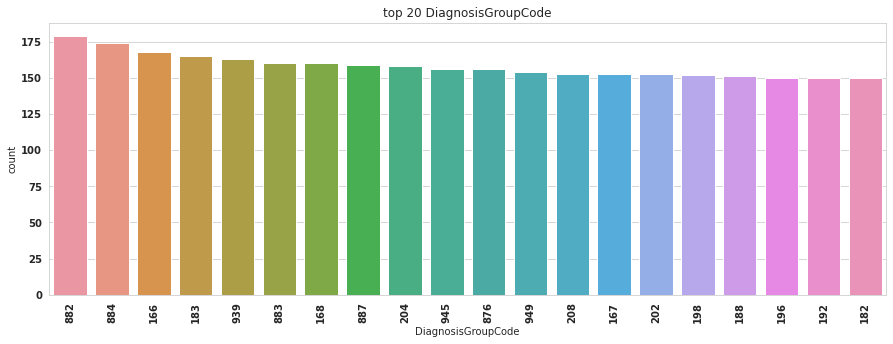

In [346]:
# top 20 DiagnosisGroupCode
plt.figure(figsize=(15,5))
plt.title("top 20 DiagnosisGroupCode")
sns.barplot(x="DiagnosisGroupCode",y="count",data=DiagnosisGroupCode.iloc[:20])
plt.xticks(rotation=90)
plt.show()

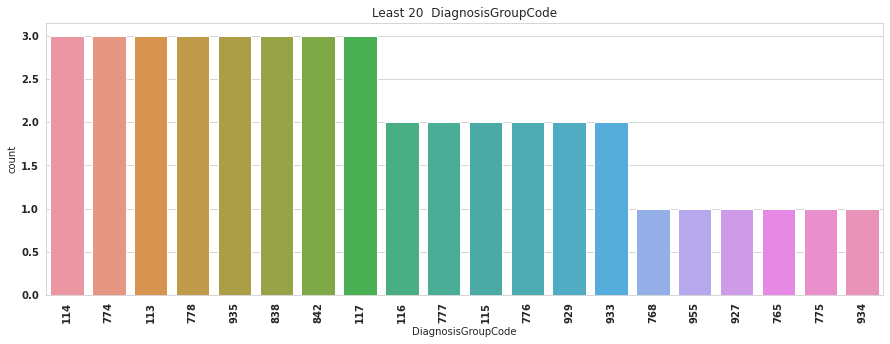

In [347]:
# Least 20 ClmAdmitDiagnosisCode
plt.figure(figsize=(15,5))
plt.title("Least 20  DiagnosisGroupCode")
sns.barplot(x="DiagnosisGroupCode",y="count",data=DiagnosisGroupCode.iloc[-20:])
plt.xticks(rotation=90)
plt.show()

In [331]:
print("Number of missing data points in ClmAdmitDiagnosisCode column:: ",inp_df["ClmAdmitDiagnosisCode"].isnull().sum())
print("Number of missing data points in ClmAdmitDiagnosisCode column in percentage  :: {}%".format(round(inp_df["ClmAdmitDiagnosisCode"].isnull().sum()/len(inp_df)*100,2)))


Number of missing data points in ClmAdmitDiagnosisCode column::  0
Number of missing data points in ClmAdmitDiagnosisCode column in percentage  :: 0.0%


In [285]:
inp_df.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')

### 5.12 Inpatient data's ClmDiagnosisCode analysis

In [349]:
diagnoscode=pd.DataFrame(columns=["ClmDiagnosisCode"])
diagnoscode["ClmDiagnosisCode"]=pd.concat([inp_df['ClmDiagnosisCode_1'],inp_df[ 'ClmDiagnosisCode_2'],
                                      inp_df['ClmDiagnosisCode_3'],inp_df['ClmDiagnosisCode_4'], 
                                      inp_df['ClmDiagnosisCode_5'], inp_df['ClmDiagnosisCode_6'],
                                      inp_df['ClmDiagnosisCode_7'],inp_df[ 'ClmDiagnosisCode_8'], 
                                      inp_df['ClmDiagnosisCode_9'],inp_df['ClmDiagnosisCode_10']], axis=0, sort=True).dropna()

In [355]:
print("No of unique DiagnosisCode:: ",len(diagnoscode.ClmDiagnosisCode.unique()))

No of unique DiagnosisCode::  4716


In [356]:
ClmDiagnosisCode=diagnoscode.ClmDiagnosisCode.value_counts().to_frame().reset_index()
ClmDiagnosisCode.columns=["ClmDiagnosisCode","count"]
ClmDiagnosisCode.head()

,ClmDiagnosisCode,count
0,4019,14153
1,2724,7340
2,25000,7334
3,41401,6442
4,4280,6190


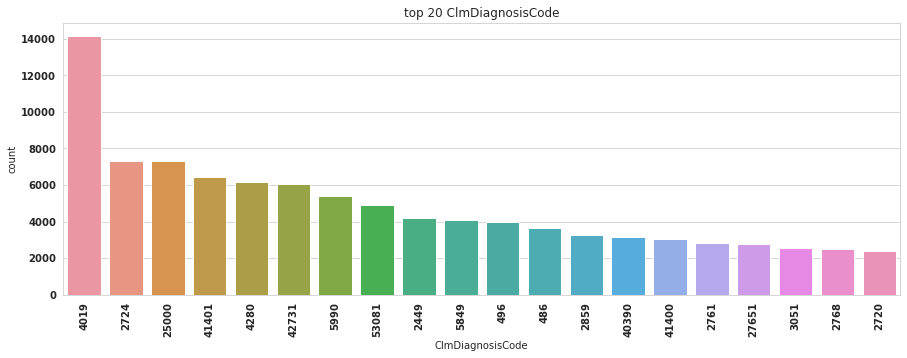

In [357]:
# top 20 ClmDiagnosisCode
plt.figure(figsize=(15,5))
plt.title("top 20 ClmDiagnosisCode")
sns.barplot(x="ClmDiagnosisCode",y="count",data=ClmDiagnosisCode.iloc[:20])
plt.xticks(rotation=90)
plt.show()

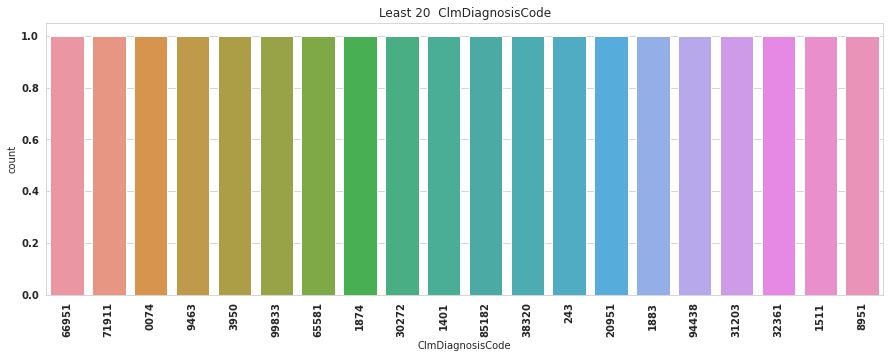

In [358]:
# Least 20 ClmAdmitDiagnosisCode
plt.figure(figsize=(15,5))
plt.title("Least 20  ClmDiagnosisCode")
sns.barplot(x="ClmDiagnosisCode",y="count",data=ClmDiagnosisCode.iloc[-20:])
plt.xticks(rotation=90)
plt.show()

In [359]:
print("Number of missing data points in ClmDiagnosisCode column:: ",diagnoscode["ClmDiagnosisCode"].isnull().sum())
print("Number of missing data points in ClmDiagnosisCode column in percentage  :: {}%".format(round(diagnoscode["ClmDiagnosisCode"].isnull().sum()/len(diagnoscode)*100,2)))


Number of missing data points in ClmDiagnosisCode column::  0
Number of missing data points in ClmDiagnosisCode column in percentage  :: 0.0%


### 5.13 Outpatient data's ClmDiagnosisCode analysis

In [360]:
diagnoscode=pd.DataFrame(columns=["ClmDiagnosisCode"])
diagnoscode["ClmDiagnosisCode"]=pd.concat([out_df['ClmDiagnosisCode_1'],out_df[ 'ClmDiagnosisCode_2'],
                                      out_df['ClmDiagnosisCode_3'],out_df['ClmDiagnosisCode_4'], 
                                      out_df['ClmDiagnosisCode_5'], out_df['ClmDiagnosisCode_6'],
                                      out_df['ClmDiagnosisCode_7'],out_df[ 'ClmDiagnosisCode_8'], 
                                      out_df['ClmDiagnosisCode_9'],out_df['ClmDiagnosisCode_10']], axis=0, sort=True).dropna()

In [361]:
print("No of unique DiagnosisCode:: ",len(diagnoscode.ClmDiagnosisCode.unique()))

No of unique DiagnosisCode::  10846


In [362]:
ClmDiagnosisCode=diagnoscode.ClmDiagnosisCode.value_counts().to_frame().reset_index()
ClmDiagnosisCode.columns=["ClmDiagnosisCode","count"]
ClmDiagnosisCode.head()

,ClmDiagnosisCode,count
0,4019,62903
1,25000,30022
2,2724,28423
3,V5869,24359
4,4011,23534


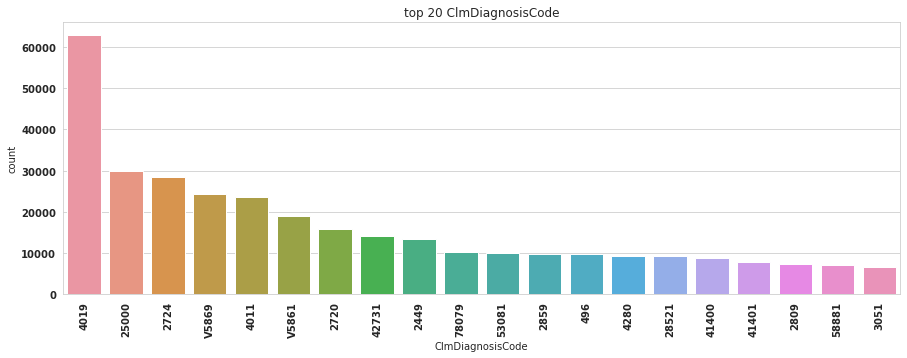

In [363]:
# top 20 ClmDiagnosisCode
plt.figure(figsize=(15,5))
plt.title("top 20 ClmDiagnosisCode")
sns.barplot(x="ClmDiagnosisCode",y="count",data=ClmDiagnosisCode.iloc[:20])
plt.xticks(rotation=90)
plt.show()

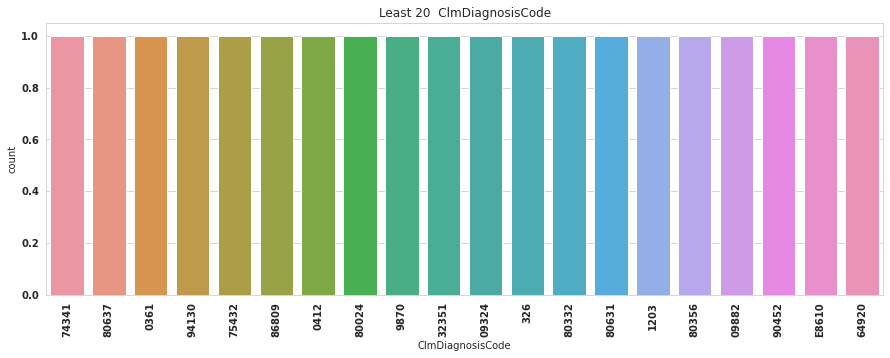

In [364]:
# Least 20 ClmAdmitDiagnosisCode
plt.figure(figsize=(15,5))
plt.title("Least 20  ClmDiagnosisCode")
sns.barplot(x="ClmDiagnosisCode",y="count",data=ClmDiagnosisCode.iloc[-20:])
plt.xticks(rotation=90)
plt.show()

In [365]:
print("Number of missing data points in ClmDiagnosisCode column:: ",diagnoscode["ClmDiagnosisCode"].isnull().sum())
print("Number of missing data points in ClmDiagnosisCode column in percentage  :: {}%".format(round(diagnoscode["ClmDiagnosisCode"].isnull().sum()/len(diagnoscode)*100,2)))


Number of missing data points in ClmDiagnosisCode column::  0
Number of missing data points in ClmDiagnosisCode column in percentage  :: 0.0%


In [366]:

inp_df.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')

### 5.14 Inpatient data's ProcedureCode analysis

In [392]:
Procedure=pd.DataFrame(columns=["ClmProcedureCode"])
Procedure["ClmProcedureCode"]=pd.concat([inp_df['ClmProcedureCode_1'],inp_df[ 'ClmProcedureCode_2'],
                                      inp_df['ClmProcedureCode_3'],inp_df['ClmProcedureCode_4'], 
                                      inp_df['ClmProcedureCode_5'], inp_df['ClmProcedureCode_6']], axis=0, sort=True).dropna()

In [393]:
print("No of unique ClmProcedureCode:: ",len(Procedure.ClmProcedureCode.unique()))

No of unique ClmProcedureCode::  1321


In [398]:
ProcedureCode=Procedure.ClmProcedureCode.value_counts(sort=True).to_frame().reset_index()
ProcedureCode.columns=["ClmProcedureCode","count"]
ProcedureCode.head()

,ClmProcedureCode,count
0,4019.0,1953
1,9904.0,1137
2,2724.0,1047
3,8154.0,1021
4,66.0,894


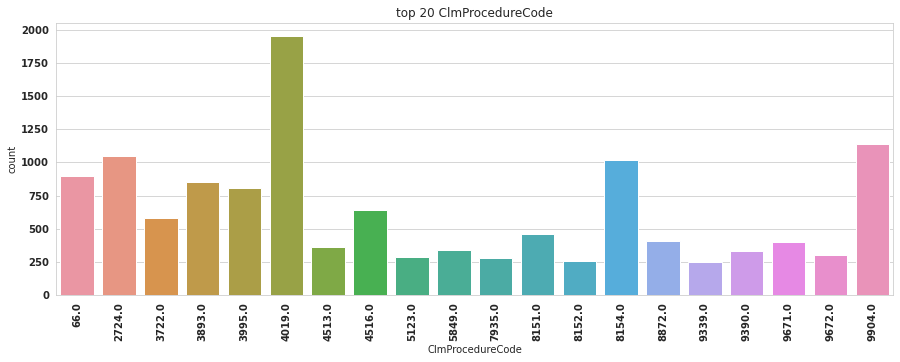

In [400]:
# top 20 ProcedureCode
plt.figure(figsize=(15,5))
plt.title("top 20 ClmProcedureCode")
sns.barplot(x="ClmProcedureCode",y="count",data=ProcedureCode.iloc[:20])
plt.xticks(rotation=90)
plt.show()

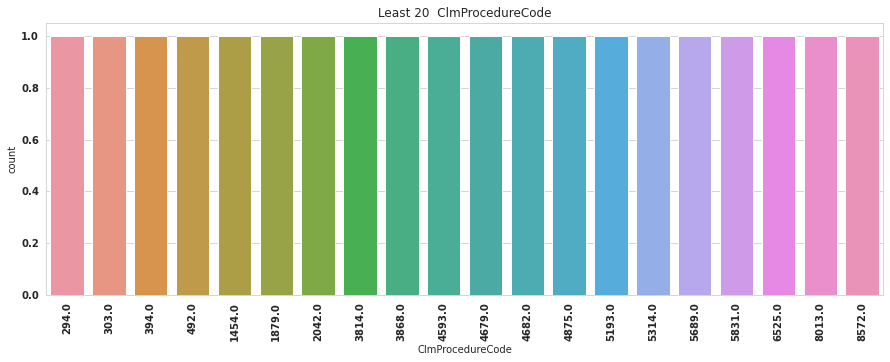

In [401]:
# Least 20 ClmAdmitDiagnosisCode
plt.figure(figsize=(15,5))
plt.title("Least 20  ClmProcedureCode")
sns.barplot(x="ClmProcedureCode",y="count",data=ProcedureCode.iloc[-20:])
plt.xticks(rotation=90)
plt.show()

In [402]:
print("Number of missing data points in ClmDiagnosisCode column:: ",Procedure["ClmProcedureCode"].isnull().sum())
print("Number of missing data points in ClmDiagnosisCode column in percentage  :: {}%".format(round(Procedure["ClmProcedureCode"].isnull().sum()/len(Procedure)*100,2)))


Number of missing data points in ClmDiagnosisCode column::  0
Number of missing data points in ClmDiagnosisCode column in percentage  :: 0.0%


In [404]:
out_df.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')

### 5.15 Outpatient data's ProcedureCode analysis

In [405]:
Procedure=pd.DataFrame(columns=["ClmProcedureCode"])
Procedure["ClmProcedureCode"]=pd.concat([out_df['ClmProcedureCode_1'],out_df[ 'ClmProcedureCode_2'],
                                      out_df['ClmProcedureCode_3'],out_df['ClmProcedureCode_4'], 
                                      out_df['ClmProcedureCode_5'], out_df['ClmProcedureCode_6']], axis=0, sort=True).dropna()

In [406]:
print("No of unique ClmProcedureCode:: ",len(Procedure.ClmProcedureCode.unique()))

No of unique ClmProcedureCode::  104


In [407]:
ProcedureCode=Procedure.ClmProcedureCode.value_counts(sort=True).to_frame().reset_index()
ProcedureCode.columns=["ClmProcedureCode","count"]
ProcedureCode.head()

,ClmProcedureCode,count
0,9904.0,15
1,3722.0,8
2,4516.0,8
3,2724.0,7
4,66.0,7


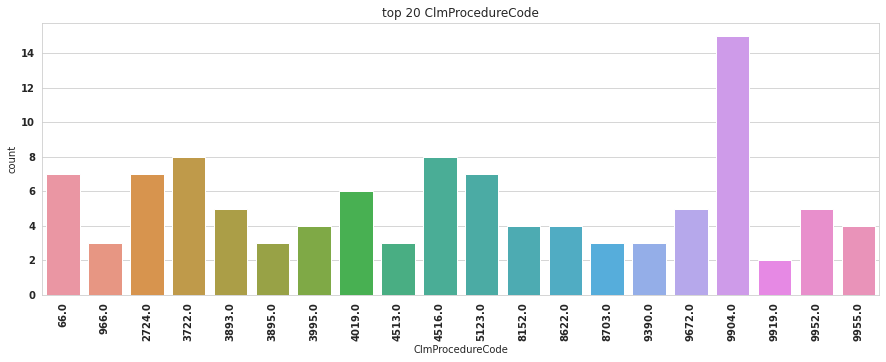

In [408]:
# top 20 ProcedureCode
plt.figure(figsize=(15,5))
plt.title("top 20 ClmProcedureCode")
sns.barplot(x="ClmProcedureCode",y="count",data=ProcedureCode.iloc[:20])
plt.xticks(rotation=90)
plt.show()

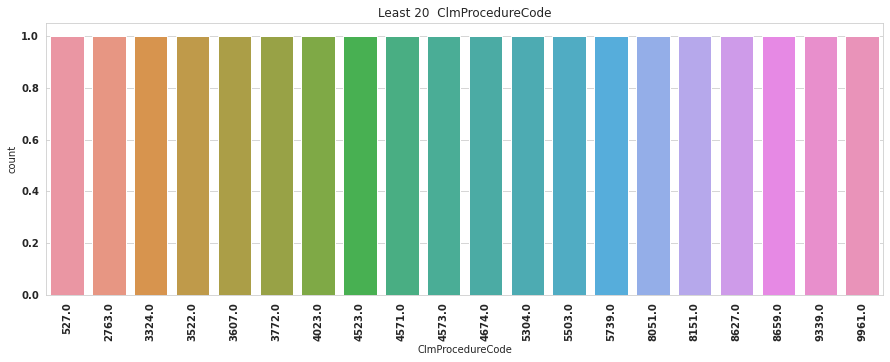

In [409]:
# Least 20 ClmAdmitDiagnosisCode
plt.figure(figsize=(15,5))
plt.title("Least 20  ClmProcedureCode")
sns.barplot(x="ClmProcedureCode",y="count",data=ProcedureCode.iloc[-20:])
plt.xticks(rotation=90)
plt.show()

In [410]:
print("Number of missing data points in ClmDiagnosisCode column:: ",Procedure["ClmProcedureCode"].isnull().sum())
print("Number of missing data points in ClmDiagnosisCode column in percentage  :: {}%".format(round(Procedure["ClmProcedureCode"].isnull().sum()/len(Procedure)*100,2)))


Number of missing data points in ClmDiagnosisCode column::  0
Number of missing data points in ClmDiagnosisCode column in percentage  :: 0.0%


## Data Analysis with labeled data

In [511]:
inp_df=inp_df.merge(target,on="Provider")
out_df=out_df.merge(target,on="Provider")

In [512]:
inp_df.reset_index(drop=True)
out_df.reset_index(drop=True)
inp_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
1,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,...,2753,E9305,NaN,7769.0,5849.0,NaN,NaN,NaN,NaN,Yes
2,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,...,43812,4019,NaN,9338.0,NaN,NaN,NaN,NaN,NaN,Yes
3,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,...,NaN,NaN,NaN,8154.0,NaN,NaN,NaN,NaN,NaN,Yes
4,BENE24402,CLM32911,2009-01-08,2009-01-12,PRV55912,3000,PHY380413,PHY432598,NaN,2009-01-08,...,NaN,NaN,NaN,8543.0,NaN,NaN,NaN,NaN,NaN,Yes


In [498]:
inp_df["ClaimStartDt"]=pd.to_datetime(inp_df["ClaimStartDt"])
inp_df["ClaimEndDt"]=pd.to_datetime(inp_df["ClaimEndDt"])
inp_df["AdmissionDt"]=pd.to_datetime(inp_df["AdmissionDt"])
inp_df["DischargeDt"]=pd.to_datetime(inp_df["DischargeDt"])
out_df["ClaimStartDt"]=pd.to_datetime(out_df["ClaimStartDt"])
out_df["ClaimEndDt"]=pd.to_datetime(out_df["ClaimEndDt"])



In [513]:
print("Shape of inpatient data:",inp_df.shape)
print("Shape of outpatient data:",out_df.shape)

Shape of inpatient data: (40474, 31)
Shape of outpatient data: (517737, 28)


In [514]:
inp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40474 entries, 0 to 40473
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   BeneID                  40474 non-null  object        
 1   ClaimID                 40474 non-null  object        
 2   ClaimStartDt            40474 non-null  datetime64[ns]
 3   ClaimEndDt              40474 non-null  datetime64[ns]
 4   Provider                40474 non-null  object        
 5   InscClaimAmtReimbursed  40474 non-null  int64         
 6   AttendingPhysician      40362 non-null  object        
 7   OperatingPhysician      23830 non-null  object        
 8   OtherPhysician          4690 non-null   object        
 9   AdmissionDt             40474 non-null  datetime64[ns]
 10  ClmAdmitDiagnosisCode   40474 non-null  object        
 11  DeductibleAmtPaid       39575 non-null  float64       
 12  DischargeDt             40474 non-null  dateti

## 2. Distribution of data

### 2.1 Inpatient target variable analysis 

In [515]:
# distribution of target variable
inp_df["PotentialFraud"].value_counts(normalize=True)

Yes    0.578198
No     0.421802
Name: PotentialFraud, dtype: float64

******************** Distribution of Target Variable ********************


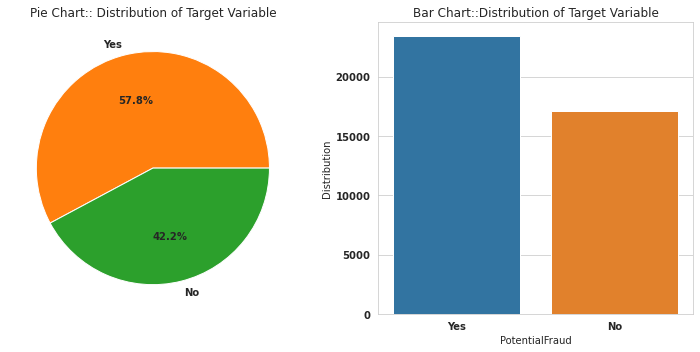

In [516]:
data=inp_df["PotentialFraud"].value_counts()
print("*"*20,"Distribution of Target Variable","*"*20)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
#define Seaborn color palette to use
colors = sns.color_palette('tab10')[1:5]
plt.pie(data,autopct="%.1f%%", labels=data.index.values,colors=colors)
plt.title("Pie Chart:: Distribution of Target Variable")
plt.subplot(1,2,2)
sns.countplot(x=inp_df["PotentialFraud"])
plt.ylabel("Distribution")
plt.title("Bar Chart::Distribution of Target Variable")
plt.tight_layout()
plt.show()

### 2.2 Outpatient target variable analysis 

In [517]:
# distribution of target variable
out_df["PotentialFraud"].value_counts(normalize=True)

No     0.634189
Yes    0.365811
Name: PotentialFraud, dtype: float64

******************** Distribution of Target Variable ********************


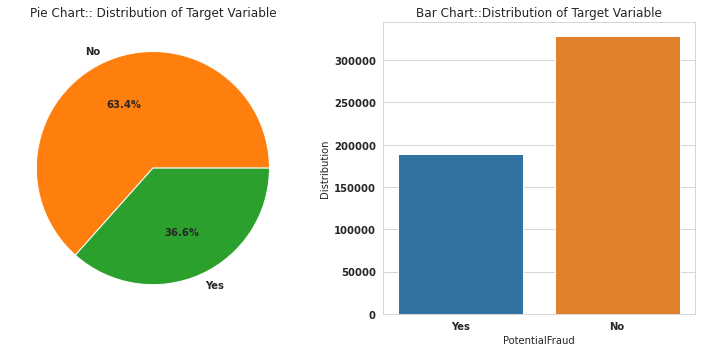

In [518]:
data=out_df["PotentialFraud"].value_counts()
print("*"*20,"Distribution of Target Variable","*"*20)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
#define Seaborn color palette to use
colors = sns.color_palette('tab10')[1:5]
plt.pie(data,autopct="%.1f%%", labels=data.index.values,colors=colors)
plt.title("Pie Chart:: Distribution of Target Variable")
plt.subplot(1,2,2)
sns.countplot(x=out_df["PotentialFraud"])
plt.ylabel("Distribution")
plt.title("Bar Chart::Distribution of Target Variable")
plt.tight_layout()
plt.show()

## 3. Date Analysis with Labeled data

### 3.1 Date Analysis of Inpatient data

In [522]:
date_data=inp_df[["ClaimStartDt","ClaimEndDt","AdmissionDt","DischargeDt","PotentialFraud"]]
date_data.head()

,ClaimStartDt,ClaimEndDt,AdmissionDt,DischargeDt,PotentialFraud
0,2009-04-12,2009-04-18,2009-04-12,2009-04-18,Yes
1,2009-01-20,2009-02-01,2009-01-20,2009-02-01,Yes
2,2009-10-17,2009-11-04,2009-10-17,2009-11-04,Yes
3,2009-10-25,2009-10-29,2009-10-25,2009-10-29,Yes
4,2009-01-08,2009-01-12,2009-01-08,2009-01-12,Yes


In [523]:
def get_month(dt):
    return dt.strftime("%b")

In [524]:
# date_data[["ClaimStartDt","ClaimEndDt","AdmissionDt","DischargeDt"]]=date_data[["ClaimStartDt","ClaimEndDt","AdmissionDt","DischargeDt"]].astype("datetime64[ns]")
date_data["diff_day"]=date_data.ClaimEndDt-date_data.ClaimStartDt
date_data["diff_week"]=date_data["diff_day"]/np.timedelta64(1,'W')
date_data["diff_day"]=date_data["diff_day"]/np.timedelta64(1,'D')
date_data['admission_month']=date_data["AdmissionDt"].apply(get_month)
date_data['discharge_month']=date_data["DischargeDt"].apply(get_month)
date_data["admitted_days"]=date_data.DischargeDt-date_data.AdmissionDt
date_data["admitted_days"]=date_data["admitted_days"]/np.timedelta64(1,'D')

date_data.head()

,ClaimStartDt,ClaimEndDt,AdmissionDt,DischargeDt,PotentialFraud,diff_day,diff_week,admission_month,discharge_month,admitted_days
0,2009-04-12,2009-04-18,2009-04-12,2009-04-18,Yes,6.0,0.857143,Apr,Apr,6.0
1,2009-01-20,2009-02-01,2009-01-20,2009-02-01,Yes,12.0,1.714286,Jan,Feb,12.0
2,2009-10-17,2009-11-04,2009-10-17,2009-11-04,Yes,18.0,2.571429,Oct,Nov,18.0
3,2009-10-25,2009-10-29,2009-10-25,2009-10-29,Yes,4.0,0.571429,Oct,Oct,4.0
4,2009-01-08,2009-01-12,2009-01-08,2009-01-12,Yes,4.0,0.571429,Jan,Jan,4.0


In [525]:
date_data.tail()

,ClaimStartDt,ClaimEndDt,AdmissionDt,DischargeDt,PotentialFraud,diff_day,diff_week,admission_month,discharge_month,admitted_days
40469,2009-06-24,2009-07-01,2009-06-24,2009-07-01,No,7.0,1.000000,Jun,Jul,7.0
40470,2009-09-06,2009-09-13,2009-09-06,2009-09-13,No,7.0,1.000000,Sep,Sep,7.0
40471,2009-11-15,2009-11-23,2009-11-15,2009-11-23,No,8.0,1.142857,Nov,Nov,8.0
40472,2009-01-23,2009-01-23,2009-01-23,2009-01-23,No,0.0,0.000000,Jan,Jan,0.0
40473,2009-02-18,2009-02-25,2009-02-18,2009-02-25,No,7.0,1.000000,Feb,Feb,7.0


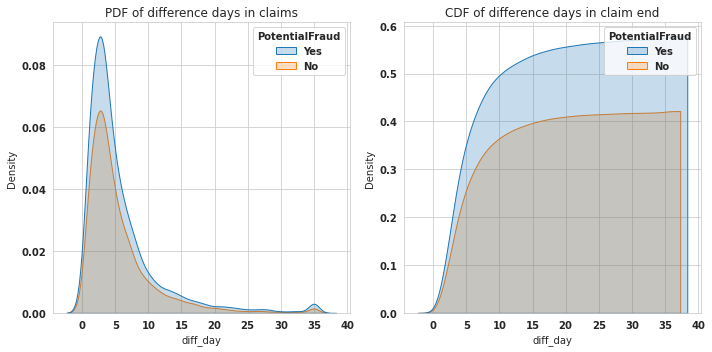

In [527]:
#PDF for difference days in claim dates
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("PDF of difference days in claims")
# sns.histplot(date_data.diff_day,cumulative=False,fill=True)
sns.kdeplot(date_data.diff_day,cumulative=False,fill=True,hue=date_data.PotentialFraud)
plt.subplot(1,2,2)
plt.title("CDF of difference days in claim end")
sns.kdeplot(date_data.diff_day,cumulative=True,fill=True,hue=date_data.PotentialFraud)
plt.tight_layout()
plt.show()

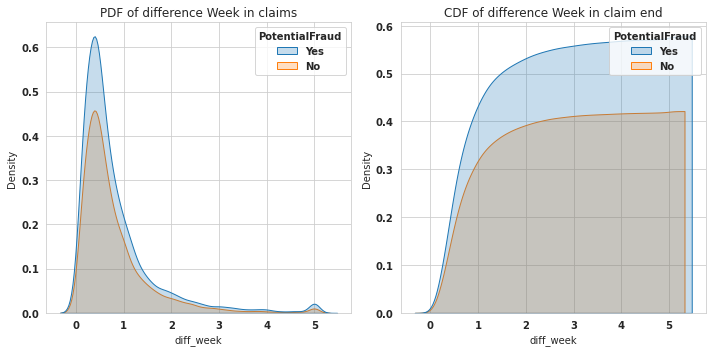

In [528]:
#PDF for difference WEEK in claim dates
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("PDF of difference Week in claims")
# sns.histplot(date_data.diff_day,cumulative=False,fill=True)
sns.kdeplot(date_data.diff_week,cumulative=False,fill=True,hue=date_data.PotentialFraud)
plt.subplot(1,2,2)
# CDF for difference WEEK in claim dates
plt.title("CDF of difference Week in claim end")
sns.kdeplot(date_data.diff_week,cumulative=True,fill=True,hue=date_data.PotentialFraud)
plt.tight_layout()
plt.show()

In [529]:
fradulent_date_data=date_data[date_data.PotentialFraud =="Yes"]
non_fradulent_date_data=date_data[date_data.PotentialFraud =="No"]


In [531]:
# Fradulant date analysis with percentile
for i in range(10,101,10):
    print("{}th percentile :: {}".format(i,round(np.percentile(fradulent_date_data.diff_day.values,i))))

10th percentile :: 1
20th percentile :: 2
30th percentile :: 3
40th percentile :: 3
50th percentile :: 4
60th percentile :: 5
70th percentile :: 6
80th percentile :: 8
90th percentile :: 12
100th percentile :: 36


In [532]:
# legitimate date analysis with percentile
for i in range(10,101,10):
    print("{}th percentile :: {}".format(i,round(np.percentile(non_fradulent_date_data.diff_day.values,i))))

10th percentile :: 1
20th percentile :: 2
30th percentile :: 3
40th percentile :: 3
50th percentile :: 4
60th percentile :: 5
70th percentile :: 6
80th percentile :: 8
90th percentile :: 12
100th percentile :: 35


******************** Admission Month ********************


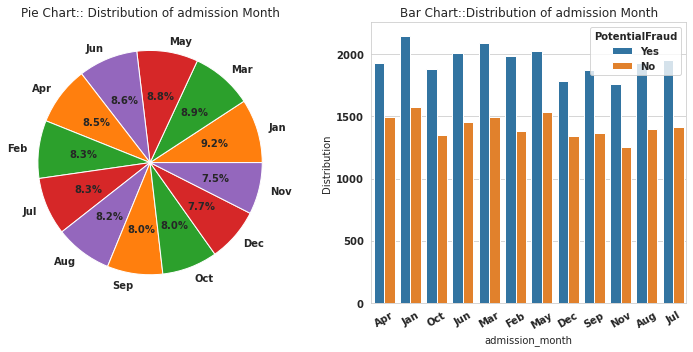

In [535]:
data=date_data["admission_month"].value_counts()
print("*"*20,"Admission Month","*"*20)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
#define Seaborn color palette to use
colors = sns.color_palette('tab10')[1:5]
plt.pie(data,autopct="%.1f%%", labels=data.index.values,colors=colors)
plt.title("Pie Chart:: Distribution of admission Month")
plt.subplot(1,2,2)
sns.countplot(x=date_data["admission_month"],hue=date_data.PotentialFraud)
plt.xticks(rotation=30)
plt.ylabel("Distribution")
plt.title("Bar Chart::Distribution of admission Month")
plt.tight_layout()
plt.show()

### 3.2 Date Analysis of outpatient data

In [537]:
date_data=out_df[["ClaimStartDt","ClaimEndDt","PotentialFraud"]]
date_data.head()

,ClaimStartDt,ClaimEndDt,PotentialFraud
0,2009-10-11,2009-10-11,Yes
1,2009-01-06,2009-01-06,Yes
2,2009-01-22,2009-01-22,Yes
3,2009-02-03,2009-02-03,Yes
4,2009-03-03,2009-03-03,Yes


In [538]:
def get_month(dt):
    return dt.strftime("%b")

In [539]:
# date_data[["ClaimStartDt","ClaimEndDt","AdmissionDt","DischargeDt"]]=date_data[["ClaimStartDt","ClaimEndDt","AdmissionDt","DischargeDt"]].astype("datetime64[ns]")
date_data["diff_day"]=date_data.ClaimEndDt-date_data.ClaimStartDt
date_data["diff_week"]=date_data["diff_day"]/np.timedelta64(1,'W')
date_data["diff_day"]=date_data["diff_day"]/np.timedelta64(1,'D')
date_data.head()

,ClaimStartDt,ClaimEndDt,PotentialFraud,diff_day,diff_week
0,2009-10-11,2009-10-11,Yes,0.0,0.0
1,2009-01-06,2009-01-06,Yes,0.0,0.0
2,2009-01-22,2009-01-22,Yes,0.0,0.0
3,2009-02-03,2009-02-03,Yes,0.0,0.0
4,2009-03-03,2009-03-03,Yes,0.0,0.0


In [540]:
date_data.tail()

,ClaimStartDt,ClaimEndDt,PotentialFraud,diff_day,diff_week
517732,2009-02-08,2009-02-08,No,0.0,0.000000
517733,2009-09-28,2009-09-28,No,0.0,0.000000
517734,2009-07-09,2009-07-29,No,20.0,2.857143
517735,2009-04-16,2009-04-16,No,0.0,0.000000
517736,2009-09-20,2009-09-20,No,0.0,0.000000


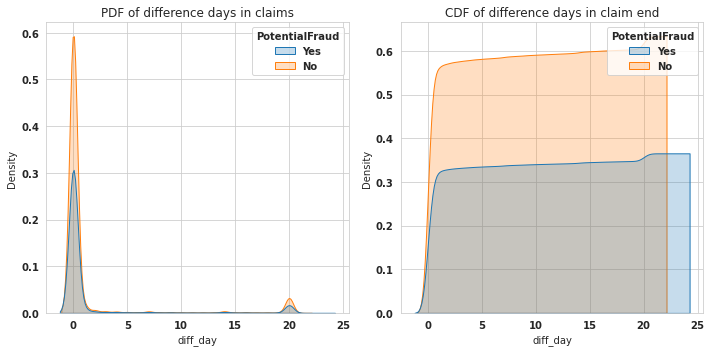

In [541]:
#PDF for difference days in claim dates
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("PDF of difference days in claims")
# sns.histplot(date_data.diff_day,cumulative=False,fill=True)
sns.kdeplot(date_data.diff_day,cumulative=False,fill=True,hue=date_data.PotentialFraud)
plt.subplot(1,2,2)
plt.title("CDF of difference days in claim end")
sns.kdeplot(date_data.diff_day,cumulative=True,fill=True,hue=date_data.PotentialFraud)
plt.tight_layout()
plt.show()

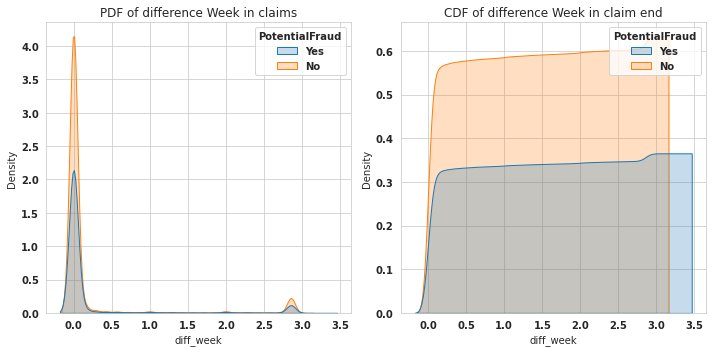

In [542]:
#PDF for difference WEEK in claim dates
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("PDF of difference Week in claims")
# sns.histplot(date_data.diff_day,cumulative=False,fill=True)
sns.kdeplot(date_data.diff_week,cumulative=False,fill=True,hue=date_data.PotentialFraud)
plt.subplot(1,2,2)
# CDF for difference WEEK in claim dates
plt.title("CDF of difference Week in claim end")
sns.kdeplot(date_data.diff_week,cumulative=True,fill=True,hue=date_data.PotentialFraud)
plt.tight_layout()
plt.show()

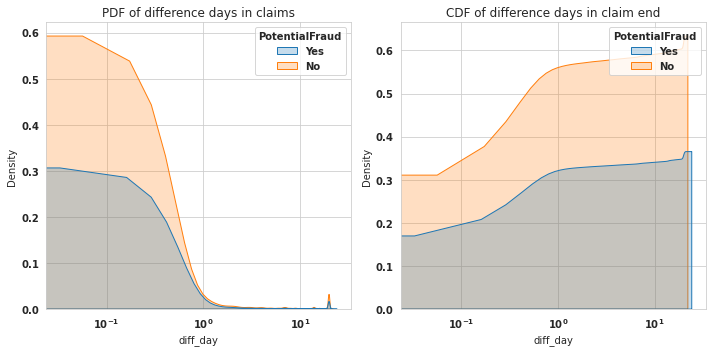

In [543]:
#PDF for difference days in claim dates
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("PDF of difference days in claims")
# sns.histplot(date_data.diff_day,cumulative=False,fill=True)
sns.kdeplot(date_data.diff_day,cumulative=False,fill=True,hue=date_data.PotentialFraud)
plt.xscale("log")
plt.subplot(1,2,2)
plt.title("CDF of difference days in claim end")
sns.kdeplot(date_data.diff_day,cumulative=True,fill=True,hue=date_data.PotentialFraud)
plt.xscale("log")
plt.tight_layout()
plt.show()

In [545]:
fradulent_date_data=date_data[date_data.PotentialFraud =="Yes"]
non_fradulent_date_data=date_data[date_data.PotentialFraud =="No"]


In [546]:
# Fradulant date analysis with percentile
for i in range(10,101,10):
    print("{}th percentile :: {}".format(i,round(np.percentile(fradulent_date_data.diff_day.values,i))))

10th percentile :: 0
20th percentile :: 0
30th percentile :: 0
40th percentile :: 0
50th percentile :: 0
60th percentile :: 0
70th percentile :: 0
80th percentile :: 0
90th percentile :: 2
100th percentile :: 23


In [547]:
# legitimate date analysis with percentile
for i in range(10,101,10):
    print("{}th percentile :: {}".format(i,round(np.percentile(non_fradulent_date_data.diff_day.values,i))))

10th percentile :: 0
20th percentile :: 0
30th percentile :: 0
40th percentile :: 0
50th percentile :: 0
60th percentile :: 0
70th percentile :: 0
80th percentile :: 0
90th percentile :: 2
100th percentile :: 21


## 4. Numerical variable analysis with Labeled data

### 4.1 Inpetaint InscClaimAmtReimbursed analysis with Labeled data

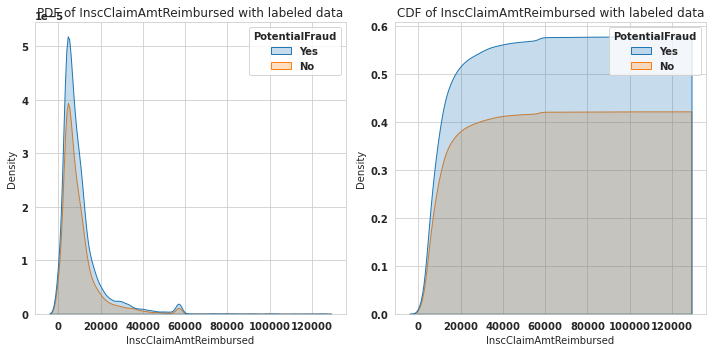

In [549]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("PDF of InscClaimAmtReimbursed with labeled data")
# sns.histplot(date_data.diff_day,cumulative=False,fill=True)
sns.kdeplot(inp_df.InscClaimAmtReimbursed,cumulative=False,fill=True,hue=inp_df["PotentialFraud"])
plt.subplot(1,2,2)
plt.title("CDF of InscClaimAmtReimbursed with labeled data")
sns.kdeplot(inp_df.InscClaimAmtReimbursed,cumulative=True,fill=True,hue=inp_df["PotentialFraud"])
plt.tight_layout()
plt.show()

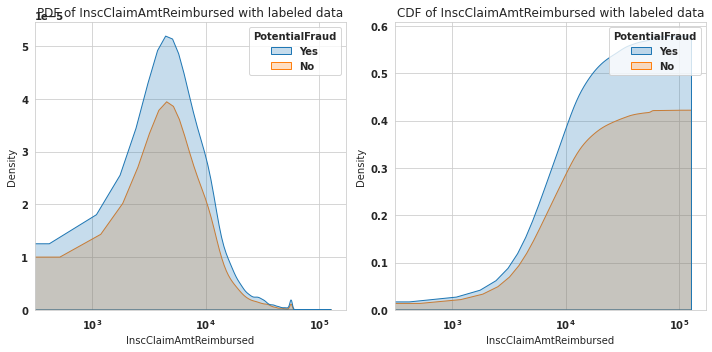

In [551]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("PDF of InscClaimAmtReimbursed with labeled data")
# sns.histplot(date_data.diff_day,cumulative=False,fill=True)
sns.kdeplot(inp_df.InscClaimAmtReimbursed,cumulative=False,fill=True,hue=inp_df["PotentialFraud"])
plt.xscale("log")
plt.subplot(1,2,2)
plt.title("CDF of InscClaimAmtReimbursed with labeled data")
sns.kdeplot(inp_df.InscClaimAmtReimbursed,cumulative=True,fill=True,hue=inp_df["PotentialFraud"])
plt.xscale("log")
plt.tight_layout()
plt.show()

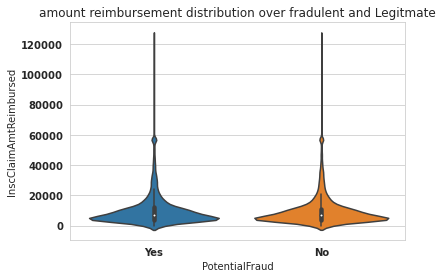

In [553]:
plt.title("amount reimbursement distribution over fradulent and Legitmate")
sns.violinplot(y=inp_df.InscClaimAmtReimbursed,x=inp_df["PotentialFraud"])
plt.show()

### 4.2 Outpetaint InscClaimAmtReimbursed analysis

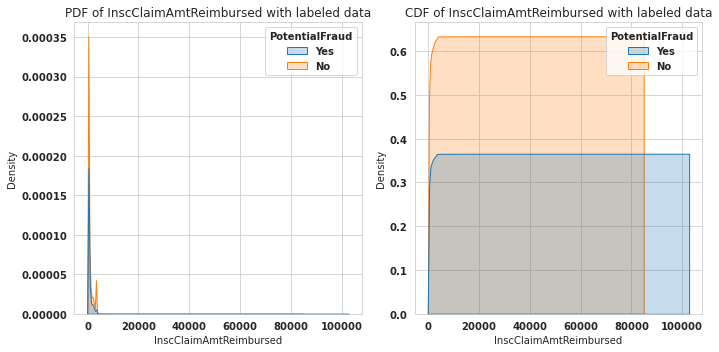

In [558]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("PDF of InscClaimAmtReimbursed with labeled data")
# sns.histplot(date_data.diff_day,cumulative=False,fill=True)
sns.kdeplot(out_df.InscClaimAmtReimbursed,cumulative=False,fill=True,hue=out_df["PotentialFraud"])
# plt.xscale("log")
plt.subplot(1,2,2)
plt.title("CDF of InscClaimAmtReimbursed with labeled data")
sns.kdeplot(out_df.InscClaimAmtReimbursed,cumulative=True,fill=True,hue=out_df["PotentialFraud"])
# plt.xscale("log")
plt.tight_layout()
plt.show()

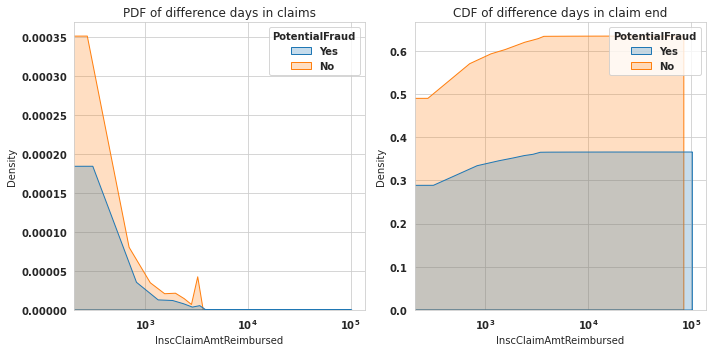

In [559]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("PDF of difference days in claims")
# sns.histplot(date_data.diff_day,cumulative=False,fill=True)
sns.kdeplot(out_df.InscClaimAmtReimbursed,cumulative=False,fill=True,hue=out_df["PotentialFraud"])
plt.xscale("log")
plt.subplot(1,2,2)
plt.title("CDF of difference days in claim end")
sns.kdeplot(out_df.InscClaimAmtReimbursed,cumulative=True,fill=True,hue=out_df["PotentialFraud"])
plt.xscale("log")
plt.tight_layout()
plt.show()

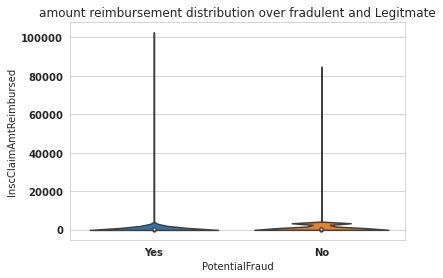

In [560]:
plt.title("amount reimbursement distribution over fradulent and Legitmate")
sns.violinplot(y=out_df.InscClaimAmtReimbursed,x=out_df["PotentialFraud"])
plt.show()

### 4.3 Inpetaint DeductibleAmtPaid analysis with target 

In [565]:
print("value count of DeductibleAmtPaid of Fradulent ")
inp_df[inp_df.PotentialFraud=="Yes"]["DeductibleAmtPaid"].value_counts()

value count of DeductibleAmtPaid of Fradulent 


1068.0    22894
Name: DeductibleAmtPaid, dtype: int64

In [566]:
print("value count of DeductibleAmtPaid of Fradulent ")
inp_df[inp_df.PotentialFraud=="No"]["DeductibleAmtPaid"].value_counts()

value count of DeductibleAmtPaid of Fradulent 


1068.0    16681
Name: DeductibleAmtPaid, dtype: int64

In [569]:
print("Number of missing data points in DeductibleAmtPaid column for Fradulent:: ",inp_df[inp_df.PotentialFraud=="Yes"]["DeductibleAmtPaid"].isnull().sum())
print("Number of missing data points in DeductibleAmtPaid column for Lagitmate:: ",inp_df[inp_df.PotentialFraud=="No"]["DeductibleAmtPaid"].isnull().sum())

Number of missing data points in DeductibleAmtPaid column for Fradulent::  508
Number of missing data points in DeductibleAmtPaid column for Lagitmate::  391


### 4.2 Outpetaint DeductibleAmtPaid analysis

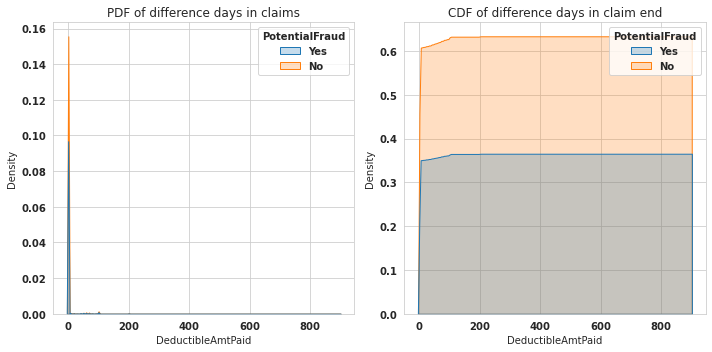

In [570]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("PDF of difference days in claims")
# sns.histplot(date_data.diff_day,cumulative=False,fill=True)
sns.kdeplot(out_df.DeductibleAmtPaid,cumulative=False,fill=True,hue=out_df["PotentialFraud"])
# plt.xscale("log")
plt.subplot(1,2,2)
plt.title("CDF of difference days in claim end")
sns.kdeplot(out_df.DeductibleAmtPaid,cumulative=True,fill=True,hue=out_df["PotentialFraud"])
# plt.xscale("log")
plt.tight_layout()
plt.show()

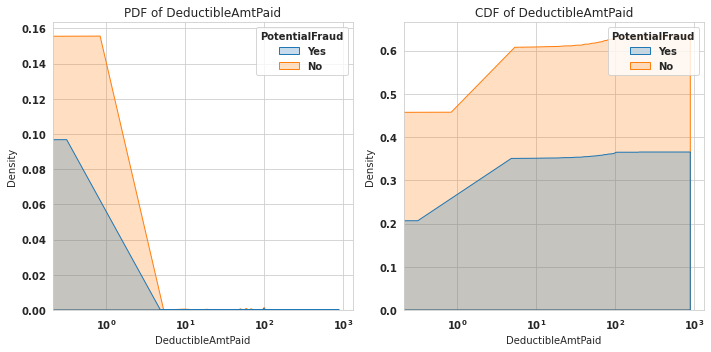

In [571]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("PDF of DeductibleAmtPaid")
# sns.histplot(date_data.diff_day,cumulative=False,fill=True)
sns.kdeplot(out_df.DeductibleAmtPaid,cumulative=False,fill=True,hue=out_df["PotentialFraud"])
plt.xscale("log")
plt.subplot(1,2,2)
plt.title("CDF of DeductibleAmtPaid")
sns.kdeplot(out_df.DeductibleAmtPaid,cumulative=True,fill=True,hue=out_df["PotentialFraud"])
plt.xscale("log")
plt.tight_layout()
plt.show()

In [572]:
# Percentine Intution
for i in range(10,101,10):
    print("{}th percentile :: {}".format(i,round(np.percentile(out_df[out_df.PotentialFraud=="Yes"]["DeductibleAmtPaid"],i))))

10th percentile :: 0
20th percentile :: 0
30th percentile :: 0
40th percentile :: 0
50th percentile :: 0
60th percentile :: 0
70th percentile :: 0
80th percentile :: 0
90th percentile :: 0
100th percentile :: 897


In [573]:
# Percentine Intution
for i in range(90,101,1):
    print("{}th percentile :: {}".format(i,round(np.percentile(out_df[out_df.PotentialFraud=="Yes"]["DeductibleAmtPaid"],i))))

90th percentile :: 0
91th percentile :: 0
92th percentile :: 0
93th percentile :: 0
94th percentile :: 0
95th percentile :: 0
96th percentile :: 10
97th percentile :: 40
98th percentile :: 70
99th percentile :: 100
100th percentile :: 897


In [574]:
# Percentine Intution
for i in range(1,11):
    print("{}th percentile :: {}".format(99+i*0.1,round(np.percentile(out_df[out_df.PotentialFraud=="Yes"]["DeductibleAmtPaid"],99+i*0.1))))

99.1th percentile :: 100
99.2th percentile :: 100
99.3th percentile :: 100
99.4th percentile :: 100
99.5th percentile :: 100
99.6th percentile :: 100
99.7th percentile :: 100
99.8th percentile :: 100
99.9th percentile :: 200
100.0th percentile :: 897


In [575]:
# Percentine Intution for Lagitmate
for i in range(10,101,10):
    print("{}th percentile :: {}".format(i,round(np.percentile(out_df[out_df.PotentialFraud=="No"]["DeductibleAmtPaid"],i))))

10th percentile :: 0
20th percentile :: 0
30th percentile :: 0
40th percentile :: 0
50th percentile :: 0
60th percentile :: 0
70th percentile :: 0
80th percentile :: 0
90th percentile :: 0
100th percentile :: 897


In [576]:
# Percentine Intution
for i in range(90,101,1):
    print("{}th percentile :: {}".format(i,round(np.percentile(out_df[out_df.PotentialFraud=="No"]["DeductibleAmtPaid"],i))))

90th percentile :: 0
91th percentile :: 0
92th percentile :: 0
93th percentile :: 0
94th percentile :: 0
95th percentile :: 0
96th percentile :: 10
97th percentile :: 40
98th percentile :: 70
99th percentile :: 100
100th percentile :: 897


In [577]:
# Percentine Intution
for i in range(1,11):
    print("{}th percentile :: {}".format(99+i*0.1,round(np.percentile(out_df[out_df.PotentialFraud=="No"]["DeductibleAmtPaid"],99+i*0.1))))

99.1th percentile :: 100
99.2th percentile :: 100
99.3th percentile :: 100
99.4th percentile :: 100
99.5th percentile :: 100
99.6th percentile :: 100
99.7th percentile :: 100
99.8th percentile :: 100
99.9th percentile :: 200
100.0th percentile :: 897


In [578]:
print("Number of missing data points in DeductibleAmtPaid column:: ",out_df["DeductibleAmtPaid"].isnull().sum())

Number of missing data points in DeductibleAmtPaid column::  0


## 5. Categorical variable analysis with Target variable

### 5.1 Inpatient data's provider analysis with Target

#### 5.1.a Top 20 Fradulent provider 

In [584]:
Frad_provider=inp_df[inp_df.PotentialFraud == "Yes"]["Provider"].value_counts().to_frame().reset_index()
Frad_provider.columns=["provider","count"]
Frad_provider.head()

,provider,count
0,PRV52019,516
1,PRV55462,386
2,PRV54367,322
3,PRV53706,282
4,PRV55209,275


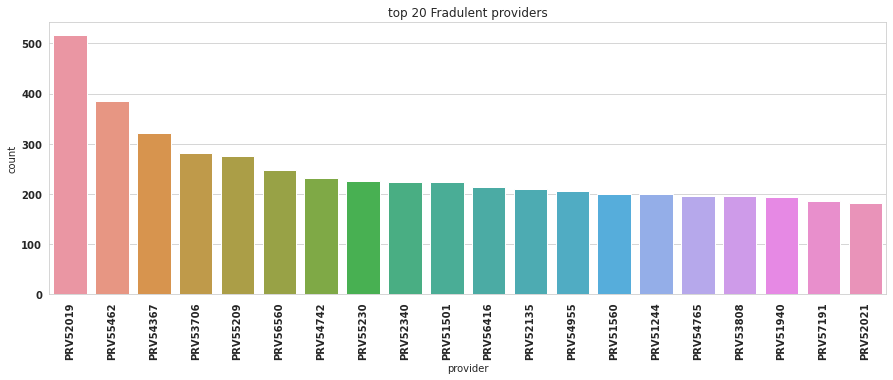

In [585]:
# top 20 providers who submitted maximum claims
plt.figure(figsize=(15,5))
plt.title("top 20 Fradulent providers")
sns.barplot(x="provider",y="count",data=Frad_provider.iloc[:20])
plt.xticks(rotation=90)
plt.show()

#### 5.1.b Top 20 Lagitmate provider 

In [586]:
NonFrad_provider=inp_df[inp_df.PotentialFraud == "No"]["Provider"].value_counts().to_frame().reset_index()
NonFrad_provider.columns=["provider","count"]
NonFrad_provider.head()

,provider,count
0,PRV55916,115
1,PRV51456,112
2,PRV56761,92
3,PRV55978,92
4,PRV54348,91


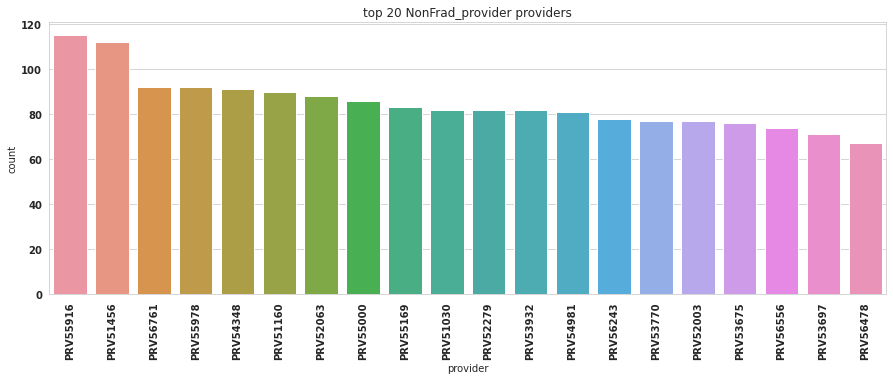

In [587]:
# top 20 providers who submitted maximum claims
plt.figure(figsize=(15,5))
plt.title("top 20 NonFrad_provider providers")
sns.barplot(x="provider",y="count",data=NonFrad_provider.iloc[:20])
plt.xticks(rotation=90)
plt.show()

#### 5.1.c Common providers who also involved fradulent activity

In [589]:
common=Frad_provider.merge(NonFrad_provider,on="provider",how="inner")

In [591]:
print("No of provider who involved in both activity::",len(common))

No of provider who involved in both activity:: 0


### 5.2 Outpatient data's provider analysis

#### 5.2.a Top 20 Fradulent provider 

In [592]:
Frad_provider=out_df[out_df.PotentialFraud == "Yes"]["Provider"].value_counts().to_frame().reset_index()
Frad_provider.columns=["provider","count"]
Frad_provider.head()

,provider,count
0,PRV51459,8240
1,PRV53797,4739
2,PRV51574,4444
3,PRV53918,3588
4,PRV54895,3433


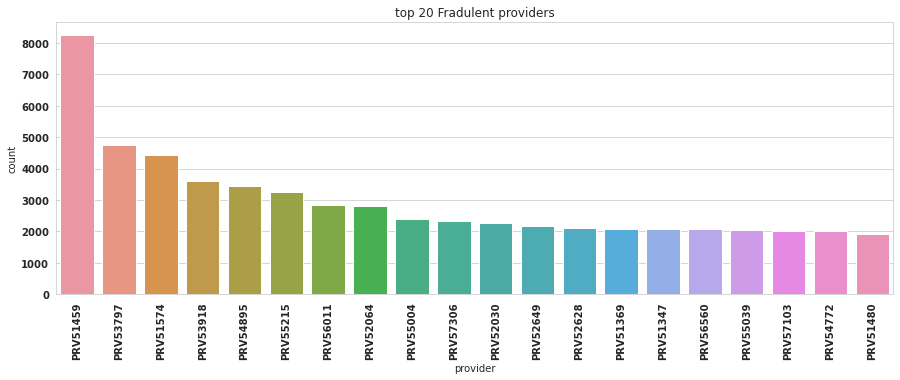

In [593]:
# top 20 providers who submitted maximum claims
plt.figure(figsize=(15,5))
plt.title("top 20 Fradulent providers")
sns.barplot(x="provider",y="count",data=Frad_provider.iloc[:20])
plt.xticks(rotation=90)
plt.show()

#### 5.2.b Top 20 Lagitmate provider 

In [595]:
NonFrad_provider=out_df[out_df.PotentialFraud == "No"]["Provider"].value_counts().to_frame().reset_index()
NonFrad_provider.columns=["provider","count"]
NonFrad_provider.head()

,provider,count
0,PRV53750,1244
1,PRV53871,1220
2,PRV55552,1202
3,PRV52104,1189
4,PRV52001,1177


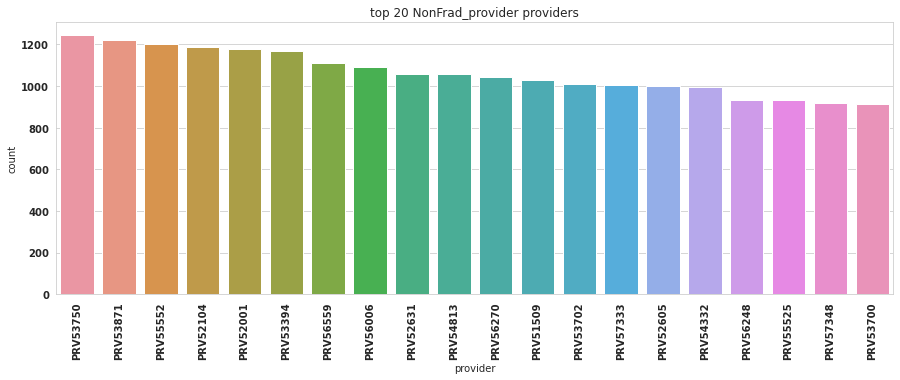

In [596]:
# top 20 providers who submitted maximum claims
plt.figure(figsize=(15,5))
plt.title("top 20 NonFrad_provider providers")
sns.barplot(x="provider",y="count",data=NonFrad_provider.iloc[:20])
plt.xticks(rotation=90)
plt.show()

#### 5.2.c Common providers who also involved fradulent activity

In [597]:
common=Frad_provider.merge(NonFrad_provider,on="provider",how="inner")

In [598]:
print("No of provider who involved in both activity::",len(common))

No of provider who involved in both activity:: 0


### 5.3 Inpatient data's AttendingPhysician analysis

#### 5.3.a Attended Physician who involved in Fradulent

In [600]:
Frad_Physician=inp_df[inp_df.PotentialFraud == "Yes"]["AttendingPhysician"].value_counts().to_frame().reset_index()
Frad_Physician.columns=["AttendingPhysician","count"]
Frad_Physician.head()

,AttendingPhysician,count
0,PHY422134,386
1,PHY341560,274
2,PHY315112,208
3,PHY411541,198
4,PHY362864,195


In [602]:
print("No of unique fraud physician who atteded patients:: ",len(Frad_Physician.AttendingPhysician.unique()))

No of unique fraud physician who atteded patients::  4052


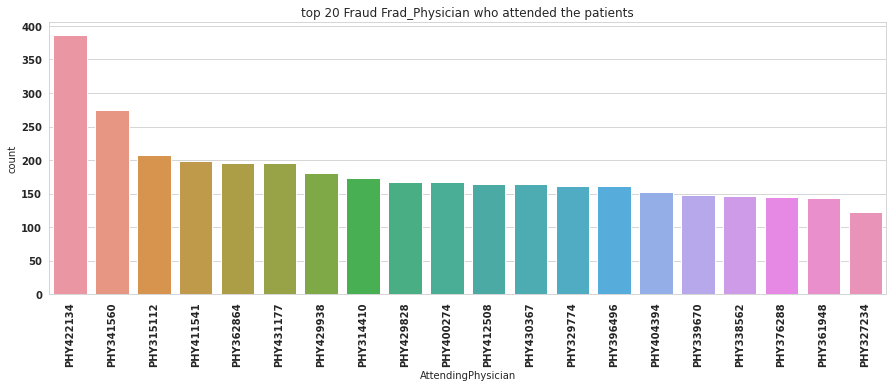

In [604]:
# top 20 AttendingPhysician who submitted maximum claims
plt.figure(figsize=(15,5))
plt.title("top 20  Frad_Physician who attended the patients")
sns.barplot(x="AttendingPhysician",y="count",data=Frad_Physician.iloc[:20])
plt.xticks(rotation=90)
plt.show()

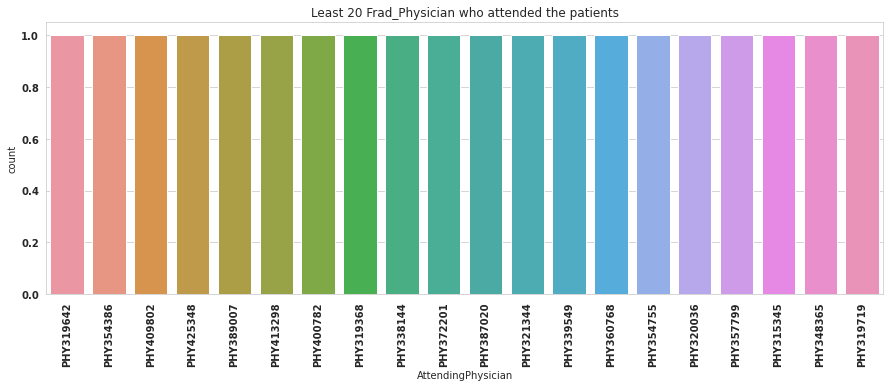

In [605]:
# Least 20 AttendingPhysician who attended mimimum patients
plt.figure(figsize=(15,5))
plt.title("Least 20 Frad_Physician who attended the patients")
sns.barplot(x="AttendingPhysician",y="count",data=Frad_Physician.iloc[-20:])
plt.xticks(rotation=90)
plt.show()

#### 5.3.b Attended Physician who are not involved in Fradulent

In [606]:
NonFrad_Physician=inp_df[inp_df.PotentialFraud == "No"]["AttendingPhysician"].value_counts().to_frame().reset_index()
NonFrad_Physician.columns=["AttendingPhysician","count"]
NonFrad_Physician.head()

,AttendingPhysician,count
0,PHY428454,114
1,PHY382517,82
2,PHY342806,81
3,PHY350551,58
4,PHY424985,57


In [626]:
print("No of unique Non fraud physician who atteded patients:: ",len(NonFrad_Physician.AttendingPhysician.unique()))

No of unique Non fraud physician who atteded patients::  57617


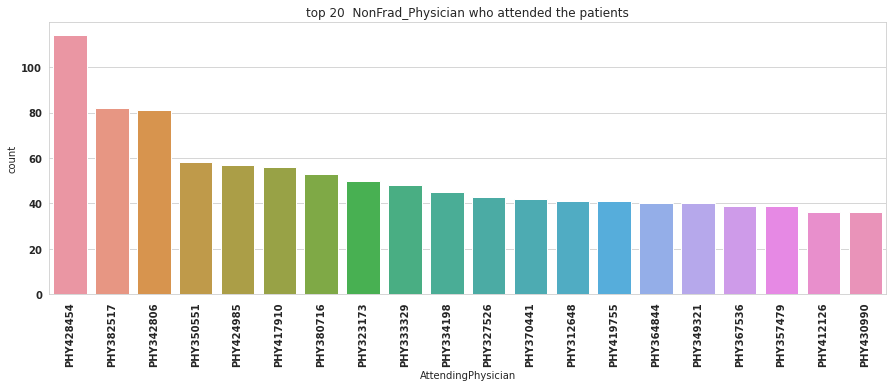

In [608]:
# top 20 AttendingPhysician who submitted maximum claims
plt.figure(figsize=(15,5))
plt.title("top 20  NonFrad_Physician who attended the patients")
sns.barplot(x="AttendingPhysician",y="count",data=NonFrad_Physician.iloc[:20])
plt.xticks(rotation=90)
plt.show()

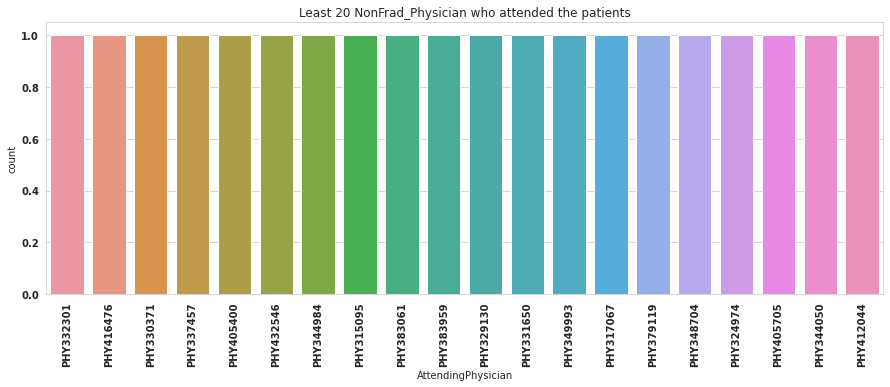

In [609]:
# Least 20 AttendingPhysician who attended mimimum patients
plt.figure(figsize=(15,5))
plt.title("Least 20 NonFrad_Physician who attended the patients")
sns.barplot(x="AttendingPhysician",y="count",data=NonFrad_Physician.iloc[-20:])
plt.xticks(rotation=90)
plt.show()

#### 5.3.c Common AttendingPhysician who also involved fradulent activity

In [610]:
common=Frad_Physician.merge(NonFrad_Physician,on="AttendingPhysician",how="inner")

In [611]:
print("No of provider who involved in both activity::",len(common))

No of provider who involved in both activity:: 71


In [612]:
common.head()

,AttendingPhysician,count_x,count_y
0,PHY424272,73,1
1,PHY385396,45,1
2,PHY313567,23,1
3,PHY340196,19,1
4,PHY364094,19,2


In [613]:
common.tail()

,AttendingPhysician,count_x,count_y
66,PHY401856,1,2
67,PHY390313,1,2
68,PHY349378,1,1
69,PHY360547,1,1
70,PHY345285,1,3


### 5.4 Outpatient data's AttendingPhysician analysis with Target variable

#### 5.4.a Attended Physician who involved in Fradulent

In [614]:
Frad_Physician=out_df[out_df.PotentialFraud == "Yes"]["AttendingPhysician"].value_counts().to_frame().reset_index()
Frad_Physician.columns=["AttendingPhysician","count"]
Frad_Physician.head()

,AttendingPhysician,count
0,PHY330576,2534
1,PHY350277,1628
2,PHY412132,1321
3,PHY423534,1223
4,PHY314027,1200


In [615]:
print("No of unique fraud physician who atteded patients:: ",len(Frad_Physician.AttendingPhysician.unique()))

No of unique fraud physician who atteded patients::  17762


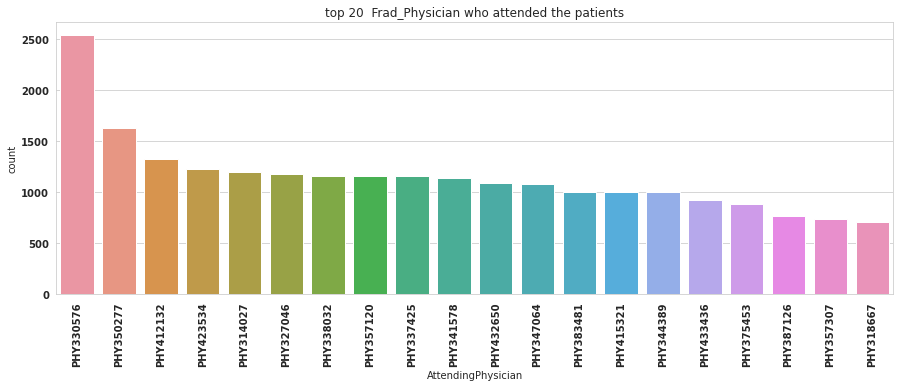

In [616]:
# top 20 AttendingPhysician who submitted maximum claims
plt.figure(figsize=(15,5))
plt.title("top 20  Frad_Physician who attended the patients")
sns.barplot(x="AttendingPhysician",y="count",data=Frad_Physician.iloc[:20])
plt.xticks(rotation=90)
plt.show()

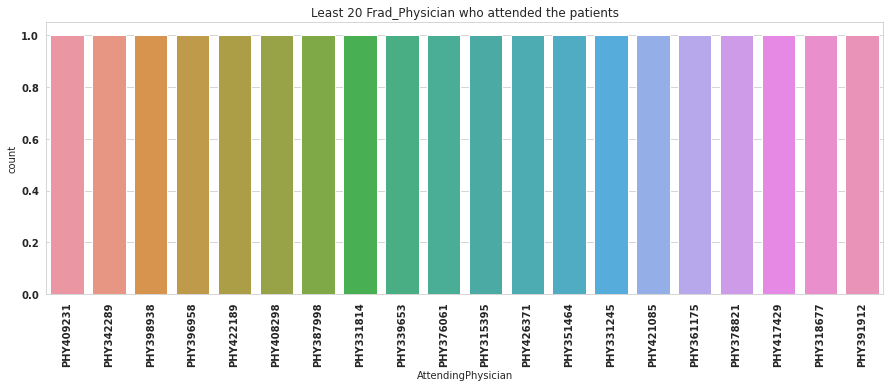

In [617]:
# Least 20 AttendingPhysician who attended mimimum patients
plt.figure(figsize=(15,5))
plt.title("Least 20 Frad_Physician who attended the patients")
sns.barplot(x="AttendingPhysician",y="count",data=Frad_Physician.iloc[-20:])
plt.xticks(rotation=90)
plt.show()

#### 5.3.b Attended Physician who are not involved in Fradulent

In [618]:
NonFrad_Physician=out_df[out_df.PotentialFraud == "No"]["AttendingPhysician"].value_counts().to_frame().reset_index()
NonFrad_Physician.columns=["AttendingPhysician","count"]
NonFrad_Physician.head()

,AttendingPhysician,count
0,PHY351121,1053
1,PHY375943,912
2,PHY432614,716
3,PHY326984,686
4,PHY362889,674


In [619]:
print("No of unique Non fraud physician who  atteded patients:: ",len(NonFrad_Physician.AttendingPhysician.unique()))

No of unique Non fraud physician who  atteded patients::  57617


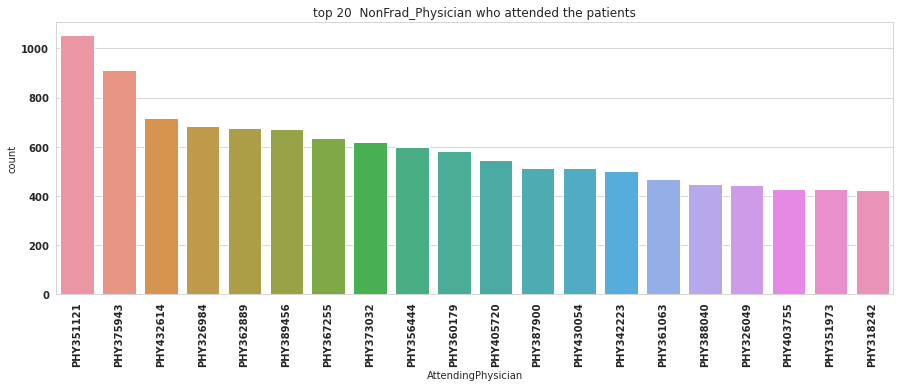

In [620]:
# top 20 AttendingPhysician who submitted maximum claims
plt.figure(figsize=(15,5))
plt.title("top 20  NonFrad_Physician who attended the patients")
sns.barplot(x="AttendingPhysician",y="count",data=NonFrad_Physician.iloc[:20])
plt.xticks(rotation=90)
plt.show()

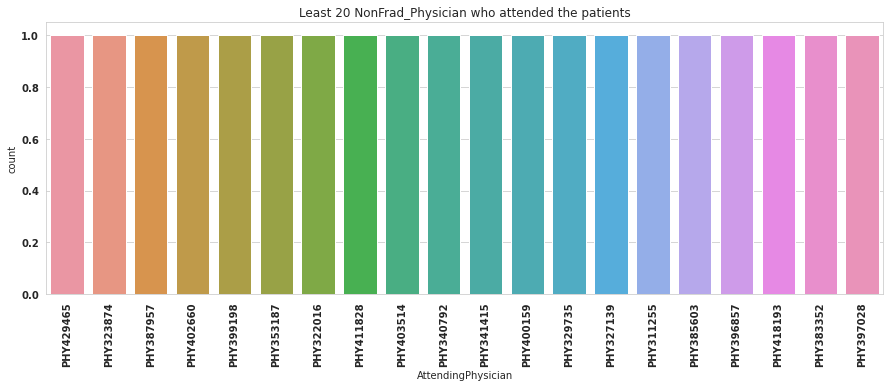

In [621]:
# Least 20 AttendingPhysician who attended mimimum patients
plt.figure(figsize=(15,5))
plt.title("Least 20 NonFrad_Physician who attended the patients")
sns.barplot(x="AttendingPhysician",y="count",data=NonFrad_Physician.iloc[-20:])
plt.xticks(rotation=90)
plt.show()

#### 5.4.c Common AttendingPhysician who also involved fradulent activity

In [622]:
common=Frad_Physician.merge(NonFrad_Physician,on="AttendingPhysician",how="inner")

In [623]:
print("No of provider who involved in both activity::",len(common))

No of provider who involved in both activity:: 1270


In [624]:
common.head()

,AttendingPhysician,count_x,count_y
0,PHY339530,563,6
1,PHY319816,217,2
2,PHY326637,209,2
3,PHY371562,203,4
4,PHY371865,170,2


In [625]:
common.tail()

,AttendingPhysician,count_x,count_y
1265,PHY379607,1,1
1266,PHY416980,1,1
1267,PHY333793,1,6
1268,PHY404272,1,2
1269,PHY391912,1,1


### 5.5 Inpatient data's OperatingPhysician analysis

#### 5.5.a OperatingPhysician who involved in Fradulent

In [627]:
Frad_Physician=inp_df[inp_df.PotentialFraud == "Yes"]["OperatingPhysician"].value_counts().to_frame().reset_index()
Frad_Physician.columns=["OperatingPhysician","count"]
Frad_Physician.head()

,OperatingPhysician,count
0,PHY429430,225
1,PHY341560,153
2,PHY411541,121
3,PHY352941,110
4,PHY314410,109


In [628]:
print("No of unique fraud physician who operated patients:: ",len(Frad_Physician.OperatingPhysician.unique()))

No of unique fraud physician who operated patients::  3074


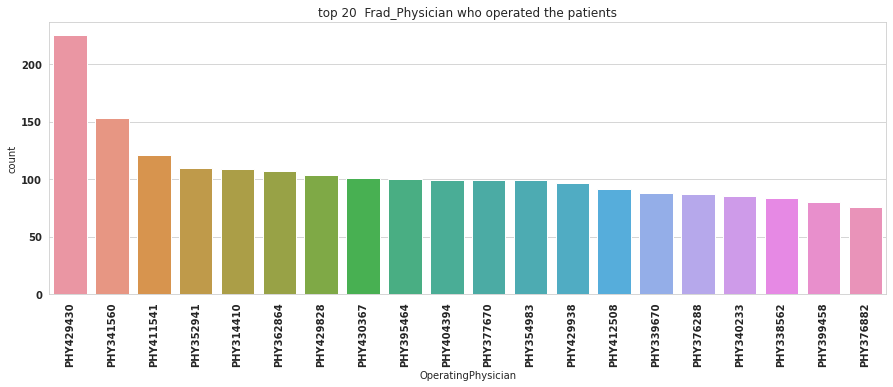

In [629]:
# top 20 AttendingPhysician who submitted maximum claims
plt.figure(figsize=(15,5))
plt.title("top 20  Frad_Physician who operated the patients")
sns.barplot(x="OperatingPhysician",y="count",data=Frad_Physician.iloc[:20])
plt.xticks(rotation=90)
plt.show()

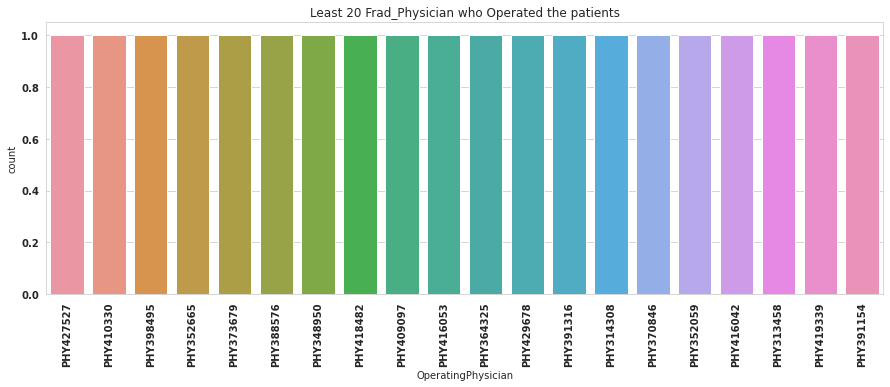

In [631]:
# Least 20 OperatingPhysician who attended mimimum patients
plt.figure(figsize=(15,5))
plt.title("Least 20 Frad_Physician who Operated the patients")
sns.barplot(x="OperatingPhysician",y="count",data=Frad_Physician.iloc[-20:])
plt.xticks(rotation=90)
plt.show()

#### 5.5.b OperatingPhysician who are not involved in Fradulent

In [632]:
NonFrad_Physician=inp_df[inp_df.PotentialFraud == "No"]["OperatingPhysician"].value_counts().to_frame().reset_index()
NonFrad_Physician.columns=["OperatingPhysician","count"]
NonFrad_Physician.head()

,OperatingPhysician,count
0,PHY428454,61
1,PHY382517,47
2,PHY394000,38
3,PHY407957,33
4,PHY424985,32


In [634]:
print("No of unique Non fraud physician who operated patients:: ",len(NonFrad_Physician.OperatingPhysician.unique()))

No of unique Non fraud physician who operated patients::  5249


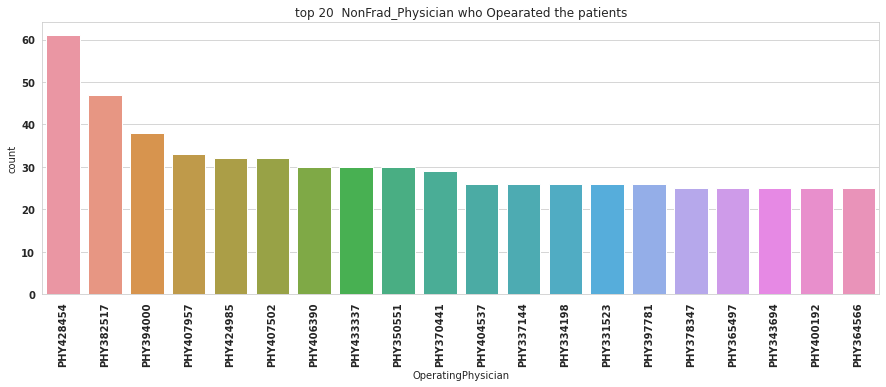

In [635]:
# top 20 AttendingPhysician who submitted maximum claims
plt.figure(figsize=(15,5))
plt.title("top 20  NonFrad_Physician who Opearated the patients")
sns.barplot(x="OperatingPhysician",y="count",data=NonFrad_Physician.iloc[:20])
plt.xticks(rotation=90)
plt.show()

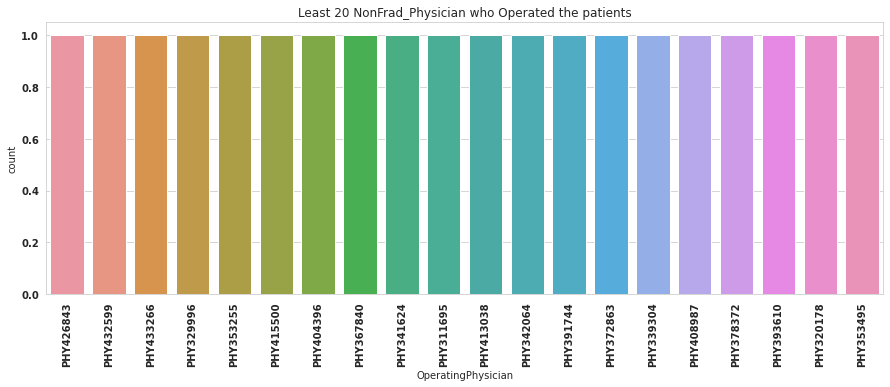

In [636]:
# Least 20 OperatingPhysician who attended mimimum patients
plt.figure(figsize=(15,5))
plt.title("Least 20 NonFrad_Physician who Operated the patients")
sns.barplot(x="OperatingPhysician",y="count",data=NonFrad_Physician.iloc[-20:])
plt.xticks(rotation=90)
plt.show()

#### 5.5.c Common OperatingPhysician who also involved fradulent activity

In [637]:
common=Frad_Physician.merge(NonFrad_Physician,on="OperatingPhysician",how="inner")

In [638]:
print("No of provider who involved in both activity::",len(common))

No of provider who involved in both activity:: 36


In [639]:
common.head()

,OperatingPhysician,count_x,count_y
0,PHY338503,36,2
1,PHY364094,14,2
2,PHY397423,10,1
3,PHY329638,10,1
4,PHY411117,8,1


In [640]:
common.tail()

,OperatingPhysician,count_x,count_y
31,PHY387324,1,1
32,PHY417698,1,1
33,PHY371192,1,1
34,PHY413895,1,1
35,PHY376262,1,1


### 5.6 Outpatient data's OperatingPhysician analysis with Target variable

#### 5.6.a OperatingPhysician who involved in Fradulent

In [642]:
Frad_Physician=out_df[out_df.PotentialFraud == "Yes"]["OperatingPhysician"].value_counts().to_frame().reset_index()
Frad_Physician.columns=["OperatingPhysician","count"]
Frad_Physician.head()

,OperatingPhysician,count
0,PHY330576,424
1,PHY424897,293
2,PHY314027,256
3,PHY423534,250
4,PHY357120,249


In [643]:
print("No of unique fraud physician who operated patients:: ",len(Frad_Physician.OperatingPhysician.unique()))

No of unique fraud physician who operated patients::  7166


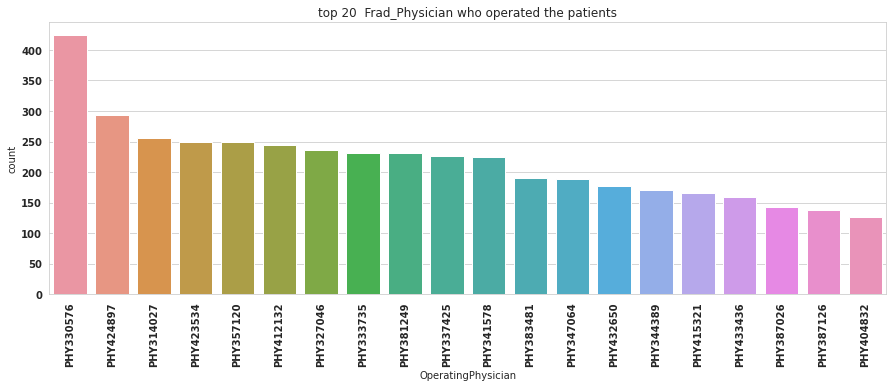

In [644]:
# top 20 AttendingPhysician who submitted maximum claims
plt.figure(figsize=(15,5))
plt.title("top 20  Frad_Physician who operated the patients")
sns.barplot(x="OperatingPhysician",y="count",data=Frad_Physician.iloc[:20])
plt.xticks(rotation=90)
plt.show()

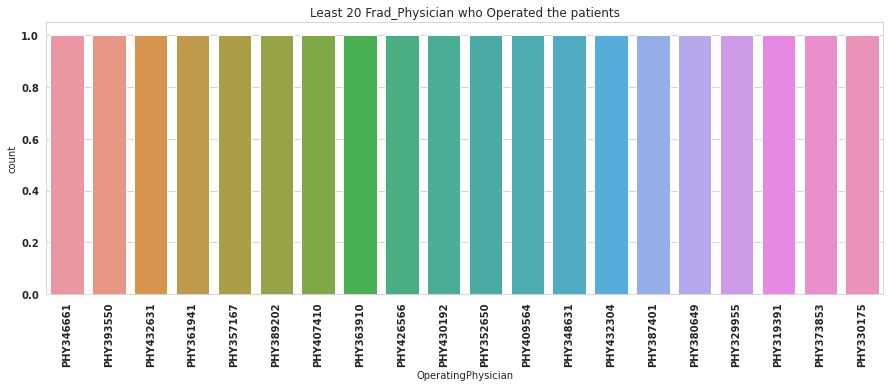

In [645]:
# Least 20 OperatingPhysician who attended mimimum patients
plt.figure(figsize=(15,5))
plt.title("Least 20 Frad_Physician who Operated the patients")
sns.barplot(x="OperatingPhysician",y="count",data=Frad_Physician.iloc[-20:])
plt.xticks(rotation=90)
plt.show()

#### 5.6.b OperatingPhysician who are not involved in Fradulent

In [646]:
NonFrad_Physician=out_df[out_df.PotentialFraud == "No"]["OperatingPhysician"].value_counts().to_frame().reset_index()
NonFrad_Physician.columns=["OperatingPhysician","count"]
NonFrad_Physician.head()

,OperatingPhysician,count
0,PHY387900,180
1,PHY351121,179
2,PHY375943,147
3,PHY367255,132
4,PHY432614,129


In [647]:
print("No of unique Non fraud physician who operated patients:: ",len(NonFrad_Physician.OperatingPhysician.unique()))

No of unique Non fraud physician who operated patients::  21594


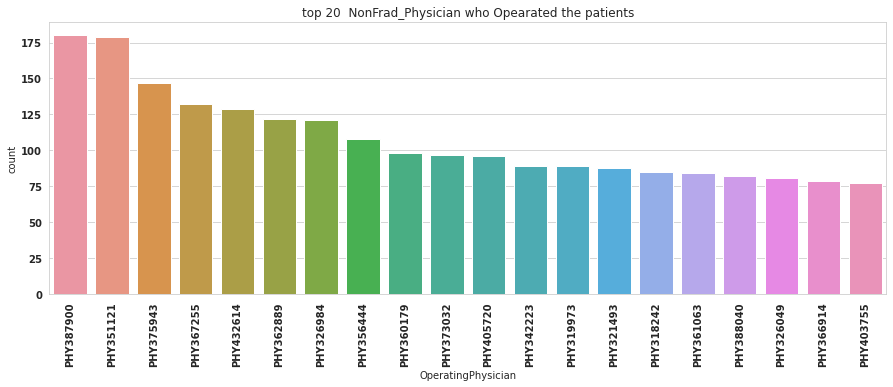

In [648]:
# top 20 AttendingPhysician who submitted maximum claims
plt.figure(figsize=(15,5))
plt.title("top 20  NonFrad_Physician who Opearated the patients")
sns.barplot(x="OperatingPhysician",y="count",data=NonFrad_Physician.iloc[:20])
plt.xticks(rotation=90)
plt.show()

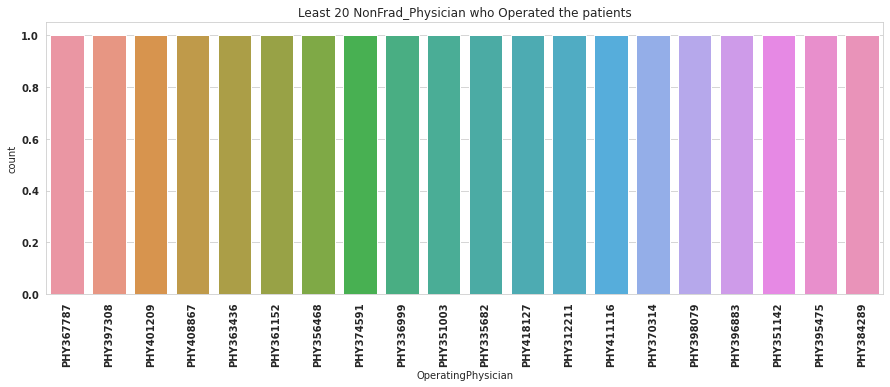

In [649]:
# Least 20 OperatingPhysician who attended mimimum patients
plt.figure(figsize=(15,5))
plt.title("Least 20 NonFrad_Physician who Operated the patients")
sns.barplot(x="OperatingPhysician",y="count",data=NonFrad_Physician.iloc[-20:])
plt.xticks(rotation=90)
plt.show()

#### 5.6.c Common OperatingPhysician who also involved fradulent activity

In [650]:
common=Frad_Physician.merge(NonFrad_Physician,on="OperatingPhysician",how="inner")

In [651]:
print("No of provider who involved in both activity::",len(common))

No of provider who involved in both activity:: 228


In [652]:
common.head()

,OperatingPhysician,count_x,count_y
0,PHY339530,103,1
1,PHY349818,42,1
2,PHY371562,33,1
3,PHY338690,24,1
4,PHY395758,19,2


In [653]:
common.tail()

,OperatingPhysician,count_x,count_y
223,PHY398872,1,1
224,PHY427572,1,1
225,PHY411605,1,4
226,PHY393215,1,1
227,PHY424113,1,2


### 5.7 Inpatient data's OtherPhysician column analysis

#### 5.7.a OtherPhysician who involved in Fradulent

In [654]:
Frad_Physician=inp_df[inp_df.PotentialFraud == "Yes"]["OtherPhysician"].value_counts().to_frame().reset_index()
Frad_Physician.columns=["OtherPhysician","count"]
Frad_Physician.head()

,OtherPhysician,count
0,PHY416093,81
1,PHY333406,38
2,PHY429929,30
3,PHY361563,29
4,PHY423728,29


In [657]:
print("No of unique other fraud physician who atteded patients:: ",len(Frad_Physician.OtherPhysician.unique()))

No of unique other fraud physician who atteded patients::  1086


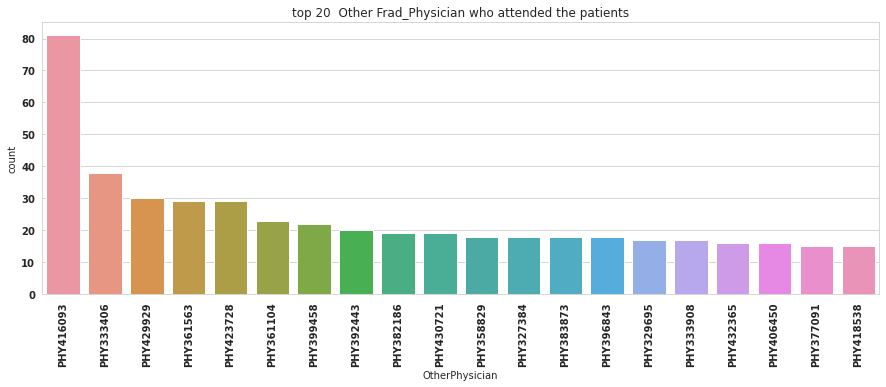

In [658]:
# top 20 AttendingPhysician who submitted maximum claims
plt.figure(figsize=(15,5))
plt.title("top 20  Other Frad_Physician who attended the patients")
sns.barplot(x="OtherPhysician",y="count",data=Frad_Physician.iloc[:20])
plt.xticks(rotation=90)
plt.show()

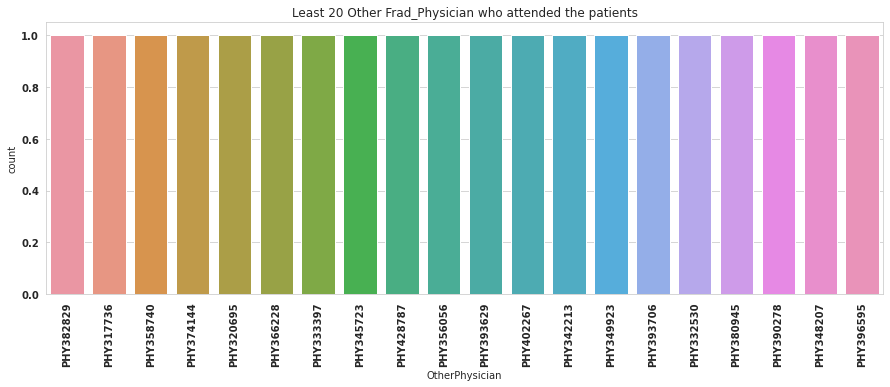

In [659]:
# Least 20 AttendingPhysician who attended mimimum patients
plt.figure(figsize=(15,5))
plt.title("Least 20 Other Frad_Physician who attended the patients")
sns.barplot(x="OtherPhysician",y="count",data=Frad_Physician.iloc[-20:])
plt.xticks(rotation=90)
plt.show()

#### 5.7.b OtherPhysician who are not involved in Fradulent

In [660]:
NonFrad_Physician=inp_df[inp_df.PotentialFraud == "No"]["OtherPhysician"].value_counts().to_frame().reset_index()
NonFrad_Physician.columns=["OtherPhysician","count"]
NonFrad_Physician.head()

,OtherPhysician,count
0,PHY328051,24
1,PHY404537,18
2,PHY352372,17
3,PHY406400,16
4,PHY378347,15


In [661]:
print("No of unique other Non fraud physician who atteded patients:: ",len(NonFrad_Physician.OtherPhysician.unique()))

No of unique other Non fraud physician who atteded patients::  1794


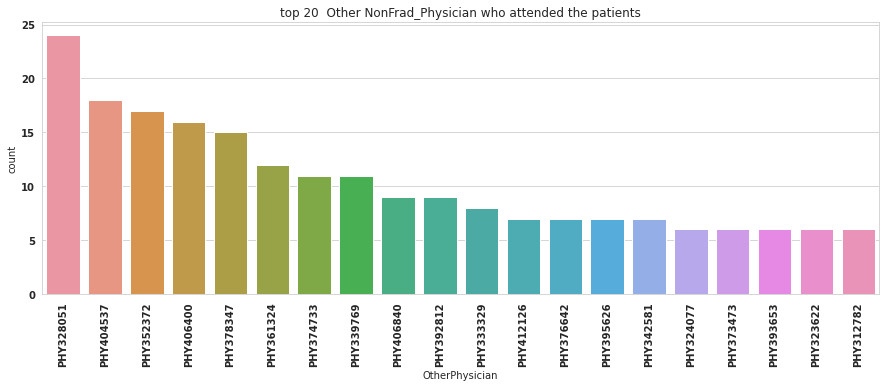

In [662]:
# top 20 AttendingPhysician who submitted maximum claims
plt.figure(figsize=(15,5))
plt.title("top 20  Other NonFrad_Physician who attended the patients")
sns.barplot(x="OtherPhysician",y="count",data=NonFrad_Physician.iloc[:20])
plt.xticks(rotation=90)
plt.show()

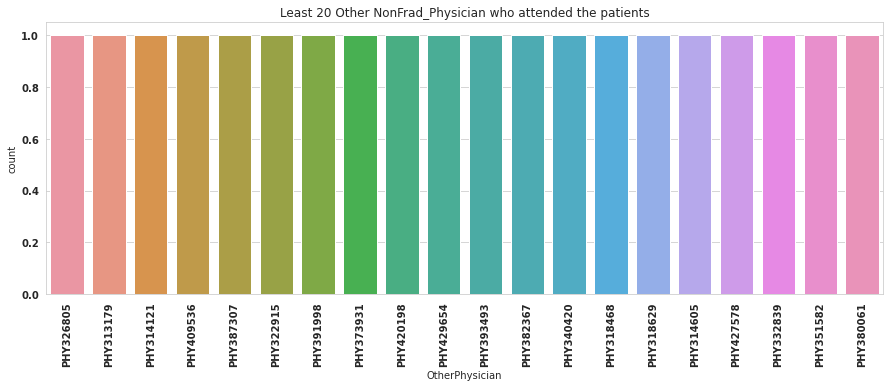

In [663]:
# Least 20 OtherPhysician who attended mimimum patients
plt.figure(figsize=(15,5))
plt.title("Least 20 Other NonFrad_Physician who attended the patients")
sns.barplot(x="OtherPhysician",y="count",data=NonFrad_Physician.iloc[-20:])
plt.xticks(rotation=90)
plt.show()

#### 5.7.c Common OtherPhysician who also involved fradulent activity

In [664]:
common=Frad_Physician.merge(NonFrad_Physician,on="OtherPhysician",how="inner")

In [665]:
print("No of provider who involved in both activity::",len(common))

No of provider who involved in both activity:: 3


In [666]:
common.head()

,OtherPhysician,count_x,count_y
0,PHY374344,4,1
1,PHY424921,3,2
2,PHY367511,1,1


### 5.8 Outpatient data's OtherPhysician analysis

#### 5.8.a OtherPhysician who involved in Fradulent

In [667]:
Frad_Physician=out_df[out_df.PotentialFraud == "Yes"]["OtherPhysician"].value_counts().to_frame().reset_index()
Frad_Physician.columns=["OtherPhysician","count"]
Frad_Physician.head()

,OtherPhysician,count
0,PHY412132,1247
1,PHY341578,1098
2,PHY338032,1070
3,PHY337425,1041
4,PHY347064,806


In [668]:
print("No of unique other fraud physician who atteded patients:: ",len(Frad_Physician.OtherPhysician.unique()))

No of unique other fraud physician who atteded patients::  10524


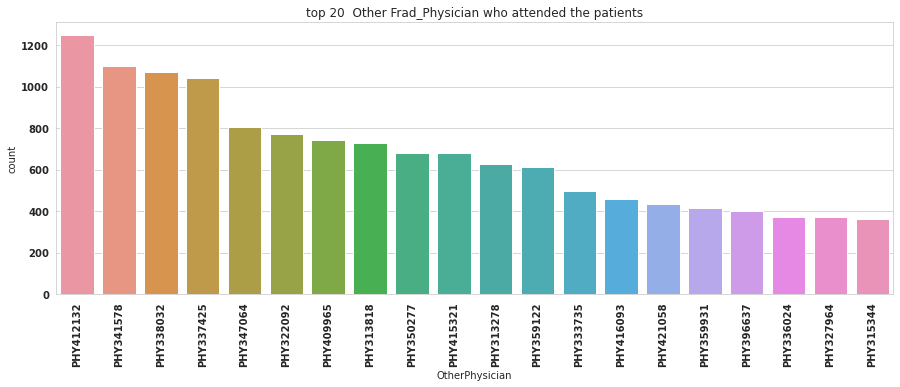

In [669]:
# top 20 AttendingPhysician who submitted maximum claims
plt.figure(figsize=(15,5))
plt.title("top 20  Other Frad_Physician who attended the patients")
sns.barplot(x="OtherPhysician",y="count",data=Frad_Physician.iloc[:20])
plt.xticks(rotation=90)
plt.show()

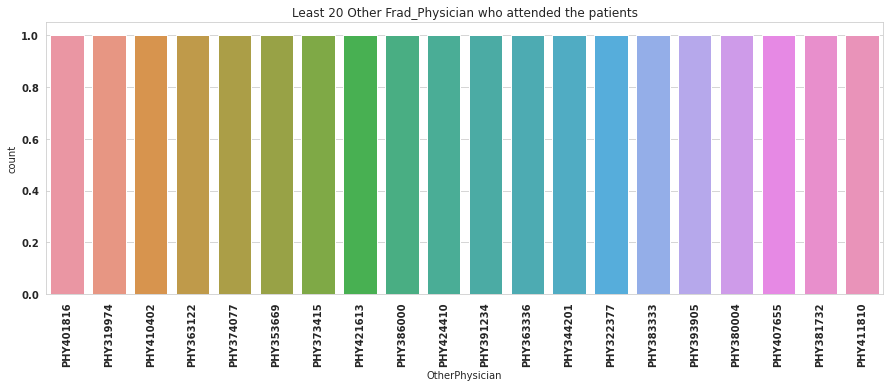

In [671]:
# Least 20 AttendingPhysician who attended mimimum patients
plt.figure(figsize=(15,5))
plt.title("Least 20 Other Frad_Physician who attended the patients")
sns.barplot(x="OtherPhysician",y="count",data=Frad_Physician.iloc[-20:])
plt.xticks(rotation=90)
plt.show()

#### 5.8.b OtherPhysician who are not involved in Fradulent

In [672]:
NonFrad_Physician=out_df[out_df.PotentialFraud == "No"]["OtherPhysician"].value_counts().to_frame().reset_index()
NonFrad_Physician.columns=["OtherPhysician","count"]
NonFrad_Physician.head()

,OtherPhysician,count
0,PHY422235,369
1,PHY387900,351
2,PHY375943,328
3,PHY411722,313
4,PHY363309,305


In [673]:
print("No of unique other Non fraud physician who atteded patients:: ",len(NonFrad_Physician.OtherPhysician.unique()))

No of unique other Non fraud physician who atteded patients::  34368


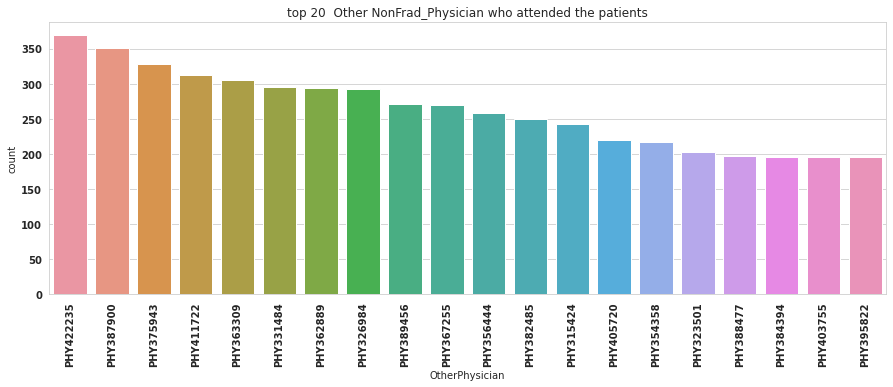

In [674]:
# top 20 AttendingPhysician who submitted maximum claims
plt.figure(figsize=(15,5))
plt.title("top 20  Other NonFrad_Physician who attended the patients")
sns.barplot(x="OtherPhysician",y="count",data=NonFrad_Physician.iloc[:20])
plt.xticks(rotation=90)
plt.show()

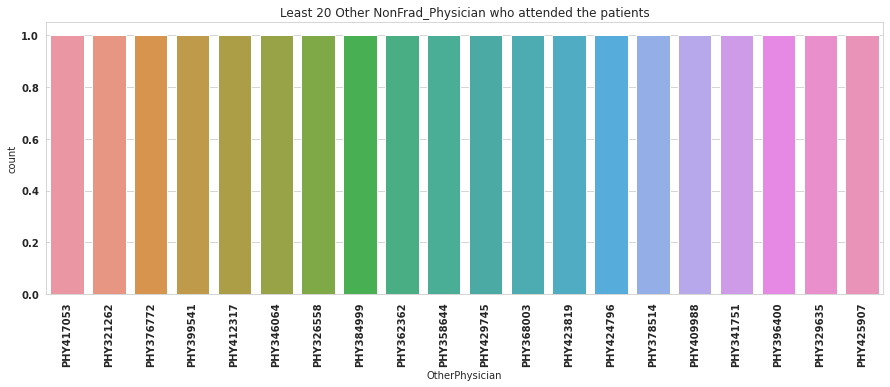

In [675]:
# Least 20 OtherPhysician who attended mimimum patients
plt.figure(figsize=(15,5))
plt.title("Least 20 Other NonFrad_Physician who attended the patients")
sns.barplot(x="OtherPhysician",y="count",data=NonFrad_Physician.iloc[-20:])
plt.xticks(rotation=90)
plt.show()

#### 5.8.c Common OtherPhysician who also involved fradulent activity

In [676]:
common=Frad_Physician.merge(NonFrad_Physician,on="OtherPhysician",how="inner")

In [677]:
print("No of provider who involved in both activity::",len(common))

No of provider who involved in both activity:: 504


In [678]:
common.head()

,OtherPhysician,count_x,count_y
0,PHY416093,457,3
1,PHY379217,87,1
2,PHY389434,70,1
3,PHY350220,61,1
4,PHY318539,60,43


### 5.9 Inpatient data's ClmAdmitDiagnosisCode analysis

#### 5.9.a  ClmAdmitDiagnosisCode analysis which used for Fradulent

In [688]:
Fraud_DiagnosisCode=inp_df[inp_df.PotentialFraud == "Yes"]["ClmAdmitDiagnosisCode"].value_counts().to_frame().reset_index()
Fraud_DiagnosisCode.columns=["ClmAdmitDiagnosisCode","count"]
Fraud_DiagnosisCode.head()

,ClmAdmitDiagnosisCode,count
0,78650,987
1,78605,944
2,486,837
3,4280,648
4,V5789,569


In [689]:
print("No of unique ClmAdmitDiagnosisCode which used for Fradulent Activity:: ",len(Fraud_DiagnosisCode.ClmAdmitDiagnosisCode.unique()))

No of unique ClmAdmitDiagnosisCode which used for Fradulent Activity::  1578


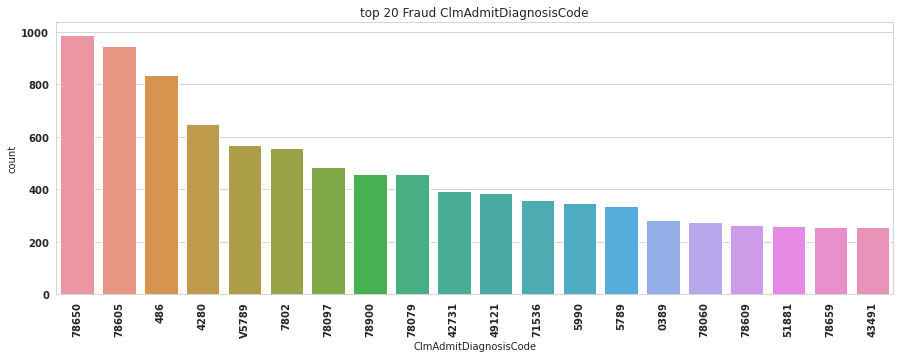

In [690]:
# top 20 Fraud ClmAdmitDiagnosisCode
plt.figure(figsize=(15,5))
plt.title("top 20 Fraud ClmAdmitDiagnosisCode")
sns.barplot(x="ClmAdmitDiagnosisCode",y="count",data=Fraud_DiagnosisCode.iloc[:20])
plt.xticks(rotation=90)
plt.show()

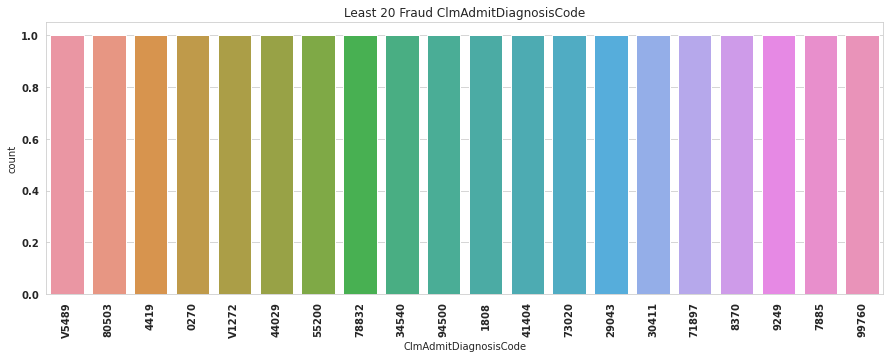

In [682]:
# Least 20 Fraud ClmAdmitDiagnosisCode
plt.figure(figsize=(15,5))
plt.title("Least 20 Fraud ClmAdmitDiagnosisCode")
sns.barplot(x="ClmAdmitDiagnosisCode",y="count",data=Fraud_DiagnosisCode.iloc[-20:])
plt.xticks(rotation=90)
plt.show()

#### 5.9.b  ClmAdmitDiagnosisCode analysis which is not used for Fradulent

In [691]:
NonFraud_DiagnosisCode=inp_df[inp_df.PotentialFraud == "No"]["ClmAdmitDiagnosisCode"].value_counts().to_frame().reset_index()
NonFraud_DiagnosisCode.columns=["ClmAdmitDiagnosisCode","count"]
NonFraud_DiagnosisCode.head()

,ClmAdmitDiagnosisCode,count
0,78650,744
1,78605,725
2,486,601
3,7802,463
4,4280,458


In [692]:
print("No of unique ClmAdmitDiagnosisCode which used for Fradulent Activity:: ",len(NonFraud_DiagnosisCode.ClmAdmitDiagnosisCode.unique()))

No of unique ClmAdmitDiagnosisCode which used for Fradulent Activity::  1385


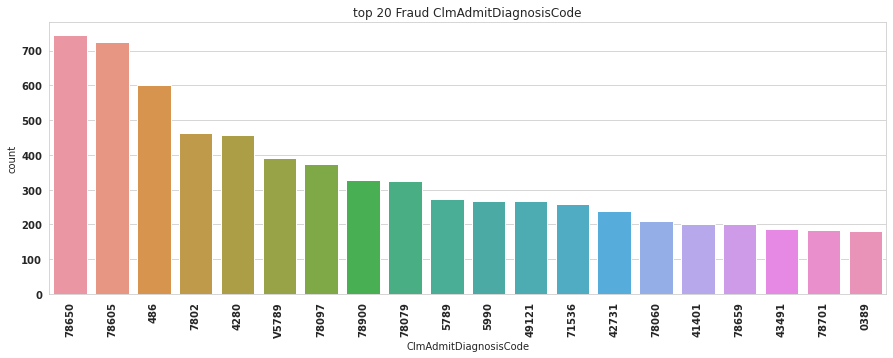

In [693]:
# top 20 Fraud ClmAdmitDiagnosisCode
plt.figure(figsize=(15,5))
plt.title("top 20 Fraud ClmAdmitDiagnosisCode")
sns.barplot(x="ClmAdmitDiagnosisCode",y="count",data=NonFraud_DiagnosisCode.iloc[:20])
plt.xticks(rotation=90)
plt.show()

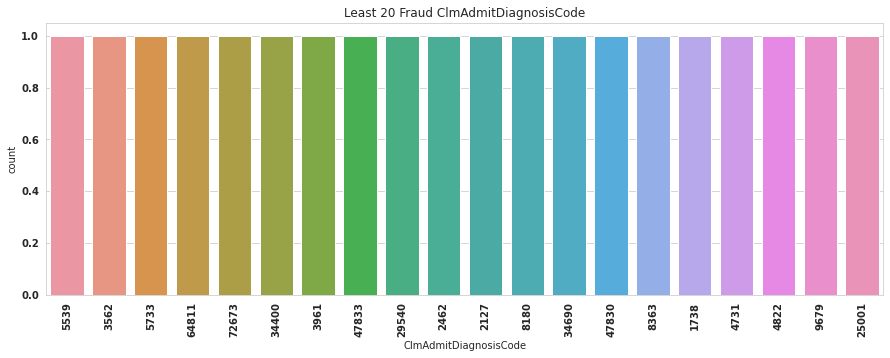

In [695]:
# Least 20 Fraud ClmAdmitDiagnosisCode
plt.figure(figsize=(15,5))
plt.title("Least 20 Fraud ClmAdmitDiagnosisCode")
sns.barplot(x="ClmAdmitDiagnosisCode",y="count",data=NonFraud_DiagnosisCode.iloc[-20:])
plt.xticks(rotation=90)
plt.show()

#### 5.9.c Common Dignosis code which used for both activity

In [696]:
common=Fraud_DiagnosisCode.merge(NonFraud_DiagnosisCode,on="ClmAdmitDiagnosisCode",how="inner")

In [697]:
print("No of provider who involved in both activity::",len(common))

No of provider who involved in both activity:: 1035


In [698]:
common.head()

,ClmAdmitDiagnosisCode,count_x,count_y
0,78650,987,744
1,78605,944,725
2,486,837,601
3,4280,648,458
4,V5789,569,391


In [699]:
common.tail()

,ClmAdmitDiagnosisCode,count_x,count_y
1030,44029,1,2
1031,41404,1,1
1032,73020,1,2
1033,29043,1,1
1034,9249,1,2


### 5.10 Outpatient data's ClmAdmitDiagnosisCode analysis

#### 5.10.a  ClmAdmitDiagnosisCode analysis which used for Fradulent

In [704]:
Fraud_DiagnosisCode=out_df[out_df.PotentialFraud == "Yes"]["ClmAdmitDiagnosisCode"].value_counts().to_frame().reset_index()
Fraud_DiagnosisCode.columns=["ClmAdmitDiagnosisCode","count"]
Fraud_DiagnosisCode.head()

,ClmAdmitDiagnosisCode,count
0,V7612,1441
1,42731,1136
2,4019,947
3,25000,862
4,V5883,691


In [705]:
print("No of unique ClmAdmitDiagnosisCode which used for Fradulent Activity:: ",len(Fraud_DiagnosisCode.ClmAdmitDiagnosisCode.unique()))

No of unique ClmAdmitDiagnosisCode which used for Fradulent Activity::  2681


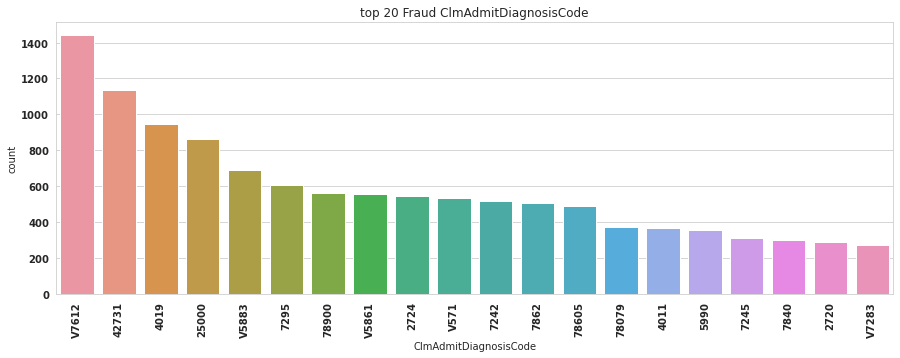

In [706]:
# top 20 Fraud ClmAdmitDiagnosisCode
plt.figure(figsize=(15,5))
plt.title("top 20 Fraud ClmAdmitDiagnosisCode")
sns.barplot(x="ClmAdmitDiagnosisCode",y="count",data=Fraud_DiagnosisCode.iloc[:20])
plt.xticks(rotation=90)
plt.show()

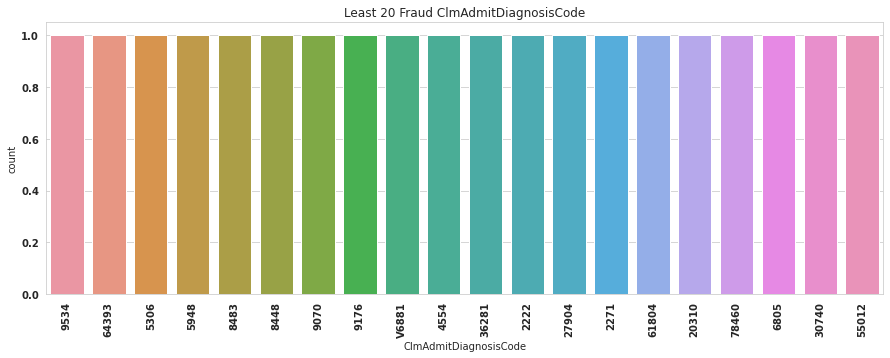

In [707]:
# Least 20 Fraud ClmAdmitDiagnosisCode
plt.figure(figsize=(15,5))
plt.title("Least 20 Fraud ClmAdmitDiagnosisCode")
sns.barplot(x="ClmAdmitDiagnosisCode",y="count",data=Fraud_DiagnosisCode.iloc[-20:])
plt.xticks(rotation=90)
plt.show()

#### 5.10.b  ClmAdmitDiagnosisCode analysis which is not used for Fradulent

In [708]:
NonFraud_DiagnosisCode=out_df[out_df.PotentialFraud == "No"]["ClmAdmitDiagnosisCode"].value_counts().to_frame().reset_index()
NonFraud_DiagnosisCode.columns=["ClmAdmitDiagnosisCode","count"]
NonFraud_DiagnosisCode.head()

,ClmAdmitDiagnosisCode,count
0,V7612,2633
1,42731,1865
2,4019,1680
3,25000,1484
4,V5883,1180


In [709]:
print("No of unique ClmAdmitDiagnosisCode which used for Fradulent Activity:: ",len(NonFraud_DiagnosisCode.ClmAdmitDiagnosisCode.unique()))

No of unique ClmAdmitDiagnosisCode which used for Fradulent Activity::  3181


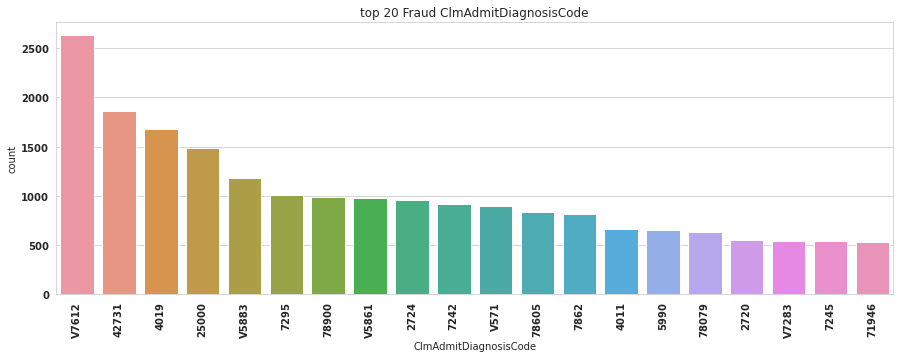

In [710]:
# top 20 Fraud ClmAdmitDiagnosisCode
plt.figure(figsize=(15,5))
plt.title("top 20 Fraud ClmAdmitDiagnosisCode")
sns.barplot(x="ClmAdmitDiagnosisCode",y="count",data=NonFraud_DiagnosisCode.iloc[:20])
plt.xticks(rotation=90)
plt.show()

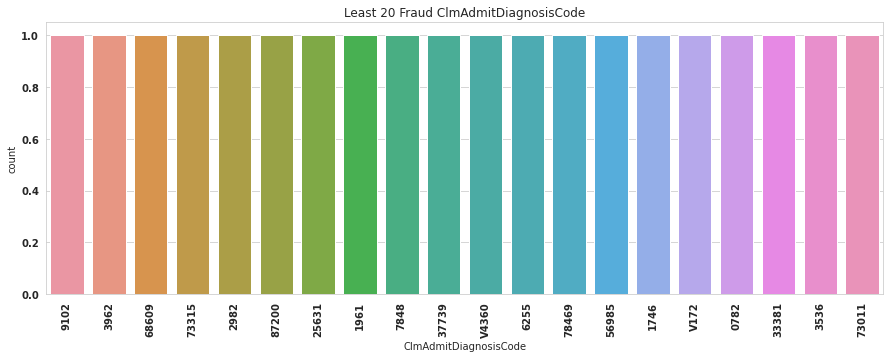

In [711]:
# Least 20 Fraud ClmAdmitDiagnosisCode
plt.figure(figsize=(15,5))
plt.title("Least 20 Fraud ClmAdmitDiagnosisCode")
sns.barplot(x="ClmAdmitDiagnosisCode",y="count",data=NonFraud_DiagnosisCode.iloc[-20:])
plt.xticks(rotation=90)
plt.show()

#### 5.10.c Common Dignosis code which used for both activity

In [713]:
common=Fraud_DiagnosisCode.merge(NonFraud_DiagnosisCode,on="ClmAdmitDiagnosisCode",how="inner")

In [714]:
print("No of provider who involved in both activity::",len(common))

No of provider who involved in both activity:: 2147


In [715]:
common.head()

,ClmAdmitDiagnosisCode,count_x,count_y
0,V7612,1441,2633
1,42731,1136,1865
2,4019,947,1680
3,25000,862,1484
4,V5883,691,1180


In [716]:
common.tail()

,ClmAdmitDiagnosisCode,count_x,count_y
2142,8448,1,8
2143,9176,1,2
2144,36281,1,1
2145,2271,1,4
2146,61804,1,1


### 5.11 Inpatient data's DiagnosisGroupCode analysis

#### 5.11.a  DiagnosisGroupCode analysis which used for Fradulent

In [717]:
Fraud_DiagnosisGrpCode=inp_df[inp_df.PotentialFraud == "Yes"]["DiagnosisGroupCode"].value_counts().to_frame().reset_index()
Fraud_DiagnosisGrpCode.columns=["DiagnosisGroupCode","count"]
Fraud_DiagnosisGrpCode.head()

,DiagnosisGroupCode,count
0,882,111
1,166,107
2,186,102
3,192,98
4,884,97


In [718]:
print("No of unique DiagnosisGroupCode which used for Fradulent Activity:: ",len(Fraud_DiagnosisGrpCode.DiagnosisGroupCode.unique()))

No of unique DiagnosisGroupCode which used for Fradulent Activity::  733


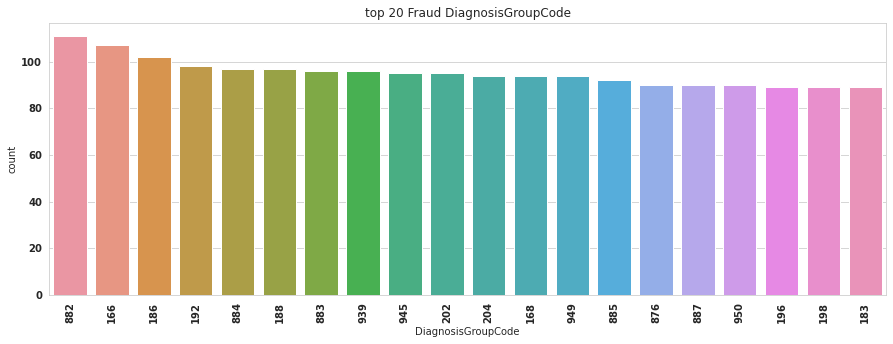

In [719]:
# top 20 Fraud ClmAdmitDiagnosisCode
plt.figure(figsize=(15,5))
plt.title("top 20 Fraud DiagnosisGroupCode")
sns.barplot(x="DiagnosisGroupCode",y="count",data=Fraud_DiagnosisGrpCode.iloc[:20])
plt.xticks(rotation=90)
plt.show()

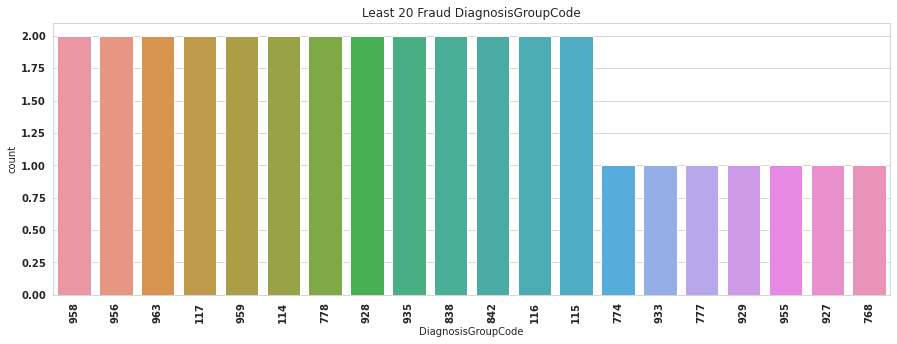

In [720]:
# Least 20 Fraud ClmAdmitDiagnosisCode
plt.figure(figsize=(15,5))
plt.title("Least 20 Fraud DiagnosisGroupCode")
sns.barplot(x="DiagnosisGroupCode",y="count",data=Fraud_DiagnosisGrpCode.iloc[-20:])
plt.xticks(rotation=90)
plt.show()

#### 5.11.b  DiagnosisGroupCode analysis which is not used for Fradulent

In [721]:
NonFraud_DiagnosisGrpCode=inp_df[inp_df.PotentialFraud == "No"]["DiagnosisGroupCode"].value_counts().to_frame().reset_index()
NonFraud_DiagnosisGrpCode.columns=["DiagnosisGroupCode","count"]
NonFraud_DiagnosisGrpCode.head()

,DiagnosisGroupCode,count
0,884,77
1,167,76
2,183,76
3,208,75
4,940,70


In [723]:
print("No of unique DiagnosisGroupCode which used for Fradulent Activity:: ",len(NonFraud_DiagnosisGrpCode.DiagnosisGroupCode.unique()))

No of unique DiagnosisGroupCode which used for Fradulent Activity::  726


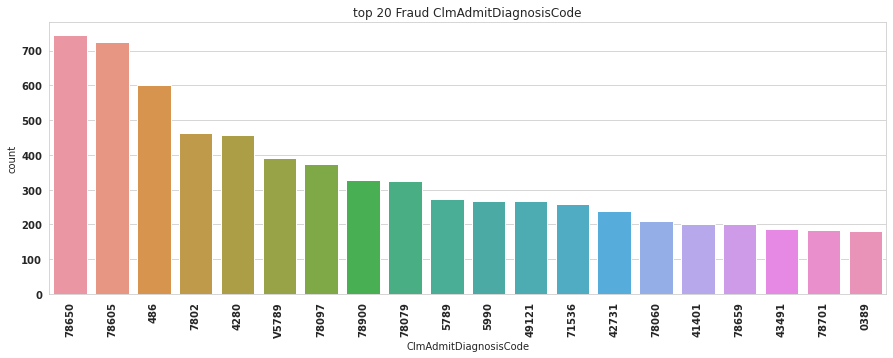

In [693]:
# top 20 Fraud ClmAdmitDiagnosisCode
plt.figure(figsize=(15,5))
plt.title("top 20 Fraud DiagnosisGroupCode")
sns.barplot(x="DiagnosisGroupCode",y="count",data=NonFraud_DiagnosisGrpCode.iloc[:20])
plt.xticks(rotation=90)
plt.show()

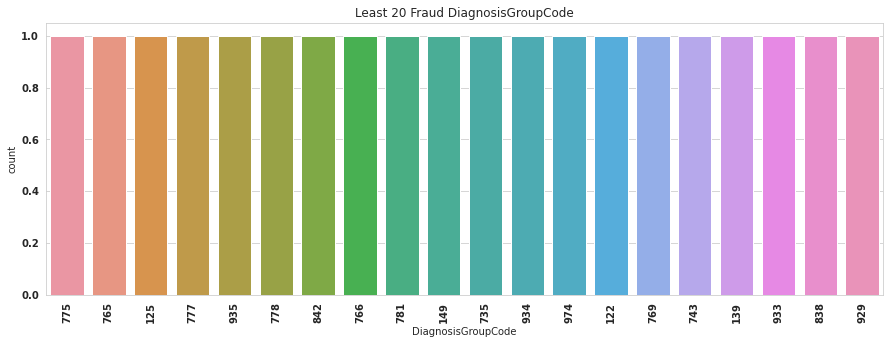

In [724]:
# Least 20 Fraud DiagnosisGroupCode
plt.figure(figsize=(15,5))
plt.title("Least 20 Fraud DiagnosisGroupCode")
sns.barplot(x="DiagnosisGroupCode",y="count",data=NonFraud_DiagnosisGrpCode.iloc[-20:])
plt.xticks(rotation=90)
plt.show()

#### 5.11.c Common DiagnosisGroupCodee which used for both activity

In [727]:
common=Fraud_DiagnosisGrpCode.merge(NonFraud_DiagnosisGrpCode,on="DiagnosisGroupCode",how="inner")

In [728]:
print("No of provider who involved in both activity::",len(common))

No of provider who involved in both activity:: 723


In [729]:
common.head()

,DiagnosisGroupCode,count_x,count_y
0,882,111,68
1,166,107,61
2,186,102,44
3,192,98,52
4,884,97,77


In [730]:
common.tail()

,DiagnosisGroupCode,count_x,count_y
718,842,2,1
719,774,1,2
720,933,1,1
721,777,1,1
722,929,1,1


### 5.12 Inpatient data's combined ClmDiagnosisCode analysis

#### 5.12.a combined ClmDiagnosisCode

In [732]:
fradulent_clmDiagnosisCode=inp_df[inp_df.PotentialFraud=="Yes"]

In [733]:
FradDiagnoscode=pd.DataFrame(columns=["ClmDiagnosisCode"])
FradDiagnoscode["ClmDiagnosisCode"]=pd.concat([fradulent_clmDiagnosisCode['ClmDiagnosisCode_1'],fradulent_clmDiagnosisCode[ 'ClmDiagnosisCode_2'],
                                      fradulent_clmDiagnosisCode['ClmDiagnosisCode_3'],fradulent_clmDiagnosisCode['ClmDiagnosisCode_4'], 
                                      fradulent_clmDiagnosisCode['ClmDiagnosisCode_5'], fradulent_clmDiagnosisCode['ClmDiagnosisCode_6'],
                                      fradulent_clmDiagnosisCode['ClmDiagnosisCode_7'],fradulent_clmDiagnosisCode[ 'ClmDiagnosisCode_8'], 
                                      fradulent_clmDiagnosisCode['ClmDiagnosisCode_9'],fradulent_clmDiagnosisCode['ClmDiagnosisCode_10']], axis=0, sort=True).dropna()

In [735]:
print("No of unique Fraud Claim DiagnosisCode:: ",len(FradDiagnoscode.ClmDiagnosisCode.unique()))

No of unique Fraud Claim DiagnosisCode::  4167


In [736]:
FraudClmDiagnosisCode=FradDiagnoscode.ClmDiagnosisCode.value_counts().to_frame().reset_index()
FraudClmDiagnosisCode.columns=["ClmDiagnosisCode","count"]
FraudClmDiagnosisCode.head()

,ClmDiagnosisCode,count
0,4019,8116
1,25000,4248
2,2724,4245
3,41401,3744
4,4280,3585


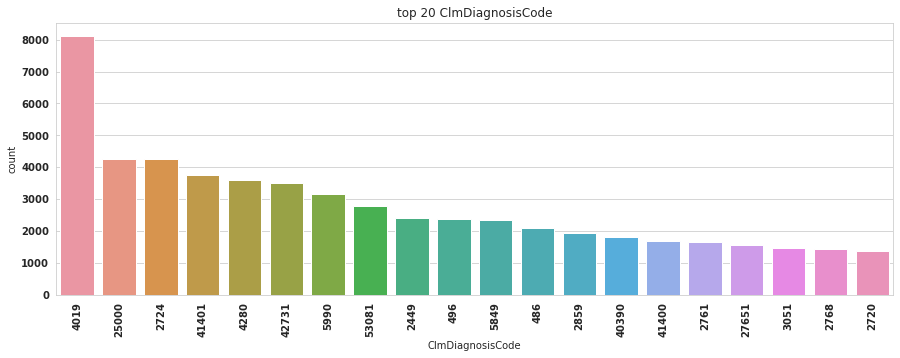

In [737]:
# top 20 ClmDiagnosisCode
plt.figure(figsize=(15,5))
plt.title("top 20 ClmDiagnosisCode")
sns.barplot(x="ClmDiagnosisCode",y="count",data=FraudClmDiagnosisCode.iloc[:20])
plt.xticks(rotation=90)
plt.show()

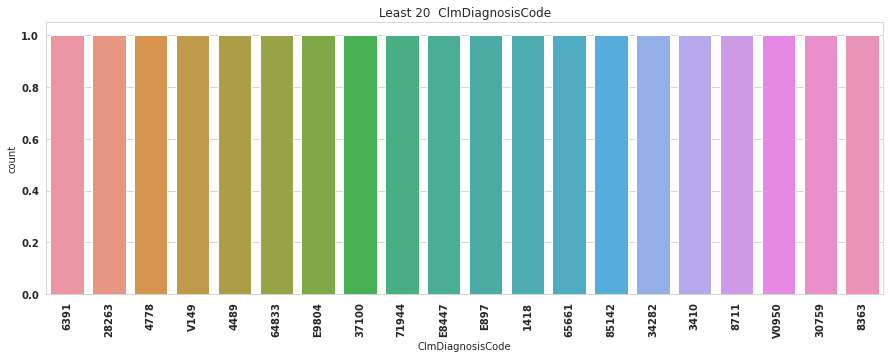

In [738]:
# Least 20 ClmAdmitDiagnosisCode
plt.figure(figsize=(15,5))
plt.title("Least 20  ClmDiagnosisCode")
sns.barplot(x="ClmDiagnosisCode",y="count",data=FraudClmDiagnosisCode.iloc[-20:])
plt.xticks(rotation=90)
plt.show()

#### 5.12.b combined ClmDiagnosisCode for Legitmate class

In [740]:
Nonfrad_clmDiagnosisCode=inp_df[inp_df.PotentialFraud=="No"]

In [743]:
NonFradDiagnoscode=pd.DataFrame(columns=["ClmDiagnosisCode"])
NonFradDiagnoscode["ClmDiagnosisCode"]=pd.concat([Nonfrad_clmDiagnosisCode['ClmDiagnosisCode_1'],Nonfrad_clmDiagnosisCode[ 'ClmDiagnosisCode_2'],
                                      Nonfrad_clmDiagnosisCode['ClmDiagnosisCode_3'],Nonfrad_clmDiagnosisCode['ClmDiagnosisCode_4'], 
                                      Nonfrad_clmDiagnosisCode['ClmDiagnosisCode_5'], Nonfrad_clmDiagnosisCode['ClmDiagnosisCode_6'],
                                      Nonfrad_clmDiagnosisCode['ClmDiagnosisCode_7'],Nonfrad_clmDiagnosisCode[ 'ClmDiagnosisCode_8'], 
                                      Nonfrad_clmDiagnosisCode['ClmDiagnosisCode_9'],Nonfrad_clmDiagnosisCode['ClmDiagnosisCode_10']], axis=0, sort=True).dropna()

In [744]:
print("No of unique Fraud Claim DiagnosisCode:: ",len(NonFradDiagnoscode.ClmDiagnosisCode.unique()))

No of unique Fraud Claim DiagnosisCode::  3791


In [745]:
NonFraudClmDiagnosisCode=NonFradDiagnoscode.ClmDiagnosisCode.value_counts().to_frame().reset_index()
NonFraudClmDiagnosisCode.columns=["ClmDiagnosisCode","count"]
NonFraudClmDiagnosisCode.head()

,ClmDiagnosisCode,count
0,4019,6037
1,2724,3095
2,25000,3086
3,41401,2698
4,4280,2605


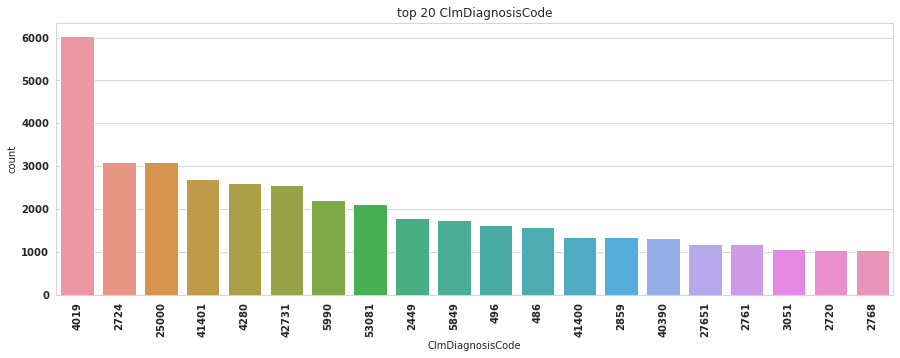

In [746]:
# top 20 ClmDiagnosisCode
plt.figure(figsize=(15,5))
plt.title("top 20 ClmDiagnosisCode")
sns.barplot(x="ClmDiagnosisCode",y="count",data=NonFraudClmDiagnosisCode.iloc[:20])
plt.xticks(rotation=90)
plt.show()

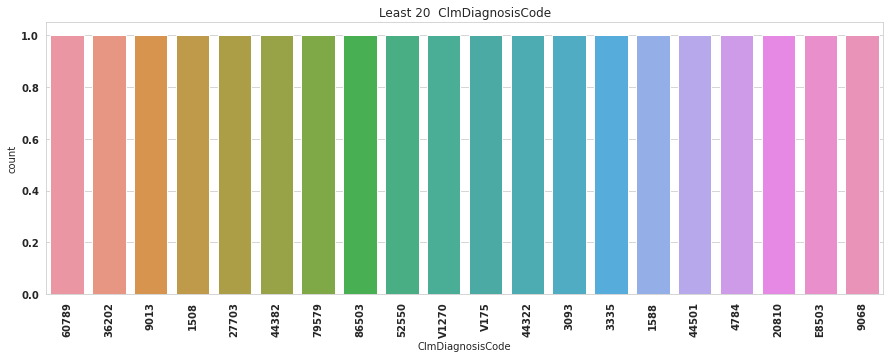

In [747]:
# Least 20 ClmAdmitDiagnosisCode
plt.figure(figsize=(15,5))
plt.title("Least 20  ClmDiagnosisCode")
sns.barplot(x="ClmDiagnosisCode",y="count",data=NonFraudClmDiagnosisCode.iloc[-20:])
plt.xticks(rotation=90)
plt.show()

#### 5.12.c Common Diagnosis code used in both activity (Fradulent and Non Fradulent) 

In [748]:
common=FraudClmDiagnosisCode.merge(NonFraudClmDiagnosisCode,on="ClmDiagnosisCode",how="inner")

In [749]:
print("No of provider who involved in both activity::",len(common))

No of provider who involved in both activity:: 3242


In [750]:
common.head()

,ClmDiagnosisCode,count_x,count_y
0,4019,8116,6037
1,25000,4248,3086
2,2724,4245,3095
3,41401,3744,2698
4,4280,3585,2605


### 5.13 Outpatient data's ClmDiagnosisCode analysis

#### 5.13.a combined ClmDiagnosisCode

In [751]:
fradulent_clmDiagnosisCode=out_df[out_df.PotentialFraud=="Yes"]

In [752]:
FradDiagnoscode=pd.DataFrame(columns=["ClmDiagnosisCode"])
FradDiagnoscode["ClmDiagnosisCode"]=pd.concat([fradulent_clmDiagnosisCode['ClmDiagnosisCode_1'],fradulent_clmDiagnosisCode[ 'ClmDiagnosisCode_2'],
                                      fradulent_clmDiagnosisCode['ClmDiagnosisCode_3'],fradulent_clmDiagnosisCode['ClmDiagnosisCode_4'], 
                                      fradulent_clmDiagnosisCode['ClmDiagnosisCode_5'], fradulent_clmDiagnosisCode['ClmDiagnosisCode_6'],
                                      fradulent_clmDiagnosisCode['ClmDiagnosisCode_7'],fradulent_clmDiagnosisCode[ 'ClmDiagnosisCode_8'], 
                                      fradulent_clmDiagnosisCode['ClmDiagnosisCode_9'],fradulent_clmDiagnosisCode['ClmDiagnosisCode_10']], axis=0, sort=True).dropna()

In [753]:
print("No of unique Fraud Claim DiagnosisCode:: ",len(FradDiagnoscode.ClmDiagnosisCode.unique()))

No of unique Fraud Claim DiagnosisCode::  9523


In [754]:
FraudClmDiagnosisCode=FradDiagnoscode.ClmDiagnosisCode.value_counts().to_frame().reset_index()
FraudClmDiagnosisCode.columns=["ClmDiagnosisCode","count"]
FraudClmDiagnosisCode.head()

,ClmDiagnosisCode,count
0,4019,22913
1,25000,10839
2,2724,10445
3,V5869,8809
4,4011,8512


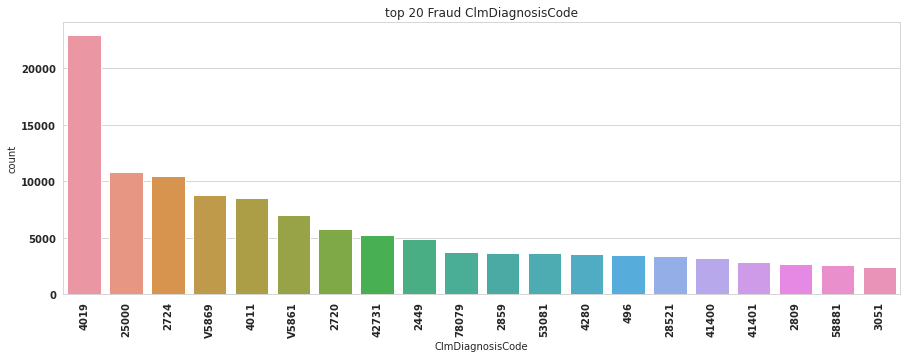

In [756]:
# top 20 Fraud ClmDiagnosisCode
plt.figure(figsize=(15,5))
plt.title("top 20 Fraud ClmDiagnosisCode")
sns.barplot(x="ClmDiagnosisCode",y="count",data=FraudClmDiagnosisCode.iloc[:20])
plt.xticks(rotation=90)
plt.show()

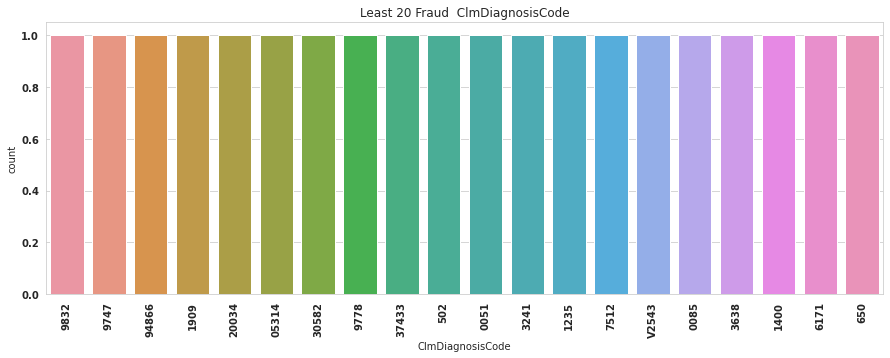

In [757]:
# Least 20 ClmAdmitDiagnosisCode
plt.figure(figsize=(15,5))
plt.title("Least 20 Fraud  ClmDiagnosisCode")
sns.barplot(x="ClmDiagnosisCode",y="count",data=FraudClmDiagnosisCode.iloc[-20:])
plt.xticks(rotation=90)
plt.show()

#### 5.13.b combined ClmDiagnosisCode for Legitmate class

In [758]:
Nonfrad_clmDiagnosisCode=inp_df[inp_df.PotentialFraud=="No"]

In [759]:
NonFradDiagnoscode=pd.DataFrame(columns=["ClmDiagnosisCode"])
NonFradDiagnoscode["ClmDiagnosisCode"]=pd.concat([Nonfrad_clmDiagnosisCode['ClmDiagnosisCode_1'],Nonfrad_clmDiagnosisCode[ 'ClmDiagnosisCode_2'],
                                      Nonfrad_clmDiagnosisCode['ClmDiagnosisCode_3'],Nonfrad_clmDiagnosisCode['ClmDiagnosisCode_4'], 
                                      Nonfrad_clmDiagnosisCode['ClmDiagnosisCode_5'], Nonfrad_clmDiagnosisCode['ClmDiagnosisCode_6'],
                                      Nonfrad_clmDiagnosisCode['ClmDiagnosisCode_7'],Nonfrad_clmDiagnosisCode[ 'ClmDiagnosisCode_8'], 
                                      Nonfrad_clmDiagnosisCode['ClmDiagnosisCode_9'],Nonfrad_clmDiagnosisCode['ClmDiagnosisCode_10']], axis=0, sort=True).dropna()

In [760]:
print("No of unique Fraud Claim DiagnosisCode:: ",len(NonFradDiagnoscode.ClmDiagnosisCode.unique()))

No of unique Fraud Claim DiagnosisCode::  3791


In [761]:
NonFraudClmDiagnosisCode=NonFradDiagnoscode.ClmDiagnosisCode.value_counts().to_frame().reset_index()
NonFraudClmDiagnosisCode.columns=["ClmDiagnosisCode","count"]
NonFraudClmDiagnosisCode.head()

,ClmDiagnosisCode,count
0,4019,6037
1,2724,3095
2,25000,3086
3,41401,2698
4,4280,2605


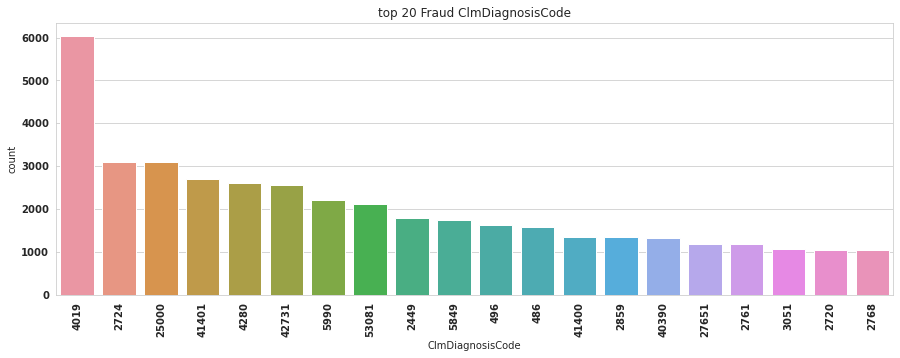

In [762]:
# top 20 ClmDiagnosisCode
plt.figure(figsize=(15,5))
plt.title("top 20 Fraud ClmDiagnosisCode")
sns.barplot(x="ClmDiagnosisCode",y="count",data=NonFraudClmDiagnosisCode.iloc[:20])
plt.xticks(rotation=90)
plt.show()

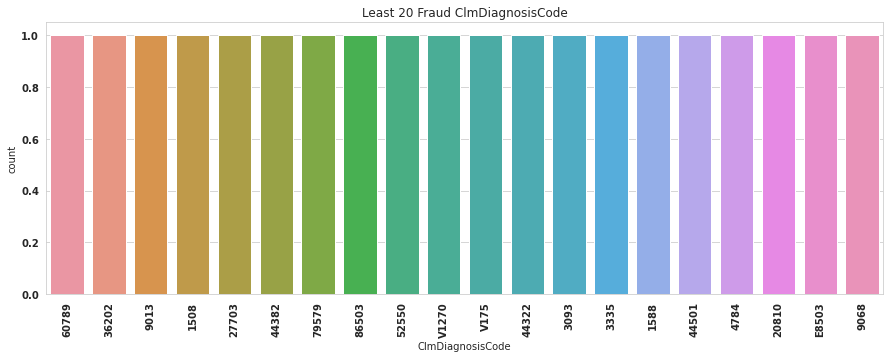

In [763]:
# Least 20 ClmAdmitDiagnosisCode
plt.figure(figsize=(15,5))
plt.title("Least 20 Fraud ClmDiagnosisCode")
sns.barplot(x="ClmDiagnosisCode",y="count",data=NonFraudClmDiagnosisCode.iloc[-20:])
plt.xticks(rotation=90)
plt.show()

#### 5.13.c Common Diagnosis code used in both activity (Fradulent and Non Fradulent) 

In [764]:
common=FraudClmDiagnosisCode.merge(NonFraudClmDiagnosisCode,on="ClmDiagnosisCode",how="inner")

In [765]:
print("No of provider who involved in both activity::",len(common))

No of provider who involved in both activity:: 3616


In [766]:
common.head()

,ClmDiagnosisCode,count_x,count_y
0,4019,22913,6037
1,25000,10839,3086
2,2724,10445,3095
3,V5869,8809,238
4,4011,8512,99


### 5.14 Inpatient data's ProcedureCode analysis

#### 5.14.a Procedure code for Fradulent Activity

In [774]:
frad_Procedure=inp_df[inp_df.PotentialFraud=="Yes"]

In [776]:
FradProcedure=pd.DataFrame(columns=["ClmProcedureCode"])
FradProcedure["ClmProcedureCode"]=pd.concat([frad_Procedure['ClmProcedureCode_1'],frad_Procedure[ 'ClmProcedureCode_2'],
                                      frad_Procedure['ClmProcedureCode_3'],frad_Procedure['ClmProcedureCode_4'], 
                                      frad_Procedure['ClmProcedureCode_5'], frad_Procedure['ClmProcedureCode_6']], axis=0, sort=True).dropna()

In [777]:
print("No of unique Fraud ClmProcedureCode:: ",len(FradProcedure.ClmProcedureCode.unique()))

No of unique Fraud ClmProcedureCode::  1121


In [778]:
FradProcedureCode=FradProcedure.ClmProcedureCode.value_counts(sort=True).to_frame().reset_index()
FradProcedureCode.columns=["ClmProcedureCode","count"]
FradProcedureCode.head()

,ClmProcedureCode,count
0,4019.0,1137
1,2724.0,641
2,9904.0,629
3,8154.0,614
4,66.0,535


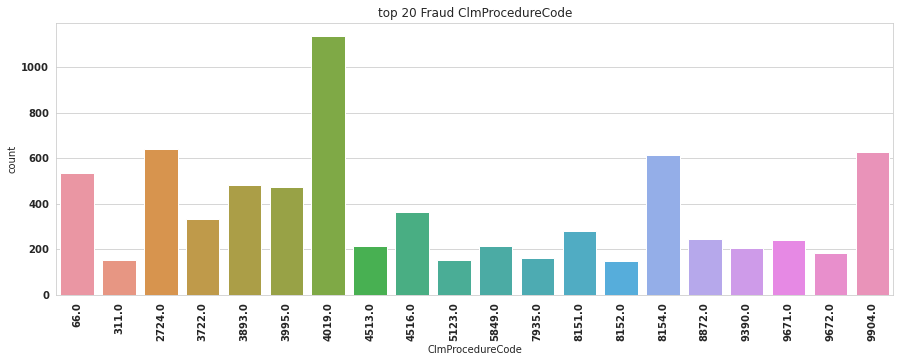

In [779]:
# top 20 ProcedureCode
plt.figure(figsize=(15,5))
plt.title("top 20 Fraud ClmProcedureCode")
sns.barplot(x="ClmProcedureCode",y="count",data=FradProcedureCode.iloc[:20])
plt.xticks(rotation=90)
plt.show()

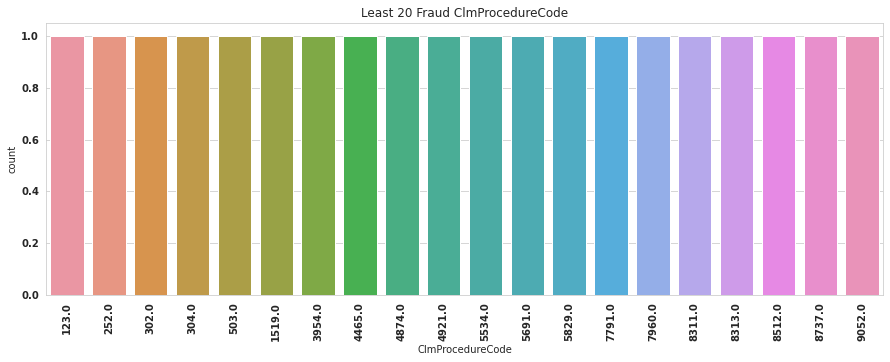

In [780]:
# Least 20 ClmAdmitDiagnosisCode
plt.figure(figsize=(15,5))
plt.title("Least 20 Fraud ClmProcedureCode")
sns.barplot(x="ClmProcedureCode",y="count",data=FradProcedureCode.iloc[-20:])
plt.xticks(rotation=90)
plt.show()

#### 5.14.b Procedure code for Non Fradulent Activity

In [783]:
Nonfrad_Procedure=inp_df[inp_df.PotentialFraud=="No"]

In [784]:
NonFradProcedure=pd.DataFrame(columns=["ClmProcedureCode"])
NonFradProcedure["ClmProcedureCode"]=pd.concat([Nonfrad_Procedure['ClmProcedureCode_1'],Nonfrad_Procedure[ 'ClmProcedureCode_2'],
                                      Nonfrad_Procedure['ClmProcedureCode_3'],Nonfrad_Procedure['ClmProcedureCode_4'], 
                                      Nonfrad_Procedure['ClmProcedureCode_5'], Nonfrad_Procedure['ClmProcedureCode_6']], axis=0, sort=True).dropna()

In [785]:
print("No of unique Non Fraud ClmProcedureCode:: ",len(NonFradProcedure.ClmProcedureCode.unique()))

No of unique Non Fraud ClmProcedureCode::  987


In [787]:
NonFradProcedureCode=NonFradProcedure.ClmProcedureCode.value_counts(sort=True).to_frame().reset_index()
NonFradProcedureCode.columns=["ClmProcedureCode","count"]
NonFradProcedureCode.head()

,ClmProcedureCode,count
0,4019.0,816
1,9904.0,508
2,8154.0,407
3,2724.0,406
4,3893.0,366


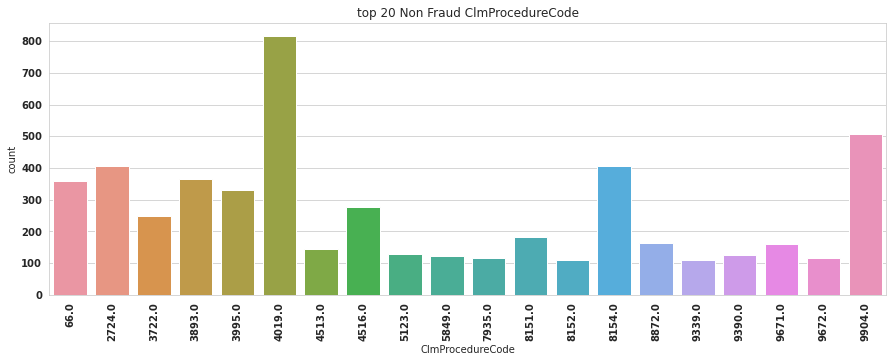

In [789]:
# top 20 ProcedureCode
plt.figure(figsize=(15,5))
plt.title("top 20 Non Fraud ClmProcedureCode")
sns.barplot(x="ClmProcedureCode",y="count",data=NonFradProcedureCode.iloc[:20])
plt.xticks(rotation=90)
plt.show()

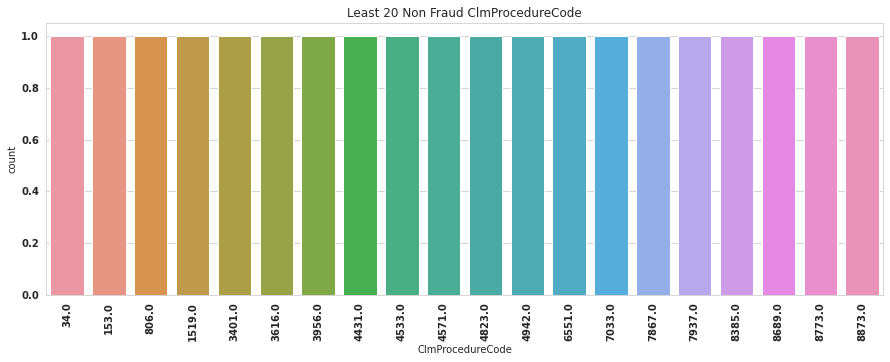

In [790]:
# Least 20 ClmAdmitDiagnosisCode
plt.figure(figsize=(15,5))
plt.title("Least 20 Non Fraud ClmProcedureCode")
sns.barplot(x="ClmProcedureCode",y="count",data=NonFradProcedureCode.iloc[-20:])
plt.xticks(rotation=90)
plt.show()

#### 5.14.c Common Procedure code used in both activity (Fradulent and Non Fradulent) 

In [792]:
common=FradProcedureCode.merge(NonFradProcedureCode,on="ClmProcedureCode",how="inner")

In [793]:
print("No of provider who involved in both activity::",len(common))

No of provider who involved in both activity:: 787


In [794]:
common.head()

,ClmProcedureCode,count_x,count_y
0,4019.0,1137,816
1,2724.0,641,406
2,9904.0,629,508
3,8154.0,614,407
4,66.0,535,359


### 5.15 Outpatient data's ProcedureCode analysis

#### 5.15.a Procedure code for Fradulent Activity

In [795]:
frad_Procedure=out_df[out_df.PotentialFraud=="Yes"]

In [796]:
FradProcedure=pd.DataFrame(columns=["ClmProcedureCode"])
FradProcedure["ClmProcedureCode"]=pd.concat([frad_Procedure['ClmProcedureCode_1'],frad_Procedure[ 'ClmProcedureCode_2'],
                                      frad_Procedure['ClmProcedureCode_3'],frad_Procedure['ClmProcedureCode_4'], 
                                      frad_Procedure['ClmProcedureCode_5'], frad_Procedure['ClmProcedureCode_6']], axis=0, sort=True).dropna()

In [797]:
print("No of unique Fraud ClmProcedureCode:: ",len(FradProcedure.ClmProcedureCode.unique()))

No of unique Fraud ClmProcedureCode::  59


In [798]:
FradProcedureCode=FradProcedure.ClmProcedureCode.value_counts(sort=True).to_frame().reset_index()
FradProcedureCode.columns=["ClmProcedureCode","count"]
FradProcedureCode.head()

,ClmProcedureCode,count
0,9904.0,5
1,4516.0,5
2,66.0,4
3,9390.0,3
4,8703.0,3


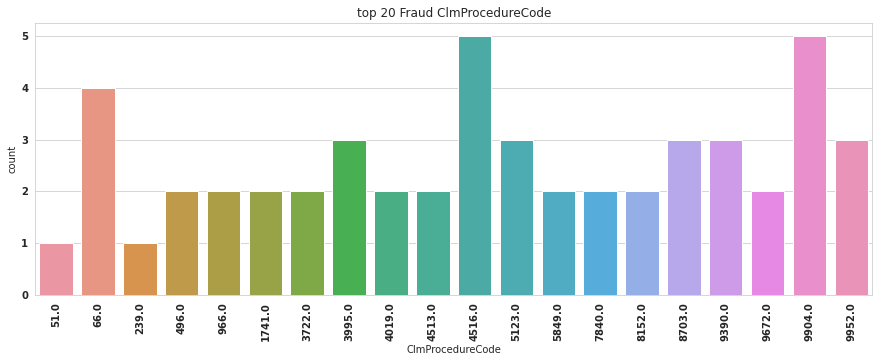

In [799]:
# top 20 ProcedureCode
plt.figure(figsize=(15,5))
plt.title("top 20 Fraud ClmProcedureCode")
sns.barplot(x="ClmProcedureCode",y="count",data=FradProcedureCode.iloc[:20])
plt.xticks(rotation=90)
plt.show()

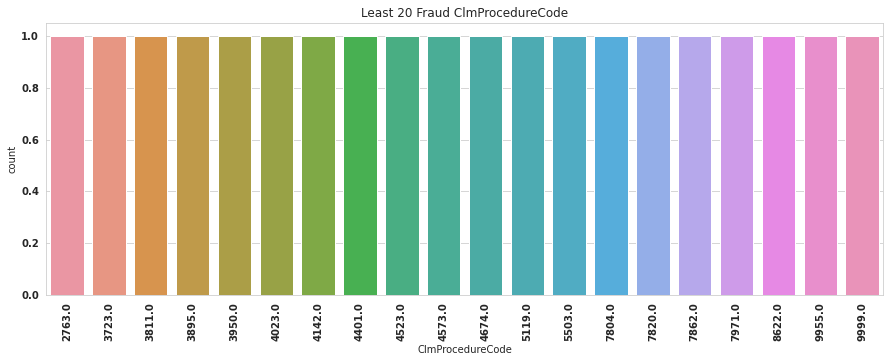

In [800]:
# Least 20 ClmAdmitDiagnosisCode
plt.figure(figsize=(15,5))
plt.title("Least 20 Fraud ClmProcedureCode")
sns.barplot(x="ClmProcedureCode",y="count",data=FradProcedureCode.iloc[-20:])
plt.xticks(rotation=90)
plt.show()

#### 5.15.b Procedure code for Non Fradulent Activity

In [801]:
Nonfrad_Procedure=out_df[out_df.PotentialFraud=="No"]

In [802]:
NonFradProcedure=pd.DataFrame(columns=["ClmProcedureCode"])
NonFradProcedure["ClmProcedureCode"]=pd.concat([Nonfrad_Procedure['ClmProcedureCode_1'],Nonfrad_Procedure[ 'ClmProcedureCode_2'],
                                      Nonfrad_Procedure['ClmProcedureCode_3'],Nonfrad_Procedure['ClmProcedureCode_4'], 
                                      Nonfrad_Procedure['ClmProcedureCode_5'], Nonfrad_Procedure['ClmProcedureCode_6']], axis=0, sort=True).dropna()

In [803]:
print("No of unique Non Fraud ClmProcedureCode:: ",len(NonFradProcedure.ClmProcedureCode.unique()))

No of unique Non Fraud ClmProcedureCode::  64


In [808]:
NonFradProcedureCode=NonFradProcedure.ClmProcedureCode.value_counts(sort=True).to_frame().reset_index()
NonFradProcedureCode.columns=["ClmProcedureCode","count"]
NonFradProcedureCode.head()

,ClmProcedureCode,count
0,9904.0,10
1,2724.0,7
2,3722.0,6
3,3893.0,5
4,4019.0,4


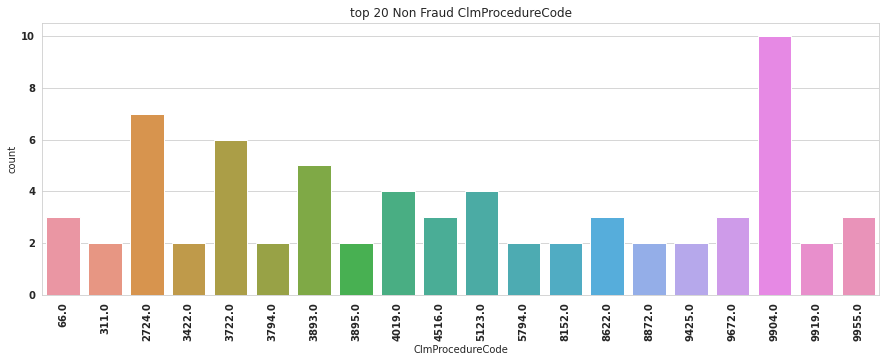

In [809]:
# top 20 ProcedureCode
plt.figure(figsize=(15,5))
plt.title("top 20 Non Fraud ClmProcedureCode")
sns.barplot(x="ClmProcedureCode",y="count",data=NonFradProcedureCode.iloc[:20])
plt.xticks(rotation=90)
plt.show()

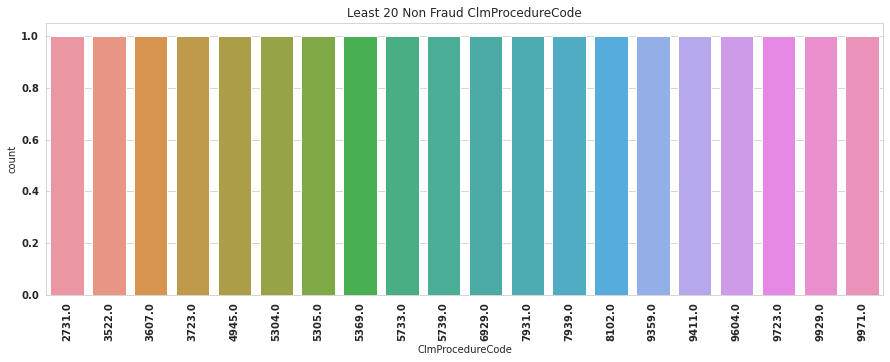

In [810]:
# Least 20 ClmAdmitDiagnosisCode
plt.figure(figsize=(15,5))
plt.title("Least 20 Non Fraud ClmProcedureCode")
sns.barplot(x="ClmProcedureCode",y="count",data=NonFradProcedureCode.iloc[-20:])
plt.xticks(rotation=90)
plt.show()

#### 5.15.c Common Procedure code used in both activity (Fradulent and Non Fradulent) 

In [811]:
common=FradProcedureCode.merge(NonFradProcedureCode,on="ClmProcedureCode",how="inner")

In [812]:
print("No of provider who involved in both activity::",len(common))

No of provider who involved in both activity:: 19


In [814]:
common.head()

,ClmProcedureCode,count_x,count_y
0,9904.0,5,10
1,4516.0,5,3
2,66.0,4,3
3,9952.0,3,2
4,5123.0,3,4
